##### Copyright 2020 The TensorFlow Authors.


In [1]:
#@title Licensed under the Apache License, Version 2.0
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Addons Layers: WeightNormalization

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/addons/tutorials/layers_weightnormalization"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/addons/blob/master/docs/tutorials/layers_weightnormalization.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/addons/blob/master/docs/tutorials/layers_weightnormalization.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/addons/docs/tutorials/layers_weightnormalization.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Overview

This notebook will demonstrate how to use the Weight Normalization layer and how it can improve convergence.


# WeightNormalization

A Simple Reparameterization to Accelerate Training of Deep Neural Networks:

Tim Salimans, Diederik P. Kingma (2016)

> By reparameterizing the weights in this way you improve the conditioning of the optimization problem and speed up convergence of stochastic gradient descent. Our reparameterization is inspired by batch normalization but does not introduce any dependencies between the examples in a minibatch. This means that our method can also be applied successfully to recurrent models such as LSTMs and to noise-sensitive applications such as deep reinforcement learning or generative models, for which batch normalization is less well suited. Although our method is much simpler, it still provides much of the speed-up of full batch normalization. In addition, the computational overhead of our method is lower, permitting more optimization steps to be taken in the same amount of time.

> https://arxiv.org/abs/1602.07868 

<img src="https://raw.githubusercontent.com/seanpmorgan/tf-weightnorm/master/static/wrapped-graph.png" width="80%"><br><br>


## Setup

In [2]:
!pip install -U tensorflow-addons

  Using cached tensorflow_addons-0.17.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)


  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)


In [3]:
import tensorflow as tf
import tensorflow_addons as tfa

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# Hyper Parameters
batch_size = 32
epochs = 10
num_classes=10

## Build Models

In [6]:
# Standard ConvNet
reg_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, 5, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, 5, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

In [7]:
# WeightNorm ConvNet
wn_model = tf.keras.Sequential([
    tfa.layers.WeightNormalization(tf.keras.layers.Conv2D(6, 5, activation='relu')),
    tf.keras.layers.MaxPooling2D(2, 2),
    tfa.layers.WeightNormalization(tf.keras.layers.Conv2D(16, 5, activation='relu')),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(120, activation='relu')),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(84, activation='relu')),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(num_classes, activation='softmax')),
])

## Load Data

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

     8192/170498071 [..............................] - ETA: 0s

   204800/170498071 [..............................] - ETA: 56s

  1425408/170498071 [..............................] - ETA: 13s

  4628480/170498071 [..............................] - ETA: 6s 

 10362880/170498071 [>.............................] - ETA: 3s

 16162816/170498071 [=>............................] - ETA: 2s

 21946368/170498071 [==>...........................] - ETA: 2s

 27697152/170498071 [===>..........................] - ETA: 1s

 33480704/170498071 [====>.........................] - ETA: 1s

 39272448/170498071 [=====>........................] - ETA: 1s

 45015040/170498071 [======>.......................] - ETA: 1s

 50798592/170498071 [=======>......................] - ETA: 1s

 56582144/170498071 [========>.....................] - ETA: 1s

 62349312/170498071 [=========>....................] - ETA: 1s

 68132864/170498071 [==========>...................] - ETA: 1s

 73916416/170498071 [============>.................] - ETA: 1s

 79699968/170498071 [=============>................] - ETA: 0s

 85499904/170498071 [==============>...............] - ETA: 0s

 91250688/170498071 [===============>..............] - ETA: 0s

 97026048/170498071 [================>.............] - ETA: 0s

102817792/170498071 [=================>............] - ETA: 0s

108568576/170498071 [==================>...........] - ETA: 0s

114384896/170498071 [===================>..........] - ETA: 0s

120119296/170498071 [====================>.........] - ETA: 0s

125861888/170498071 [=====================>........] - ETA: 0s

131620864/170498071 [======================>.......] - ETA: 0s

137412608/170498071 [=======================>......] - ETA: 0s

143138816/170498071 [========================>.....] - ETA: 0s

148897792/170498071 [=========================>....] - ETA: 0s

154656768/170498071 [==========================>...] - ETA: 0s

160423936/170498071 [===========================>..] - ETA: 0s

166158336/170498071 [============================>.] - ETA: 0s

170498071/170498071 [==============================] - 2s 0us/step


## Train Models

In [9]:
reg_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            shuffle=True)

Epoch 1/10


   1/1563 [..............................] - ETA: 39:11 - loss: 2.2751 - accuracy: 0.1562

  18/1563 [..............................] - ETA: 4s - loss: 2.2946 - accuracy: 0.0903   

  36/1563 [..............................] - ETA: 4s - loss: 2.2854 - accuracy: 0.1068

  54/1563 [>.............................] - ETA: 4s - loss: 2.2429 - accuracy: 0.1400

  72/1563 [>.............................] - ETA: 4s - loss: 2.2124 - accuracy: 0.1619

  91/1563 [>.............................] - ETA: 4s - loss: 2.1713 - accuracy: 0.1789

 108/1563 [=>............................] - ETA: 4s - loss: 2.1372 - accuracy: 0.1944

 126/1563 [=>............................] - ETA: 4s - loss: 2.1121 - accuracy: 0.2103

 144/1563 [=>............................] - ETA: 4s - loss: 2.0841 - accuracy: 0.2240

 162/1563 [==>...........................] - ETA: 3s - loss: 2.0484 - accuracy: 0.2371

 180/1563 [==>...........................] - ETA: 3s - loss: 2.0336 - accuracy: 0.2417

 198/1563 [==>...........................] - ETA: 3s - loss: 2.0152 - accuracy: 0.2500

 215/1563 [===>..........................] - ETA: 3s - loss: 1.9966 - accuracy: 0.2574

 232/1563 [===>..........................] - ETA: 3s - loss: 1.9800 - accuracy: 0.2641

 250/1563 [===>..........................] - ETA: 3s - loss: 1.9669 - accuracy: 0.2706

 268/1563 [====>.........................] - ETA: 3s - loss: 1.9506 - accuracy: 0.2775

 286/1563 [====>.........................] - ETA: 3s - loss: 1.9387 - accuracy: 0.2827

 304/1563 [====>.........................] - ETA: 3s - loss: 1.9288 - accuracy: 0.2866

 322/1563 [=====>........................] - ETA: 3s - loss: 1.9203 - accuracy: 0.2904

 340/1563 [=====>........................] - ETA: 3s - loss: 1.9092 - accuracy: 0.2946

 358/1563 [=====>........................] - ETA: 3s - loss: 1.9027 - accuracy: 0.2972

 376/1563 [======>.......................] - ETA: 3s - loss: 1.8931 - accuracy: 0.3006

 394/1563 [======>.......................] - ETA: 3s - loss: 1.8823 - accuracy: 0.3039

 412/1563 [======>.......................] - ETA: 3s - loss: 1.8773 - accuracy: 0.3062

 430/1563 [=======>......................] - ETA: 3s - loss: 1.8673 - accuracy: 0.3104

 448/1563 [=======>......................] - ETA: 3s - loss: 1.8558 - accuracy: 0.3150

 466/1563 [=======>......................] - ETA: 3s - loss: 1.8467 - accuracy: 0.3196

 484/1563 [========>.....................] - ETA: 3s - loss: 1.8355 - accuracy: 0.3239

 503/1563 [========>.....................] - ETA: 3s - loss: 1.8274 - accuracy: 0.3262

 522/1563 [=========>....................] - ETA: 2s - loss: 1.8212 - accuracy: 0.3295

 541/1563 [=========>....................] - ETA: 2s - loss: 1.8169 - accuracy: 0.3307

 560/1563 [=========>....................] - ETA: 2s - loss: 1.8103 - accuracy: 0.3334

 579/1563 [==========>...................] - ETA: 2s - loss: 1.8035 - accuracy: 0.3359

 597/1563 [==========>...................] - ETA: 2s - loss: 1.7941 - accuracy: 0.3397

 615/1563 [==========>...................] - ETA: 2s - loss: 1.7860 - accuracy: 0.3427

 632/1563 [===========>..................] - ETA: 2s - loss: 1.7801 - accuracy: 0.3457

 650/1563 [===========>..................] - ETA: 2s - loss: 1.7734 - accuracy: 0.3476

 668/1563 [===========>..................] - ETA: 2s - loss: 1.7674 - accuracy: 0.3503

 686/1563 [============>.................] - ETA: 2s - loss: 1.7632 - accuracy: 0.3519

 704/1563 [============>.................] - ETA: 2s - loss: 1.7594 - accuracy: 0.3532

 722/1563 [============>.................] - ETA: 2s - loss: 1.7536 - accuracy: 0.3547

 740/1563 [=============>................] - ETA: 2s - loss: 1.7493 - accuracy: 0.3558

 758/1563 [=============>................] - ETA: 2s - loss: 1.7428 - accuracy: 0.3583

 776/1563 [=============>................] - ETA: 2s - loss: 1.7386 - accuracy: 0.3597

 794/1563 [==============>...............] - ETA: 2s - loss: 1.7347 - accuracy: 0.3616

 812/1563 [==============>...............] - ETA: 2s - loss: 1.7295 - accuracy: 0.3637

 830/1563 [==============>...............] - ETA: 2s - loss: 1.7237 - accuracy: 0.3661

 848/1563 [===============>..............] - ETA: 2s - loss: 1.7195 - accuracy: 0.3676

 866/1563 [===============>..............] - ETA: 1s - loss: 1.7163 - accuracy: 0.3693

 884/1563 [===============>..............] - ETA: 1s - loss: 1.7115 - accuracy: 0.3713

 902/1563 [================>.............] - ETA: 1s - loss: 1.7081 - accuracy: 0.3730

 920/1563 [================>.............] - ETA: 1s - loss: 1.7035 - accuracy: 0.3747

 938/1563 [=================>............] - ETA: 1s - loss: 1.6994 - accuracy: 0.3763

 956/1563 [=================>............] - ETA: 1s - loss: 1.6959 - accuracy: 0.3783

 974/1563 [=================>............] - ETA: 1s - loss: 1.6925 - accuracy: 0.3797

 992/1563 [==================>...........] - ETA: 1s - loss: 1.6891 - accuracy: 0.3809

1010/1563 [==================>...........] - ETA: 1s - loss: 1.6873 - accuracy: 0.3817

1027/1563 [==================>...........] - ETA: 1s - loss: 1.6847 - accuracy: 0.3825

1045/1563 [===================>..........] - ETA: 1s - loss: 1.6818 - accuracy: 0.3841

1063/1563 [===================>..........] - ETA: 1s - loss: 1.6795 - accuracy: 0.3851

1081/1563 [===================>..........] - ETA: 1s - loss: 1.6764 - accuracy: 0.3863

1099/1563 [====================>.........] - ETA: 1s - loss: 1.6733 - accuracy: 0.3877

1117/1563 [====================>.........] - ETA: 1s - loss: 1.6708 - accuracy: 0.3889

1134/1563 [====================>.........] - ETA: 1s - loss: 1.6690 - accuracy: 0.3893

1152/1563 [=====================>........] - ETA: 1s - loss: 1.6667 - accuracy: 0.3901

1169/1563 [=====================>........] - ETA: 1s - loss: 1.6632 - accuracy: 0.3915

1186/1563 [=====================>........] - ETA: 1s - loss: 1.6608 - accuracy: 0.3924

1204/1563 [======================>.......] - ETA: 1s - loss: 1.6577 - accuracy: 0.3939

1221/1563 [======================>.......] - ETA: 0s - loss: 1.6552 - accuracy: 0.3948

1238/1563 [======================>.......] - ETA: 0s - loss: 1.6527 - accuracy: 0.3961

1256/1563 [=======================>......] - ETA: 0s - loss: 1.6488 - accuracy: 0.3976

1274/1563 [=======================>......] - ETA: 0s - loss: 1.6458 - accuracy: 0.3987

1292/1563 [=======================>......] - ETA: 0s - loss: 1.6434 - accuracy: 0.3996

1310/1563 [========================>.....] - ETA: 0s - loss: 1.6417 - accuracy: 0.3998

1328/1563 [========================>.....] - ETA: 0s - loss: 1.6400 - accuracy: 0.4009

1346/1563 [========================>.....] - ETA: 0s - loss: 1.6371 - accuracy: 0.4023

1364/1563 [=========================>....] - ETA: 0s - loss: 1.6347 - accuracy: 0.4035

1382/1563 [=========================>....] - ETA: 0s - loss: 1.6329 - accuracy: 0.4042

1400/1563 [=========================>....] - ETA: 0s - loss: 1.6302 - accuracy: 0.4052

1418/1563 [==========================>...] - ETA: 0s - loss: 1.6279 - accuracy: 0.4061

1436/1563 [==========================>...] - ETA: 0s - loss: 1.6255 - accuracy: 0.4070

1454/1563 [==========================>...] - ETA: 0s - loss: 1.6231 - accuracy: 0.4077

1472/1563 [===========================>..] - ETA: 0s - loss: 1.6204 - accuracy: 0.4087

1490/1563 [===========================>..] - ETA: 0s - loss: 1.6180 - accuracy: 0.4097

1508/1563 [===========================>..] - ETA: 0s - loss: 1.6156 - accuracy: 0.4110

1526/1563 [============================>.] - ETA: 0s - loss: 1.6127 - accuracy: 0.4120

1543/1563 [============================>.] - ETA: 0s - loss: 1.6107 - accuracy: 0.4126

1561/1563 [============================>.] - ETA: 0s - loss: 1.6088 - accuracy: 0.4133

1563/1563 [==============================] - 7s 4ms/step - loss: 1.6086 - accuracy: 0.4134 - val_loss: 1.3833 - val_accuracy: 0.4965


Epoch 2/10


   1/1563 [..............................] - ETA: 5s - loss: 1.3856 - accuracy: 0.5312

  19/1563 [..............................] - ETA: 4s - loss: 1.3518 - accuracy: 0.5066

  38/1563 [..............................] - ETA: 4s - loss: 1.3895 - accuracy: 0.4942

  57/1563 [>.............................] - ETA: 4s - loss: 1.4015 - accuracy: 0.4885

  75/1563 [>.............................] - ETA: 4s - loss: 1.3882 - accuracy: 0.4913

  94/1563 [>.............................] - ETA: 4s - loss: 1.3834 - accuracy: 0.4973

 113/1563 [=>............................] - ETA: 4s - loss: 1.3875 - accuracy: 0.4967

 131/1563 [=>............................] - ETA: 3s - loss: 1.3958 - accuracy: 0.4955

 149/1563 [=>............................] - ETA: 3s - loss: 1.4005 - accuracy: 0.4939

 167/1563 [==>...........................] - ETA: 3s - loss: 1.4045 - accuracy: 0.4925

 185/1563 [==>...........................] - ETA: 3s - loss: 1.3961 - accuracy: 0.4998

 204/1563 [==>...........................] - ETA: 3s - loss: 1.3993 - accuracy: 0.4975

 222/1563 [===>..........................] - ETA: 3s - loss: 1.3905 - accuracy: 0.5014

 241/1563 [===>..........................] - ETA: 3s - loss: 1.3948 - accuracy: 0.4997

 260/1563 [===>..........................] - ETA: 3s - loss: 1.3856 - accuracy: 0.5037

 278/1563 [====>.........................] - ETA: 3s - loss: 1.3789 - accuracy: 0.5061

 296/1563 [====>.........................] - ETA: 3s - loss: 1.3781 - accuracy: 0.5053

 314/1563 [=====>........................] - ETA: 3s - loss: 1.3765 - accuracy: 0.5050

 333/1563 [=====>........................] - ETA: 3s - loss: 1.3753 - accuracy: 0.5061

 351/1563 [=====>........................] - ETA: 3s - loss: 1.3736 - accuracy: 0.5066

 369/1563 [======>.......................] - ETA: 3s - loss: 1.3696 - accuracy: 0.5085

 387/1563 [======>.......................] - ETA: 3s - loss: 1.3651 - accuracy: 0.5100

 405/1563 [======>.......................] - ETA: 3s - loss: 1.3619 - accuracy: 0.5113

 423/1563 [=======>......................] - ETA: 3s - loss: 1.3591 - accuracy: 0.5129

 442/1563 [=======>......................] - ETA: 3s - loss: 1.3597 - accuracy: 0.5130

 460/1563 [=======>......................] - ETA: 3s - loss: 1.3573 - accuracy: 0.5134

 479/1563 [========>.....................] - ETA: 3s - loss: 1.3553 - accuracy: 0.5141

 498/1563 [========>.....................] - ETA: 2s - loss: 1.3540 - accuracy: 0.5142

 516/1563 [========>.....................] - ETA: 2s - loss: 1.3511 - accuracy: 0.5152

 534/1563 [=========>....................] - ETA: 2s - loss: 1.3504 - accuracy: 0.5148

 552/1563 [=========>....................] - ETA: 2s - loss: 1.3508 - accuracy: 0.5137

 570/1563 [=========>....................] - ETA: 2s - loss: 1.3519 - accuracy: 0.5139

 589/1563 [==========>...................] - ETA: 2s - loss: 1.3519 - accuracy: 0.5136

 607/1563 [==========>...................] - ETA: 2s - loss: 1.3521 - accuracy: 0.5137

 625/1563 [==========>...................] - ETA: 2s - loss: 1.3522 - accuracy: 0.5135

 644/1563 [===========>..................] - ETA: 2s - loss: 1.3505 - accuracy: 0.5144

 663/1563 [===========>..................] - ETA: 2s - loss: 1.3501 - accuracy: 0.5144

 682/1563 [============>.................] - ETA: 2s - loss: 1.3464 - accuracy: 0.5155

 700/1563 [============>.................] - ETA: 2s - loss: 1.3449 - accuracy: 0.5160

 718/1563 [============>.................] - ETA: 2s - loss: 1.3435 - accuracy: 0.5166

 736/1563 [=============>................] - ETA: 2s - loss: 1.3421 - accuracy: 0.5171

 754/1563 [=============>................] - ETA: 2s - loss: 1.3418 - accuracy: 0.5175

 772/1563 [=============>................] - ETA: 2s - loss: 1.3420 - accuracy: 0.5177

 790/1563 [==============>...............] - ETA: 2s - loss: 1.3419 - accuracy: 0.5182

 808/1563 [==============>...............] - ETA: 2s - loss: 1.3421 - accuracy: 0.5181

 826/1563 [==============>...............] - ETA: 2s - loss: 1.3405 - accuracy: 0.5184

 844/1563 [===============>..............] - ETA: 2s - loss: 1.3392 - accuracy: 0.5190

 862/1563 [===============>..............] - ETA: 1s - loss: 1.3397 - accuracy: 0.5190

 880/1563 [===============>..............] - ETA: 1s - loss: 1.3373 - accuracy: 0.5195

 898/1563 [================>.............] - ETA: 1s - loss: 1.3374 - accuracy: 0.5189

 917/1563 [================>.............] - ETA: 1s - loss: 1.3366 - accuracy: 0.5194

 935/1563 [================>.............] - ETA: 1s - loss: 1.3364 - accuracy: 0.5198

 954/1563 [=================>............] - ETA: 1s - loss: 1.3383 - accuracy: 0.5191

 972/1563 [=================>............] - ETA: 1s - loss: 1.3386 - accuracy: 0.5194

 991/1563 [==================>...........] - ETA: 1s - loss: 1.3376 - accuracy: 0.5199

1010/1563 [==================>...........] - ETA: 1s - loss: 1.3365 - accuracy: 0.5208

1028/1563 [==================>...........] - ETA: 1s - loss: 1.3357 - accuracy: 0.5216

1046/1563 [===================>..........] - ETA: 1s - loss: 1.3356 - accuracy: 0.5212

1065/1563 [===================>..........] - ETA: 1s - loss: 1.3355 - accuracy: 0.5210

1084/1563 [===================>..........] - ETA: 1s - loss: 1.3342 - accuracy: 0.5214

1103/1563 [====================>.........] - ETA: 1s - loss: 1.3334 - accuracy: 0.5216

1122/1563 [====================>.........] - ETA: 1s - loss: 1.3330 - accuracy: 0.5220

1141/1563 [====================>.........] - ETA: 1s - loss: 1.3312 - accuracy: 0.5228

1160/1563 [=====================>........] - ETA: 1s - loss: 1.3304 - accuracy: 0.5231

1179/1563 [=====================>........] - ETA: 1s - loss: 1.3310 - accuracy: 0.5234

1198/1563 [=====================>........] - ETA: 1s - loss: 1.3299 - accuracy: 0.5238

1216/1563 [======================>.......] - ETA: 0s - loss: 1.3289 - accuracy: 0.5242

1235/1563 [======================>.......] - ETA: 0s - loss: 1.3284 - accuracy: 0.5242

1253/1563 [=======================>......] - ETA: 0s - loss: 1.3268 - accuracy: 0.5247

1272/1563 [=======================>......] - ETA: 0s - loss: 1.3260 - accuracy: 0.5252

1291/1563 [=======================>......] - ETA: 0s - loss: 1.3261 - accuracy: 0.5250

1310/1563 [========================>.....] - ETA: 0s - loss: 1.3263 - accuracy: 0.5250

1328/1563 [========================>.....] - ETA: 0s - loss: 1.3262 - accuracy: 0.5249

1346/1563 [========================>.....] - ETA: 0s - loss: 1.3251 - accuracy: 0.5254

1364/1563 [=========================>....] - ETA: 0s - loss: 1.3232 - accuracy: 0.5265

1383/1563 [=========================>....] - ETA: 0s - loss: 1.3232 - accuracy: 0.5266

1402/1563 [=========================>....] - ETA: 0s - loss: 1.3228 - accuracy: 0.5269

1421/1563 [==========================>...] - ETA: 0s - loss: 1.3219 - accuracy: 0.5274

1440/1563 [==========================>...] - ETA: 0s - loss: 1.3217 - accuracy: 0.5275

1459/1563 [===========================>..] - ETA: 0s - loss: 1.3213 - accuracy: 0.5277

1478/1563 [===========================>..] - ETA: 0s - loss: 1.3205 - accuracy: 0.5280

1497/1563 [===========================>..] - ETA: 0s - loss: 1.3183 - accuracy: 0.5287

1515/1563 [============================>.] - ETA: 0s - loss: 1.3177 - accuracy: 0.5291

1534/1563 [============================>.] - ETA: 0s - loss: 1.3172 - accuracy: 0.5295

1553/1563 [============================>.] - ETA: 0s - loss: 1.3172 - accuracy: 0.5296

1563/1563 [==============================] - 5s 3ms/step - loss: 1.3170 - accuracy: 0.5296 - val_loss: 1.2546 - val_accuracy: 0.5553


Epoch 3/10


   1/1563 [..............................] - ETA: 5s - loss: 1.0631 - accuracy: 0.5312

  19/1563 [..............................] - ETA: 4s - loss: 1.2141 - accuracy: 0.5707

  37/1563 [..............................] - ETA: 4s - loss: 1.1737 - accuracy: 0.5845

  56/1563 [>.............................] - ETA: 4s - loss: 1.1887 - accuracy: 0.5759

  74/1563 [>.............................] - ETA: 4s - loss: 1.2231 - accuracy: 0.5595

  93/1563 [>.............................] - ETA: 4s - loss: 1.2257 - accuracy: 0.5601

 111/1563 [=>............................] - ETA: 4s - loss: 1.2172 - accuracy: 0.5664

 129/1563 [=>............................] - ETA: 4s - loss: 1.2130 - accuracy: 0.5640

 148/1563 [=>............................] - ETA: 3s - loss: 1.2066 - accuracy: 0.5678

 167/1563 [==>...........................] - ETA: 3s - loss: 1.2073 - accuracy: 0.5664

 185/1563 [==>...........................] - ETA: 3s - loss: 1.2174 - accuracy: 0.5615

 204/1563 [==>...........................] - ETA: 3s - loss: 1.2123 - accuracy: 0.5639

 223/1563 [===>..........................] - ETA: 3s - loss: 1.2157 - accuracy: 0.5636

 242/1563 [===>..........................] - ETA: 3s - loss: 1.2179 - accuracy: 0.5633

 261/1563 [====>.........................] - ETA: 3s - loss: 1.2233 - accuracy: 0.5608

 280/1563 [====>.........................] - ETA: 3s - loss: 1.2236 - accuracy: 0.5621

 298/1563 [====>.........................] - ETA: 3s - loss: 1.2265 - accuracy: 0.5623

 316/1563 [=====>........................] - ETA: 3s - loss: 1.2231 - accuracy: 0.5630

 334/1563 [=====>........................] - ETA: 3s - loss: 1.2224 - accuracy: 0.5643

 353/1563 [=====>........................] - ETA: 3s - loss: 1.2186 - accuracy: 0.5654

 372/1563 [======>.......................] - ETA: 3s - loss: 1.2177 - accuracy: 0.5665

 391/1563 [======>.......................] - ETA: 3s - loss: 1.2189 - accuracy: 0.5675

 410/1563 [======>.......................] - ETA: 3s - loss: 1.2190 - accuracy: 0.5665

 428/1563 [=======>......................] - ETA: 3s - loss: 1.2176 - accuracy: 0.5666

 446/1563 [=======>......................] - ETA: 3s - loss: 1.2182 - accuracy: 0.5671

 464/1563 [=======>......................] - ETA: 3s - loss: 1.2205 - accuracy: 0.5665

 483/1563 [========>.....................] - ETA: 2s - loss: 1.2182 - accuracy: 0.5672

 501/1563 [========>.....................] - ETA: 2s - loss: 1.2161 - accuracy: 0.5679

 519/1563 [========>.....................] - ETA: 2s - loss: 1.2173 - accuracy: 0.5675

 537/1563 [=========>....................] - ETA: 2s - loss: 1.2175 - accuracy: 0.5681

 556/1563 [=========>....................] - ETA: 2s - loss: 1.2158 - accuracy: 0.5683

 574/1563 [==========>...................] - ETA: 2s - loss: 1.2155 - accuracy: 0.5691

 592/1563 [==========>...................] - ETA: 2s - loss: 1.2156 - accuracy: 0.5694

 610/1563 [==========>...................] - ETA: 2s - loss: 1.2123 - accuracy: 0.5710

 628/1563 [===========>..................] - ETA: 2s - loss: 1.2137 - accuracy: 0.5696

 647/1563 [===========>..................] - ETA: 2s - loss: 1.2134 - accuracy: 0.5695

 665/1563 [===========>..................] - ETA: 2s - loss: 1.2114 - accuracy: 0.5705

 683/1563 [============>.................] - ETA: 2s - loss: 1.2102 - accuracy: 0.5711

 702/1563 [============>.................] - ETA: 2s - loss: 1.2105 - accuracy: 0.5711

 721/1563 [============>.................] - ETA: 2s - loss: 1.2105 - accuracy: 0.5716

 740/1563 [=============>................] - ETA: 2s - loss: 1.2078 - accuracy: 0.5727

 759/1563 [=============>................] - ETA: 2s - loss: 1.2065 - accuracy: 0.5730

 777/1563 [=============>................] - ETA: 2s - loss: 1.2064 - accuracy: 0.5730

 795/1563 [==============>...............] - ETA: 2s - loss: 1.2062 - accuracy: 0.5733

 813/1563 [==============>...............] - ETA: 2s - loss: 1.2061 - accuracy: 0.5730

 831/1563 [==============>...............] - ETA: 2s - loss: 1.2082 - accuracy: 0.5723

 850/1563 [===============>..............] - ETA: 1s - loss: 1.2084 - accuracy: 0.5724

 869/1563 [===============>..............] - ETA: 1s - loss: 1.2085 - accuracy: 0.5726

 888/1563 [================>.............] - ETA: 1s - loss: 1.2092 - accuracy: 0.5721

 907/1563 [================>.............] - ETA: 1s - loss: 1.2090 - accuracy: 0.5720

 925/1563 [================>.............] - ETA: 1s - loss: 1.2096 - accuracy: 0.5716

 944/1563 [=================>............] - ETA: 1s - loss: 1.2090 - accuracy: 0.5720

 962/1563 [=================>............] - ETA: 1s - loss: 1.2083 - accuracy: 0.5722

 981/1563 [=================>............] - ETA: 1s - loss: 1.2074 - accuracy: 0.5730

1000/1563 [==================>...........] - ETA: 1s - loss: 1.2078 - accuracy: 0.5727

1019/1563 [==================>...........] - ETA: 1s - loss: 1.2066 - accuracy: 0.5727

1038/1563 [==================>...........] - ETA: 1s - loss: 1.2052 - accuracy: 0.5730

1057/1563 [===================>..........] - ETA: 1s - loss: 1.2048 - accuracy: 0.5736

1076/1563 [===================>..........] - ETA: 1s - loss: 1.2036 - accuracy: 0.5743

1095/1563 [====================>.........] - ETA: 1s - loss: 1.2029 - accuracy: 0.5747

1114/1563 [====================>.........] - ETA: 1s - loss: 1.2013 - accuracy: 0.5753

1133/1563 [====================>.........] - ETA: 1s - loss: 1.2010 - accuracy: 0.5751

1152/1563 [=====================>........] - ETA: 1s - loss: 1.1993 - accuracy: 0.5758

1171/1563 [=====================>........] - ETA: 1s - loss: 1.2006 - accuracy: 0.5751

1189/1563 [=====================>........] - ETA: 1s - loss: 1.2000 - accuracy: 0.5752

1208/1563 [======================>.......] - ETA: 0s - loss: 1.2000 - accuracy: 0.5754

1227/1563 [======================>.......] - ETA: 0s - loss: 1.1990 - accuracy: 0.5762

1246/1563 [======================>.......] - ETA: 0s - loss: 1.1998 - accuracy: 0.5759

1265/1563 [=======================>......] - ETA: 0s - loss: 1.2001 - accuracy: 0.5757

1283/1563 [=======================>......] - ETA: 0s - loss: 1.1998 - accuracy: 0.5757

1301/1563 [=======================>......] - ETA: 0s - loss: 1.1996 - accuracy: 0.5757

1320/1563 [========================>.....] - ETA: 0s - loss: 1.1991 - accuracy: 0.5761

1339/1563 [========================>.....] - ETA: 0s - loss: 1.1977 - accuracy: 0.5765

1358/1563 [=========================>....] - ETA: 0s - loss: 1.1965 - accuracy: 0.5769

1377/1563 [=========================>....] - ETA: 0s - loss: 1.1962 - accuracy: 0.5770

1396/1563 [=========================>....] - ETA: 0s - loss: 1.1960 - accuracy: 0.5770

1415/1563 [==========================>...] - ETA: 0s - loss: 1.1956 - accuracy: 0.5773

1433/1563 [==========================>...] - ETA: 0s - loss: 1.1956 - accuracy: 0.5770

1451/1563 [==========================>...] - ETA: 0s - loss: 1.1958 - accuracy: 0.5771

1469/1563 [===========================>..] - ETA: 0s - loss: 1.1957 - accuracy: 0.5772

1488/1563 [===========================>..] - ETA: 0s - loss: 1.1948 - accuracy: 0.5774

1507/1563 [===========================>..] - ETA: 0s - loss: 1.1951 - accuracy: 0.5773

1525/1563 [============================>.] - ETA: 0s - loss: 1.1943 - accuracy: 0.5772

1543/1563 [============================>.] - ETA: 0s - loss: 1.1949 - accuracy: 0.5771

1561/1563 [============================>.] - ETA: 0s - loss: 1.1945 - accuracy: 0.5775

1563/1563 [==============================] - 5s 3ms/step - loss: 1.1944 - accuracy: 0.5776 - val_loss: 1.1566 - val_accuracy: 0.5922


Epoch 4/10


   1/1563 [..............................] - ETA: 5s - loss: 1.2532 - accuracy: 0.5625

  19/1563 [..............................] - ETA: 4s - loss: 1.1317 - accuracy: 0.6003

  37/1563 [..............................] - ETA: 4s - loss: 1.1074 - accuracy: 0.5997

  55/1563 [>.............................] - ETA: 4s - loss: 1.1172 - accuracy: 0.5915

  73/1563 [>.............................] - ETA: 4s - loss: 1.1259 - accuracy: 0.5912

  91/1563 [>.............................] - ETA: 4s - loss: 1.1374 - accuracy: 0.5852

 109/1563 [=>............................] - ETA: 4s - loss: 1.1181 - accuracy: 0.5909

 127/1563 [=>............................] - ETA: 4s - loss: 1.1345 - accuracy: 0.5864

 145/1563 [=>............................] - ETA: 4s - loss: 1.1311 - accuracy: 0.5901

 163/1563 [==>...........................] - ETA: 3s - loss: 1.1160 - accuracy: 0.5953

 181/1563 [==>...........................] - ETA: 3s - loss: 1.1132 - accuracy: 0.5972

 199/1563 [==>...........................] - ETA: 3s - loss: 1.1150 - accuracy: 0.5981

 217/1563 [===>..........................] - ETA: 3s - loss: 1.1181 - accuracy: 0.5972

 236/1563 [===>..........................] - ETA: 3s - loss: 1.1191 - accuracy: 0.5975

 254/1563 [===>..........................] - ETA: 3s - loss: 1.1208 - accuracy: 0.5955

 272/1563 [====>.........................] - ETA: 3s - loss: 1.1181 - accuracy: 0.5973

 290/1563 [====>.........................] - ETA: 3s - loss: 1.1187 - accuracy: 0.5981

 308/1563 [====>.........................] - ETA: 3s - loss: 1.1184 - accuracy: 0.5980

 327/1563 [=====>........................] - ETA: 3s - loss: 1.1177 - accuracy: 0.5989

 345/1563 [=====>........................] - ETA: 3s - loss: 1.1233 - accuracy: 0.5962

 363/1563 [=====>........................] - ETA: 3s - loss: 1.1241 - accuracy: 0.5956

 382/1563 [======>.......................] - ETA: 3s - loss: 1.1212 - accuracy: 0.5971

 400/1563 [======>.......................] - ETA: 3s - loss: 1.1219 - accuracy: 0.5973

 419/1563 [=======>......................] - ETA: 3s - loss: 1.1243 - accuracy: 0.5973

 437/1563 [=======>......................] - ETA: 3s - loss: 1.1247 - accuracy: 0.5967

 455/1563 [=======>......................] - ETA: 3s - loss: 1.1239 - accuracy: 0.5970

 473/1563 [========>.....................] - ETA: 3s - loss: 1.1277 - accuracy: 0.5958

 492/1563 [========>.....................] - ETA: 3s - loss: 1.1238 - accuracy: 0.5981

 510/1563 [========>.....................] - ETA: 2s - loss: 1.1216 - accuracy: 0.5993

 529/1563 [=========>....................] - ETA: 2s - loss: 1.1198 - accuracy: 0.6003

 548/1563 [=========>....................] - ETA: 2s - loss: 1.1189 - accuracy: 0.6011

 567/1563 [=========>....................] - ETA: 2s - loss: 1.1208 - accuracy: 0.6005

 586/1563 [==========>...................] - ETA: 2s - loss: 1.1191 - accuracy: 0.6007

 605/1563 [==========>...................] - ETA: 2s - loss: 1.1177 - accuracy: 0.6016

 624/1563 [==========>...................] - ETA: 2s - loss: 1.1175 - accuracy: 0.6028

 642/1563 [===========>..................] - ETA: 2s - loss: 1.1165 - accuracy: 0.6028

 661/1563 [===========>..................] - ETA: 2s - loss: 1.1169 - accuracy: 0.6024

 680/1563 [============>.................] - ETA: 2s - loss: 1.1160 - accuracy: 0.6034

 699/1563 [============>.................] - ETA: 2s - loss: 1.1142 - accuracy: 0.6043

 718/1563 [============>.................] - ETA: 2s - loss: 1.1143 - accuracy: 0.6038

 737/1563 [=============>................] - ETA: 2s - loss: 1.1154 - accuracy: 0.6036

 756/1563 [=============>................] - ETA: 2s - loss: 1.1141 - accuracy: 0.6039

 775/1563 [=============>................] - ETA: 2s - loss: 1.1141 - accuracy: 0.6041

 794/1563 [==============>...............] - ETA: 2s - loss: 1.1157 - accuracy: 0.6039

 813/1563 [==============>...............] - ETA: 2s - loss: 1.1151 - accuracy: 0.6041

 833/1563 [==============>...............] - ETA: 2s - loss: 1.1145 - accuracy: 0.6044

 852/1563 [===============>..............] - ETA: 1s - loss: 1.1148 - accuracy: 0.6048

 871/1563 [===============>..............] - ETA: 1s - loss: 1.1153 - accuracy: 0.6045

 890/1563 [================>.............] - ETA: 1s - loss: 1.1158 - accuracy: 0.6041

 909/1563 [================>.............] - ETA: 1s - loss: 1.1161 - accuracy: 0.6040

 928/1563 [================>.............] - ETA: 1s - loss: 1.1182 - accuracy: 0.6034

 947/1563 [=================>............] - ETA: 1s - loss: 1.1158 - accuracy: 0.6043

 966/1563 [=================>............] - ETA: 1s - loss: 1.1160 - accuracy: 0.6042

 985/1563 [=================>............] - ETA: 1s - loss: 1.1147 - accuracy: 0.6049

1004/1563 [==================>...........] - ETA: 1s - loss: 1.1157 - accuracy: 0.6045

1023/1563 [==================>...........] - ETA: 1s - loss: 1.1166 - accuracy: 0.6043

1042/1563 [===================>..........] - ETA: 1s - loss: 1.1170 - accuracy: 0.6040

1061/1563 [===================>..........] - ETA: 1s - loss: 1.1172 - accuracy: 0.6037

1080/1563 [===================>..........] - ETA: 1s - loss: 1.1164 - accuracy: 0.6039

1099/1563 [====================>.........] - ETA: 1s - loss: 1.1145 - accuracy: 0.6045

1118/1563 [====================>.........] - ETA: 1s - loss: 1.1145 - accuracy: 0.6044

1137/1563 [====================>.........] - ETA: 1s - loss: 1.1116 - accuracy: 0.6052

1156/1563 [=====================>........] - ETA: 1s - loss: 1.1109 - accuracy: 0.6055

1175/1563 [=====================>........] - ETA: 1s - loss: 1.1110 - accuracy: 0.6055

1194/1563 [=====================>........] - ETA: 1s - loss: 1.1119 - accuracy: 0.6053

1213/1563 [======================>.......] - ETA: 0s - loss: 1.1123 - accuracy: 0.6055

1232/1563 [======================>.......] - ETA: 0s - loss: 1.1137 - accuracy: 0.6049

1251/1563 [=======================>......] - ETA: 0s - loss: 1.1134 - accuracy: 0.6050

1270/1563 [=======================>......] - ETA: 0s - loss: 1.1133 - accuracy: 0.6053

1289/1563 [=======================>......] - ETA: 0s - loss: 1.1146 - accuracy: 0.6048

1308/1563 [========================>.....] - ETA: 0s - loss: 1.1159 - accuracy: 0.6043

1327/1563 [========================>.....] - ETA: 0s - loss: 1.1175 - accuracy: 0.6035

1346/1563 [========================>.....] - ETA: 0s - loss: 1.1175 - accuracy: 0.6036

1365/1563 [=========================>....] - ETA: 0s - loss: 1.1171 - accuracy: 0.6039

1384/1563 [=========================>....] - ETA: 0s - loss: 1.1170 - accuracy: 0.6038

1403/1563 [=========================>....] - ETA: 0s - loss: 1.1176 - accuracy: 0.6038

1422/1563 [==========================>...] - ETA: 0s - loss: 1.1182 - accuracy: 0.6038

1441/1563 [==========================>...] - ETA: 0s - loss: 1.1177 - accuracy: 0.6037

1460/1563 [===========================>..] - ETA: 0s - loss: 1.1182 - accuracy: 0.6034

1479/1563 [===========================>..] - ETA: 0s - loss: 1.1187 - accuracy: 0.6035

1498/1563 [===========================>..] - ETA: 0s - loss: 1.1177 - accuracy: 0.6040

1517/1563 [============================>.] - ETA: 0s - loss: 1.1184 - accuracy: 0.6038

1536/1563 [============================>.] - ETA: 0s - loss: 1.1184 - accuracy: 0.6036

1555/1563 [============================>.] - ETA: 0s - loss: 1.1190 - accuracy: 0.6036

1563/1563 [==============================] - 5s 3ms/step - loss: 1.1192 - accuracy: 0.6033 - val_loss: 1.1554 - val_accuracy: 0.5877


Epoch 5/10


   1/1563 [..............................] - ETA: 5s - loss: 1.1409 - accuracy: 0.5625

  19/1563 [..............................] - ETA: 4s - loss: 1.0002 - accuracy: 0.6530

  37/1563 [..............................] - ETA: 4s - loss: 1.0832 - accuracy: 0.6242

  55/1563 [>.............................] - ETA: 4s - loss: 1.0740 - accuracy: 0.6313

  73/1563 [>.............................] - ETA: 4s - loss: 1.0888 - accuracy: 0.6267

  91/1563 [>.............................] - ETA: 4s - loss: 1.0799 - accuracy: 0.6288

 109/1563 [=>............................] - ETA: 4s - loss: 1.0700 - accuracy: 0.6313

 127/1563 [=>............................] - ETA: 4s - loss: 1.0626 - accuracy: 0.6309

 145/1563 [=>............................] - ETA: 4s - loss: 1.0605 - accuracy: 0.6306

 163/1563 [==>...........................] - ETA: 3s - loss: 1.0472 - accuracy: 0.6329

 181/1563 [==>...........................] - ETA: 3s - loss: 1.0467 - accuracy: 0.6304

 199/1563 [==>...........................] - ETA: 3s - loss: 1.0451 - accuracy: 0.6316

 217/1563 [===>..........................] - ETA: 3s - loss: 1.0489 - accuracy: 0.6285

 235/1563 [===>..........................] - ETA: 3s - loss: 1.0491 - accuracy: 0.6295

 253/1563 [===>..........................] - ETA: 3s - loss: 1.0462 - accuracy: 0.6299

 271/1563 [====>.........................] - ETA: 3s - loss: 1.0473 - accuracy: 0.6285

 289/1563 [====>.........................] - ETA: 3s - loss: 1.0473 - accuracy: 0.6277

 308/1563 [====>.........................] - ETA: 3s - loss: 1.0459 - accuracy: 0.6277

 327/1563 [=====>........................] - ETA: 3s - loss: 1.0449 - accuracy: 0.6291

 346/1563 [=====>........................] - ETA: 3s - loss: 1.0486 - accuracy: 0.6272

 364/1563 [=====>........................] - ETA: 3s - loss: 1.0481 - accuracy: 0.6268

 382/1563 [======>.......................] - ETA: 3s - loss: 1.0526 - accuracy: 0.6247

 401/1563 [======>.......................] - ETA: 3s - loss: 1.0515 - accuracy: 0.6255

 419/1563 [=======>......................] - ETA: 3s - loss: 1.0523 - accuracy: 0.6247

 438/1563 [=======>......................] - ETA: 3s - loss: 1.0505 - accuracy: 0.6258

 456/1563 [=======>......................] - ETA: 3s - loss: 1.0492 - accuracy: 0.6264

 474/1563 [========>.....................] - ETA: 3s - loss: 1.0486 - accuracy: 0.6259

 492/1563 [========>.....................] - ETA: 3s - loss: 1.0517 - accuracy: 0.6247

 510/1563 [========>.....................] - ETA: 2s - loss: 1.0537 - accuracy: 0.6242

 528/1563 [=========>....................] - ETA: 2s - loss: 1.0529 - accuracy: 0.6250

 546/1563 [=========>....................] - ETA: 2s - loss: 1.0521 - accuracy: 0.6251

 564/1563 [=========>....................] - ETA: 2s - loss: 1.0540 - accuracy: 0.6250

 582/1563 [==========>...................] - ETA: 2s - loss: 1.0564 - accuracy: 0.6244

 600/1563 [==========>...................] - ETA: 2s - loss: 1.0574 - accuracy: 0.6245

 618/1563 [==========>...................] - ETA: 2s - loss: 1.0572 - accuracy: 0.6254

 636/1563 [===========>..................] - ETA: 2s - loss: 1.0569 - accuracy: 0.6250

 654/1563 [===========>..................] - ETA: 2s - loss: 1.0572 - accuracy: 0.6250

 672/1563 [===========>..................] - ETA: 2s - loss: 1.0571 - accuracy: 0.6252

 690/1563 [============>.................] - ETA: 2s - loss: 1.0571 - accuracy: 0.6250

 708/1563 [============>.................] - ETA: 2s - loss: 1.0576 - accuracy: 0.6248

 726/1563 [============>.................] - ETA: 2s - loss: 1.0573 - accuracy: 0.6251

 744/1563 [=============>................] - ETA: 2s - loss: 1.0570 - accuracy: 0.6250

 762/1563 [=============>................] - ETA: 2s - loss: 1.0577 - accuracy: 0.6246

 780/1563 [=============>................] - ETA: 2s - loss: 1.0590 - accuracy: 0.6242

 798/1563 [==============>...............] - ETA: 2s - loss: 1.0585 - accuracy: 0.6251

 816/1563 [==============>...............] - ETA: 2s - loss: 1.0590 - accuracy: 0.6249

 834/1563 [===============>..............] - ETA: 2s - loss: 1.0583 - accuracy: 0.6249

 853/1563 [===============>..............] - ETA: 2s - loss: 1.0577 - accuracy: 0.6251

 872/1563 [===============>..............] - ETA: 1s - loss: 1.0577 - accuracy: 0.6248

 891/1563 [================>.............] - ETA: 1s - loss: 1.0582 - accuracy: 0.6246

 910/1563 [================>.............] - ETA: 1s - loss: 1.0598 - accuracy: 0.6239

 929/1563 [================>.............] - ETA: 1s - loss: 1.0608 - accuracy: 0.6235

 947/1563 [=================>............] - ETA: 1s - loss: 1.0610 - accuracy: 0.6233

 966/1563 [=================>............] - ETA: 1s - loss: 1.0599 - accuracy: 0.6234

 984/1563 [=================>............] - ETA: 1s - loss: 1.0601 - accuracy: 0.6232

1003/1563 [==================>...........] - ETA: 1s - loss: 1.0592 - accuracy: 0.6236

1022/1563 [==================>...........] - ETA: 1s - loss: 1.0597 - accuracy: 0.6237

1041/1563 [==================>...........] - ETA: 1s - loss: 1.0605 - accuracy: 0.6237

1060/1563 [===================>..........] - ETA: 1s - loss: 1.0590 - accuracy: 0.6247

1079/1563 [===================>..........] - ETA: 1s - loss: 1.0576 - accuracy: 0.6248

1098/1563 [====================>.........] - ETA: 1s - loss: 1.0575 - accuracy: 0.6247

1117/1563 [====================>.........] - ETA: 1s - loss: 1.0563 - accuracy: 0.6248

1135/1563 [====================>.........] - ETA: 1s - loss: 1.0581 - accuracy: 0.6240

1154/1563 [=====================>........] - ETA: 1s - loss: 1.0579 - accuracy: 0.6242

1172/1563 [=====================>........] - ETA: 1s - loss: 1.0576 - accuracy: 0.6241

1190/1563 [=====================>........] - ETA: 1s - loss: 1.0575 - accuracy: 0.6244

1209/1563 [======================>.......] - ETA: 0s - loss: 1.0580 - accuracy: 0.6239

1228/1563 [======================>.......] - ETA: 0s - loss: 1.0570 - accuracy: 0.6242

1247/1563 [======================>.......] - ETA: 0s - loss: 1.0561 - accuracy: 0.6248

1266/1563 [=======================>......] - ETA: 0s - loss: 1.0557 - accuracy: 0.6251

1285/1563 [=======================>......] - ETA: 0s - loss: 1.0556 - accuracy: 0.6250

1304/1563 [========================>.....] - ETA: 0s - loss: 1.0557 - accuracy: 0.6250

1323/1563 [========================>.....] - ETA: 0s - loss: 1.0573 - accuracy: 0.6246

1342/1563 [========================>.....] - ETA: 0s - loss: 1.0566 - accuracy: 0.6246

1360/1563 [=========================>....] - ETA: 0s - loss: 1.0565 - accuracy: 0.6245

1379/1563 [=========================>....] - ETA: 0s - loss: 1.0557 - accuracy: 0.6247

1398/1563 [=========================>....] - ETA: 0s - loss: 1.0552 - accuracy: 0.6248

1417/1563 [==========================>...] - ETA: 0s - loss: 1.0557 - accuracy: 0.6248

1436/1563 [==========================>...] - ETA: 0s - loss: 1.0555 - accuracy: 0.6252

1455/1563 [==========================>...] - ETA: 0s - loss: 1.0563 - accuracy: 0.6246

1474/1563 [===========================>..] - ETA: 0s - loss: 1.0565 - accuracy: 0.6244

1493/1563 [===========================>..] - ETA: 0s - loss: 1.0573 - accuracy: 0.6243

1511/1563 [============================>.] - ETA: 0s - loss: 1.0568 - accuracy: 0.6243

1529/1563 [============================>.] - ETA: 0s - loss: 1.0568 - accuracy: 0.6242

1547/1563 [============================>.] - ETA: 0s - loss: 1.0565 - accuracy: 0.6245

1563/1563 [==============================] - 5s 3ms/step - loss: 1.0576 - accuracy: 0.6243 - val_loss: 1.1264 - val_accuracy: 0.6028


Epoch 6/10


   1/1563 [..............................] - ETA: 6s - loss: 1.2501 - accuracy: 0.6250

  19/1563 [..............................] - ETA: 4s - loss: 1.0503 - accuracy: 0.6414

  37/1563 [..............................] - ETA: 4s - loss: 1.0286 - accuracy: 0.6478

  55/1563 [>.............................] - ETA: 4s - loss: 1.0371 - accuracy: 0.6403

  73/1563 [>.............................] - ETA: 4s - loss: 1.0277 - accuracy: 0.6413

  91/1563 [>.............................] - ETA: 4s - loss: 1.0178 - accuracy: 0.6442

 109/1563 [=>............................] - ETA: 4s - loss: 1.0148 - accuracy: 0.6433

 127/1563 [=>............................] - ETA: 4s - loss: 1.0169 - accuracy: 0.6452

 145/1563 [=>............................] - ETA: 4s - loss: 1.0202 - accuracy: 0.6399

 163/1563 [==>...........................] - ETA: 3s - loss: 1.0225 - accuracy: 0.6394

 181/1563 [==>...........................] - ETA: 3s - loss: 1.0115 - accuracy: 0.6419

 199/1563 [==>...........................] - ETA: 3s - loss: 1.0149 - accuracy: 0.6401

 217/1563 [===>..........................] - ETA: 3s - loss: 1.0165 - accuracy: 0.6413

 235/1563 [===>..........................] - ETA: 3s - loss: 1.0122 - accuracy: 0.6407

 252/1563 [===>..........................] - ETA: 3s - loss: 1.0112 - accuracy: 0.6411

 270/1563 [====>.........................] - ETA: 3s - loss: 1.0145 - accuracy: 0.6391

 288/1563 [====>.........................] - ETA: 3s - loss: 1.0198 - accuracy: 0.6366

 307/1563 [====>.........................] - ETA: 3s - loss: 1.0227 - accuracy: 0.6346

 325/1563 [=====>........................] - ETA: 3s - loss: 1.0208 - accuracy: 0.6347

 343/1563 [=====>........................] - ETA: 3s - loss: 1.0202 - accuracy: 0.6352

 362/1563 [=====>........................] - ETA: 3s - loss: 1.0155 - accuracy: 0.6364

 380/1563 [======>.......................] - ETA: 3s - loss: 1.0126 - accuracy: 0.6376

 399/1563 [======>.......................] - ETA: 3s - loss: 1.0137 - accuracy: 0.6363

 417/1563 [=======>......................] - ETA: 3s - loss: 1.0152 - accuracy: 0.6359

 435/1563 [=======>......................] - ETA: 3s - loss: 1.0124 - accuracy: 0.6366

 454/1563 [=======>......................] - ETA: 3s - loss: 1.0122 - accuracy: 0.6372

 472/1563 [========>.....................] - ETA: 3s - loss: 1.0137 - accuracy: 0.6368

 490/1563 [========>.....................] - ETA: 3s - loss: 1.0138 - accuracy: 0.6367

 508/1563 [========>.....................] - ETA: 2s - loss: 1.0132 - accuracy: 0.6375

 526/1563 [=========>....................] - ETA: 2s - loss: 1.0144 - accuracy: 0.6372

 544/1563 [=========>....................] - ETA: 2s - loss: 1.0134 - accuracy: 0.6384

 562/1563 [=========>....................] - ETA: 2s - loss: 1.0132 - accuracy: 0.6384

 580/1563 [==========>...................] - ETA: 2s - loss: 1.0130 - accuracy: 0.6390

 598/1563 [==========>...................] - ETA: 2s - loss: 1.0139 - accuracy: 0.6384

 616/1563 [==========>...................] - ETA: 2s - loss: 1.0135 - accuracy: 0.6379

 634/1563 [===========>..................] - ETA: 2s - loss: 1.0135 - accuracy: 0.6381

 652/1563 [===========>..................] - ETA: 2s - loss: 1.0116 - accuracy: 0.6389

 670/1563 [===========>..................] - ETA: 2s - loss: 1.0098 - accuracy: 0.6391

 688/1563 [============>.................] - ETA: 2s - loss: 1.0100 - accuracy: 0.6392

 706/1563 [============>.................] - ETA: 2s - loss: 1.0102 - accuracy: 0.6392

 724/1563 [============>.................] - ETA: 2s - loss: 1.0111 - accuracy: 0.6392

 742/1563 [=============>................] - ETA: 2s - loss: 1.0114 - accuracy: 0.6392

 760/1563 [=============>................] - ETA: 2s - loss: 1.0103 - accuracy: 0.6396

 778/1563 [=============>................] - ETA: 2s - loss: 1.0086 - accuracy: 0.6400

 796/1563 [==============>...............] - ETA: 2s - loss: 1.0092 - accuracy: 0.6396

 814/1563 [==============>...............] - ETA: 2s - loss: 1.0092 - accuracy: 0.6400

 832/1563 [==============>...............] - ETA: 2s - loss: 1.0093 - accuracy: 0.6397

 850/1563 [===============>..............] - ETA: 2s - loss: 1.0075 - accuracy: 0.6404

 868/1563 [===============>..............] - ETA: 1s - loss: 1.0083 - accuracy: 0.6400

 886/1563 [================>.............] - ETA: 1s - loss: 1.0081 - accuracy: 0.6401

 904/1563 [================>.............] - ETA: 1s - loss: 1.0080 - accuracy: 0.6405

 922/1563 [================>.............] - ETA: 1s - loss: 1.0083 - accuracy: 0.6406

 940/1563 [=================>............] - ETA: 1s - loss: 1.0065 - accuracy: 0.6414

 958/1563 [=================>............] - ETA: 1s - loss: 1.0052 - accuracy: 0.6421

 977/1563 [=================>............] - ETA: 1s - loss: 1.0042 - accuracy: 0.6428

 996/1563 [==================>...........] - ETA: 1s - loss: 1.0047 - accuracy: 0.6424

1014/1563 [==================>...........] - ETA: 1s - loss: 1.0043 - accuracy: 0.6426

1032/1563 [==================>...........] - ETA: 1s - loss: 1.0047 - accuracy: 0.6427

1050/1563 [===================>..........] - ETA: 1s - loss: 1.0041 - accuracy: 0.6429

1068/1563 [===================>..........] - ETA: 1s - loss: 1.0054 - accuracy: 0.6427

1086/1563 [===================>..........] - ETA: 1s - loss: 1.0051 - accuracy: 0.6429

1105/1563 [====================>.........] - ETA: 1s - loss: 1.0051 - accuracy: 0.6433

1123/1563 [====================>.........] - ETA: 1s - loss: 1.0040 - accuracy: 0.6438

1141/1563 [====================>.........] - ETA: 1s - loss: 1.0043 - accuracy: 0.6435

1159/1563 [=====================>........] - ETA: 1s - loss: 1.0043 - accuracy: 0.6435

1177/1563 [=====================>........] - ETA: 1s - loss: 1.0032 - accuracy: 0.6441

1195/1563 [=====================>........] - ETA: 1s - loss: 1.0032 - accuracy: 0.6442

1213/1563 [======================>.......] - ETA: 0s - loss: 1.0032 - accuracy: 0.6444

1231/1563 [======================>.......] - ETA: 0s - loss: 1.0042 - accuracy: 0.6439

1249/1563 [======================>.......] - ETA: 0s - loss: 1.0040 - accuracy: 0.6438

1267/1563 [=======================>......] - ETA: 0s - loss: 1.0035 - accuracy: 0.6442

1286/1563 [=======================>......] - ETA: 0s - loss: 1.0022 - accuracy: 0.6446

1304/1563 [========================>.....] - ETA: 0s - loss: 1.0009 - accuracy: 0.6449

1323/1563 [========================>.....] - ETA: 0s - loss: 1.0004 - accuracy: 0.6450

1342/1563 [========================>.....] - ETA: 0s - loss: 1.0005 - accuracy: 0.6450

1361/1563 [=========================>....] - ETA: 0s - loss: 1.0006 - accuracy: 0.6448

1379/1563 [=========================>....] - ETA: 0s - loss: 1.0011 - accuracy: 0.6449

1397/1563 [=========================>....] - ETA: 0s - loss: 1.0009 - accuracy: 0.6450

1415/1563 [==========================>...] - ETA: 0s - loss: 1.0011 - accuracy: 0.6447

1433/1563 [==========================>...] - ETA: 0s - loss: 1.0015 - accuracy: 0.6446

1451/1563 [==========================>...] - ETA: 0s - loss: 1.0020 - accuracy: 0.6444

1470/1563 [===========================>..] - ETA: 0s - loss: 1.0026 - accuracy: 0.6441

1488/1563 [===========================>..] - ETA: 0s - loss: 1.0036 - accuracy: 0.6440

1506/1563 [===========================>..] - ETA: 0s - loss: 1.0035 - accuracy: 0.6439

1524/1563 [============================>.] - ETA: 0s - loss: 1.0044 - accuracy: 0.6438

1542/1563 [============================>.] - ETA: 0s - loss: 1.0042 - accuracy: 0.6440

1560/1563 [============================>.] - ETA: 0s - loss: 1.0046 - accuracy: 0.6440

1563/1563 [==============================] - 5s 3ms/step - loss: 1.0041 - accuracy: 0.6441 - val_loss: 1.1555 - val_accuracy: 0.5989


Epoch 7/10


   1/1563 [..............................] - ETA: 6s - loss: 0.8795 - accuracy: 0.7188

  19/1563 [..............................] - ETA: 4s - loss: 0.9113 - accuracy: 0.6612

  37/1563 [..............................] - ETA: 4s - loss: 0.9545 - accuracy: 0.6562

  55/1563 [>.............................] - ETA: 4s - loss: 0.9237 - accuracy: 0.6687

  73/1563 [>.............................] - ETA: 4s - loss: 0.9249 - accuracy: 0.6648

  91/1563 [>.............................] - ETA: 4s - loss: 0.9261 - accuracy: 0.6693

 109/1563 [=>............................] - ETA: 4s - loss: 0.9242 - accuracy: 0.6686

 127/1563 [=>............................] - ETA: 4s - loss: 0.9271 - accuracy: 0.6695

 146/1563 [=>............................] - ETA: 4s - loss: 0.9279 - accuracy: 0.6672

 165/1563 [==>...........................] - ETA: 3s - loss: 0.9245 - accuracy: 0.6723

 184/1563 [==>...........................] - ETA: 3s - loss: 0.9256 - accuracy: 0.6732

 203/1563 [==>...........................] - ETA: 3s - loss: 0.9360 - accuracy: 0.6710

 222/1563 [===>..........................] - ETA: 3s - loss: 0.9426 - accuracy: 0.6672

 241/1563 [===>..........................] - ETA: 3s - loss: 0.9402 - accuracy: 0.6706

 260/1563 [===>..........................] - ETA: 3s - loss: 0.9428 - accuracy: 0.6689

 279/1563 [====>.........................] - ETA: 3s - loss: 0.9435 - accuracy: 0.6677

 298/1563 [====>.........................] - ETA: 3s - loss: 0.9428 - accuracy: 0.6668

 317/1563 [=====>........................] - ETA: 3s - loss: 0.9457 - accuracy: 0.6650

 335/1563 [=====>........................] - ETA: 3s - loss: 0.9438 - accuracy: 0.6647

 354/1563 [=====>........................] - ETA: 3s - loss: 0.9450 - accuracy: 0.6648

 373/1563 [======>.......................] - ETA: 3s - loss: 0.9448 - accuracy: 0.6646

 392/1563 [======>.......................] - ETA: 3s - loss: 0.9454 - accuracy: 0.6655

 410/1563 [======>.......................] - ETA: 3s - loss: 0.9456 - accuracy: 0.6657

 428/1563 [=======>......................] - ETA: 3s - loss: 0.9470 - accuracy: 0.6650

 446/1563 [=======>......................] - ETA: 3s - loss: 0.9461 - accuracy: 0.6651

 465/1563 [=======>......................] - ETA: 3s - loss: 0.9455 - accuracy: 0.6656

 484/1563 [========>.....................] - ETA: 2s - loss: 0.9440 - accuracy: 0.6663

 502/1563 [========>.....................] - ETA: 2s - loss: 0.9436 - accuracy: 0.6663

 520/1563 [========>.....................] - ETA: 2s - loss: 0.9430 - accuracy: 0.6671

 538/1563 [=========>....................] - ETA: 2s - loss: 0.9438 - accuracy: 0.6666

 556/1563 [=========>....................] - ETA: 2s - loss: 0.9460 - accuracy: 0.6657

 574/1563 [==========>...................] - ETA: 2s - loss: 0.9457 - accuracy: 0.6652

 592/1563 [==========>...................] - ETA: 2s - loss: 0.9471 - accuracy: 0.6644

 610/1563 [==========>...................] - ETA: 2s - loss: 0.9476 - accuracy: 0.6638

 628/1563 [===========>..................] - ETA: 2s - loss: 0.9512 - accuracy: 0.6627

 647/1563 [===========>..................] - ETA: 2s - loss: 0.9515 - accuracy: 0.6625

 666/1563 [===========>..................] - ETA: 2s - loss: 0.9505 - accuracy: 0.6627

 685/1563 [============>.................] - ETA: 2s - loss: 0.9531 - accuracy: 0.6625

 703/1563 [============>.................] - ETA: 2s - loss: 0.9540 - accuracy: 0.6618

 721/1563 [============>.................] - ETA: 2s - loss: 0.9545 - accuracy: 0.6620

 740/1563 [=============>................] - ETA: 2s - loss: 0.9543 - accuracy: 0.6623

 759/1563 [=============>................] - ETA: 2s - loss: 0.9539 - accuracy: 0.6619

 777/1563 [=============>................] - ETA: 2s - loss: 0.9544 - accuracy: 0.6618

 796/1563 [==============>...............] - ETA: 2s - loss: 0.9563 - accuracy: 0.6616

 814/1563 [==============>...............] - ETA: 2s - loss: 0.9596 - accuracy: 0.6608

 833/1563 [==============>...............] - ETA: 2s - loss: 0.9610 - accuracy: 0.6604

 852/1563 [===============>..............] - ETA: 1s - loss: 0.9616 - accuracy: 0.6601

 871/1563 [===============>..............] - ETA: 1s - loss: 0.9628 - accuracy: 0.6599

 890/1563 [================>.............] - ETA: 1s - loss: 0.9615 - accuracy: 0.6604

 909/1563 [================>.............] - ETA: 1s - loss: 0.9611 - accuracy: 0.6608

 928/1563 [================>.............] - ETA: 1s - loss: 0.9598 - accuracy: 0.6610

 947/1563 [=================>............] - ETA: 1s - loss: 0.9604 - accuracy: 0.6609

 966/1563 [=================>............] - ETA: 1s - loss: 0.9590 - accuracy: 0.6616

 985/1563 [=================>............] - ETA: 1s - loss: 0.9602 - accuracy: 0.6614

1003/1563 [==================>...........] - ETA: 1s - loss: 0.9591 - accuracy: 0.6620

1022/1563 [==================>...........] - ETA: 1s - loss: 0.9603 - accuracy: 0.6618

1040/1563 [==================>...........] - ETA: 1s - loss: 0.9602 - accuracy: 0.6617

1059/1563 [===================>..........] - ETA: 1s - loss: 0.9599 - accuracy: 0.6619

1078/1563 [===================>..........] - ETA: 1s - loss: 0.9596 - accuracy: 0.6619

1097/1563 [====================>.........] - ETA: 1s - loss: 0.9614 - accuracy: 0.6613

1116/1563 [====================>.........] - ETA: 1s - loss: 0.9618 - accuracy: 0.6613

1135/1563 [====================>.........] - ETA: 1s - loss: 0.9627 - accuracy: 0.6609

1154/1563 [=====================>........] - ETA: 1s - loss: 0.9625 - accuracy: 0.6610

1173/1563 [=====================>........] - ETA: 1s - loss: 0.9624 - accuracy: 0.6611

1192/1563 [=====================>........] - ETA: 1s - loss: 0.9623 - accuracy: 0.6612

1210/1563 [======================>.......] - ETA: 0s - loss: 0.9629 - accuracy: 0.6608

1229/1563 [======================>.......] - ETA: 0s - loss: 0.9622 - accuracy: 0.6611

1248/1563 [======================>.......] - ETA: 0s - loss: 0.9626 - accuracy: 0.6610

1267/1563 [=======================>......] - ETA: 0s - loss: 0.9636 - accuracy: 0.6608

1286/1563 [=======================>......] - ETA: 0s - loss: 0.9632 - accuracy: 0.6606

1304/1563 [========================>.....] - ETA: 0s - loss: 0.9619 - accuracy: 0.6609

1323/1563 [========================>.....] - ETA: 0s - loss: 0.9616 - accuracy: 0.6609

1342/1563 [========================>.....] - ETA: 0s - loss: 0.9617 - accuracy: 0.6608

1361/1563 [=========================>....] - ETA: 0s - loss: 0.9629 - accuracy: 0.6604

1380/1563 [=========================>....] - ETA: 0s - loss: 0.9624 - accuracy: 0.6607

1399/1563 [=========================>....] - ETA: 0s - loss: 0.9616 - accuracy: 0.6610

1418/1563 [==========================>...] - ETA: 0s - loss: 0.9611 - accuracy: 0.6609

1436/1563 [==========================>...] - ETA: 0s - loss: 0.9609 - accuracy: 0.6610

1454/1563 [==========================>...] - ETA: 0s - loss: 0.9618 - accuracy: 0.6605

1473/1563 [===========================>..] - ETA: 0s - loss: 0.9612 - accuracy: 0.6604

1491/1563 [===========================>..] - ETA: 0s - loss: 0.9607 - accuracy: 0.6608

1510/1563 [===========================>..] - ETA: 0s - loss: 0.9609 - accuracy: 0.6611

1529/1563 [============================>.] - ETA: 0s - loss: 0.9614 - accuracy: 0.6609

1547/1563 [============================>.] - ETA: 0s - loss: 0.9616 - accuracy: 0.6609

1563/1563 [==============================] - 5s 3ms/step - loss: 0.9626 - accuracy: 0.6605 - val_loss: 1.1076 - val_accuracy: 0.6145


Epoch 8/10


   1/1563 [..............................] - ETA: 5s - loss: 0.9938 - accuracy: 0.6250

  20/1563 [..............................] - ETA: 4s - loss: 0.8862 - accuracy: 0.6609

  40/1563 [..............................] - ETA: 4s - loss: 0.8867 - accuracy: 0.6703

  59/1563 [>.............................] - ETA: 3s - loss: 0.8902 - accuracy: 0.6706

  78/1563 [>.............................] - ETA: 3s - loss: 0.8779 - accuracy: 0.6755

  97/1563 [>.............................] - ETA: 3s - loss: 0.8793 - accuracy: 0.6769

 117/1563 [=>............................] - ETA: 3s - loss: 0.8806 - accuracy: 0.6792

 136/1563 [=>............................] - ETA: 3s - loss: 0.8741 - accuracy: 0.6829

 155/1563 [=>............................] - ETA: 3s - loss: 0.8734 - accuracy: 0.6835

 174/1563 [==>...........................] - ETA: 3s - loss: 0.8732 - accuracy: 0.6850

 193/1563 [==>...........................] - ETA: 3s - loss: 0.8751 - accuracy: 0.6825

 212/1563 [===>..........................] - ETA: 3s - loss: 0.8773 - accuracy: 0.6841

 231/1563 [===>..........................] - ETA: 3s - loss: 0.8790 - accuracy: 0.6829

 251/1563 [===>..........................] - ETA: 3s - loss: 0.8822 - accuracy: 0.6815

 270/1563 [====>.........................] - ETA: 3s - loss: 0.8881 - accuracy: 0.6785

 289/1563 [====>.........................] - ETA: 3s - loss: 0.8859 - accuracy: 0.6795

 308/1563 [====>.........................] - ETA: 3s - loss: 0.8894 - accuracy: 0.6781

 327/1563 [=====>........................] - ETA: 3s - loss: 0.8884 - accuracy: 0.6799

 346/1563 [=====>........................] - ETA: 3s - loss: 0.8919 - accuracy: 0.6800

 365/1563 [======>.......................] - ETA: 3s - loss: 0.8992 - accuracy: 0.6783

 384/1563 [======>.......................] - ETA: 3s - loss: 0.9001 - accuracy: 0.6793

 403/1563 [======>.......................] - ETA: 3s - loss: 0.9007 - accuracy: 0.6785

 422/1563 [=======>......................] - ETA: 3s - loss: 0.9004 - accuracy: 0.6797

 441/1563 [=======>......................] - ETA: 3s - loss: 0.8994 - accuracy: 0.6795

 460/1563 [=======>......................] - ETA: 2s - loss: 0.9011 - accuracy: 0.6791

 479/1563 [========>.....................] - ETA: 2s - loss: 0.9026 - accuracy: 0.6794

 498/1563 [========>.....................] - ETA: 2s - loss: 0.9035 - accuracy: 0.6794

 517/1563 [========>.....................] - ETA: 2s - loss: 0.9032 - accuracy: 0.6786

 535/1563 [=========>....................] - ETA: 2s - loss: 0.9001 - accuracy: 0.6798

 554/1563 [=========>....................] - ETA: 2s - loss: 0.8996 - accuracy: 0.6800

 573/1563 [=========>....................] - ETA: 2s - loss: 0.9007 - accuracy: 0.6794

 593/1563 [==========>...................] - ETA: 2s - loss: 0.9030 - accuracy: 0.6787

 612/1563 [==========>...................] - ETA: 2s - loss: 0.9031 - accuracy: 0.6786

 631/1563 [===========>..................] - ETA: 2s - loss: 0.9044 - accuracy: 0.6784

 650/1563 [===========>..................] - ETA: 2s - loss: 0.9049 - accuracy: 0.6780

 669/1563 [===========>..................] - ETA: 2s - loss: 0.9058 - accuracy: 0.6775

 688/1563 [============>.................] - ETA: 2s - loss: 0.9081 - accuracy: 0.6766

 707/1563 [============>.................] - ETA: 2s - loss: 0.9084 - accuracy: 0.6764

 726/1563 [============>.................] - ETA: 2s - loss: 0.9089 - accuracy: 0.6767

 745/1563 [=============>................] - ETA: 2s - loss: 0.9082 - accuracy: 0.6767

 763/1563 [=============>................] - ETA: 2s - loss: 0.9084 - accuracy: 0.6769

 781/1563 [=============>................] - ETA: 2s - loss: 0.9088 - accuracy: 0.6769

 799/1563 [==============>...............] - ETA: 2s - loss: 0.9097 - accuracy: 0.6764

 818/1563 [==============>...............] - ETA: 2s - loss: 0.9102 - accuracy: 0.6766

 837/1563 [===============>..............] - ETA: 1s - loss: 0.9121 - accuracy: 0.6763

 855/1563 [===============>..............] - ETA: 1s - loss: 0.9117 - accuracy: 0.6760

 874/1563 [===============>..............] - ETA: 1s - loss: 0.9123 - accuracy: 0.6758

 893/1563 [================>.............] - ETA: 1s - loss: 0.9128 - accuracy: 0.6760

 912/1563 [================>.............] - ETA: 1s - loss: 0.9136 - accuracy: 0.6757

 931/1563 [================>.............] - ETA: 1s - loss: 0.9141 - accuracy: 0.6754

 950/1563 [=================>............] - ETA: 1s - loss: 0.9137 - accuracy: 0.6754

 969/1563 [=================>............] - ETA: 1s - loss: 0.9128 - accuracy: 0.6758

 987/1563 [=================>............] - ETA: 1s - loss: 0.9137 - accuracy: 0.6754

1005/1563 [==================>...........] - ETA: 1s - loss: 0.9134 - accuracy: 0.6753

1024/1563 [==================>...........] - ETA: 1s - loss: 0.9142 - accuracy: 0.6755

1043/1563 [===================>..........] - ETA: 1s - loss: 0.9129 - accuracy: 0.6758

1062/1563 [===================>..........] - ETA: 1s - loss: 0.9133 - accuracy: 0.6755

1080/1563 [===================>..........] - ETA: 1s - loss: 0.9133 - accuracy: 0.6757

1099/1563 [====================>.........] - ETA: 1s - loss: 0.9132 - accuracy: 0.6756

1117/1563 [====================>.........] - ETA: 1s - loss: 0.9133 - accuracy: 0.6754

1136/1563 [====================>.........] - ETA: 1s - loss: 0.9152 - accuracy: 0.6744

1155/1563 [=====================>........] - ETA: 1s - loss: 0.9165 - accuracy: 0.6742

1173/1563 [=====================>........] - ETA: 1s - loss: 0.9156 - accuracy: 0.6742

1192/1563 [=====================>........] - ETA: 1s - loss: 0.9167 - accuracy: 0.6738

1211/1563 [======================>.......] - ETA: 0s - loss: 0.9155 - accuracy: 0.6742

1230/1563 [======================>.......] - ETA: 0s - loss: 0.9158 - accuracy: 0.6742

1248/1563 [======================>.......] - ETA: 0s - loss: 0.9160 - accuracy: 0.6741

1266/1563 [=======================>......] - ETA: 0s - loss: 0.9166 - accuracy: 0.6739

1284/1563 [=======================>......] - ETA: 0s - loss: 0.9170 - accuracy: 0.6740

1302/1563 [=======================>......] - ETA: 0s - loss: 0.9173 - accuracy: 0.6737

1320/1563 [========================>.....] - ETA: 0s - loss: 0.9191 - accuracy: 0.6731

1338/1563 [========================>.....] - ETA: 0s - loss: 0.9187 - accuracy: 0.6733

1356/1563 [=========================>....] - ETA: 0s - loss: 0.9181 - accuracy: 0.6737

1374/1563 [=========================>....] - ETA: 0s - loss: 0.9173 - accuracy: 0.6740

1392/1563 [=========================>....] - ETA: 0s - loss: 0.9175 - accuracy: 0.6740

1410/1563 [==========================>...] - ETA: 0s - loss: 0.9189 - accuracy: 0.6737

1428/1563 [==========================>...] - ETA: 0s - loss: 0.9198 - accuracy: 0.6735

1446/1563 [==========================>...] - ETA: 0s - loss: 0.9194 - accuracy: 0.6734

1464/1563 [===========================>..] - ETA: 0s - loss: 0.9194 - accuracy: 0.6733

1482/1563 [===========================>..] - ETA: 0s - loss: 0.9197 - accuracy: 0.6733

1500/1563 [===========================>..] - ETA: 0s - loss: 0.9207 - accuracy: 0.6731

1518/1563 [============================>.] - ETA: 0s - loss: 0.9204 - accuracy: 0.6734

1536/1563 [============================>.] - ETA: 0s - loss: 0.9207 - accuracy: 0.6734

1554/1563 [============================>.] - ETA: 0s - loss: 0.9207 - accuracy: 0.6732

1563/1563 [==============================] - 5s 3ms/step - loss: 0.9207 - accuracy: 0.6734 - val_loss: 1.1362 - val_accuracy: 0.6128


Epoch 9/10


   1/1563 [..............................] - ETA: 5s - loss: 0.8839 - accuracy: 0.6562

  19/1563 [..............................] - ETA: 4s - loss: 0.8560 - accuracy: 0.7155

  37/1563 [..............................] - ETA: 4s - loss: 0.8320 - accuracy: 0.7111

  56/1563 [>.............................] - ETA: 4s - loss: 0.8397 - accuracy: 0.6981

  75/1563 [>.............................] - ETA: 4s - loss: 0.8507 - accuracy: 0.6963

  93/1563 [>.............................] - ETA: 4s - loss: 0.8648 - accuracy: 0.6946

 111/1563 [=>............................] - ETA: 4s - loss: 0.8680 - accuracy: 0.6926

 130/1563 [=>............................] - ETA: 3s - loss: 0.8614 - accuracy: 0.6950

 148/1563 [=>............................] - ETA: 3s - loss: 0.8657 - accuracy: 0.6953

 166/1563 [==>...........................] - ETA: 3s - loss: 0.8625 - accuracy: 0.6962

 184/1563 [==>...........................] - ETA: 3s - loss: 0.8756 - accuracy: 0.6931

 203/1563 [==>...........................] - ETA: 3s - loss: 0.8724 - accuracy: 0.6937

 222/1563 [===>..........................] - ETA: 3s - loss: 0.8728 - accuracy: 0.6919

 240/1563 [===>..........................] - ETA: 3s - loss: 0.8714 - accuracy: 0.6928

 258/1563 [===>..........................] - ETA: 3s - loss: 0.8728 - accuracy: 0.6936

 276/1563 [====>.........................] - ETA: 3s - loss: 0.8743 - accuracy: 0.6919

 294/1563 [====>.........................] - ETA: 3s - loss: 0.8759 - accuracy: 0.6906

 312/1563 [====>.........................] - ETA: 3s - loss: 0.8714 - accuracy: 0.6926

 331/1563 [=====>........................] - ETA: 3s - loss: 0.8718 - accuracy: 0.6930

 350/1563 [=====>........................] - ETA: 3s - loss: 0.8746 - accuracy: 0.6920

 368/1563 [======>.......................] - ETA: 3s - loss: 0.8760 - accuracy: 0.6921

 387/1563 [======>.......................] - ETA: 3s - loss: 0.8772 - accuracy: 0.6915

 405/1563 [======>.......................] - ETA: 3s - loss: 0.8803 - accuracy: 0.6904

 423/1563 [=======>......................] - ETA: 3s - loss: 0.8824 - accuracy: 0.6886

 442/1563 [=======>......................] - ETA: 3s - loss: 0.8804 - accuracy: 0.6890

 461/1563 [=======>......................] - ETA: 3s - loss: 0.8794 - accuracy: 0.6889

 480/1563 [========>.....................] - ETA: 3s - loss: 0.8791 - accuracy: 0.6888

 499/1563 [========>.....................] - ETA: 2s - loss: 0.8771 - accuracy: 0.6890

 518/1563 [========>.....................] - ETA: 2s - loss: 0.8753 - accuracy: 0.6896

 536/1563 [=========>....................] - ETA: 2s - loss: 0.8756 - accuracy: 0.6896

 554/1563 [=========>....................] - ETA: 2s - loss: 0.8782 - accuracy: 0.6883

 572/1563 [=========>....................] - ETA: 2s - loss: 0.8785 - accuracy: 0.6884

 590/1563 [==========>...................] - ETA: 2s - loss: 0.8786 - accuracy: 0.6879

 608/1563 [==========>...................] - ETA: 2s - loss: 0.8791 - accuracy: 0.6883

 626/1563 [===========>..................] - ETA: 2s - loss: 0.8804 - accuracy: 0.6874

 644/1563 [===========>..................] - ETA: 2s - loss: 0.8793 - accuracy: 0.6882

 662/1563 [===========>..................] - ETA: 2s - loss: 0.8808 - accuracy: 0.6883

 680/1563 [============>.................] - ETA: 2s - loss: 0.8799 - accuracy: 0.6886

 698/1563 [============>.................] - ETA: 2s - loss: 0.8812 - accuracy: 0.6884

 716/1563 [============>.................] - ETA: 2s - loss: 0.8823 - accuracy: 0.6883

 734/1563 [=============>................] - ETA: 2s - loss: 0.8805 - accuracy: 0.6889

 752/1563 [=============>................] - ETA: 2s - loss: 0.8815 - accuracy: 0.6884

 770/1563 [=============>................] - ETA: 2s - loss: 0.8818 - accuracy: 0.6884

 788/1563 [==============>...............] - ETA: 2s - loss: 0.8810 - accuracy: 0.6887

 806/1563 [==============>...............] - ETA: 2s - loss: 0.8808 - accuracy: 0.6887

 824/1563 [==============>...............] - ETA: 2s - loss: 0.8795 - accuracy: 0.6890

 842/1563 [===============>..............] - ETA: 2s - loss: 0.8802 - accuracy: 0.6888

 860/1563 [===============>..............] - ETA: 1s - loss: 0.8809 - accuracy: 0.6882

 878/1563 [===============>..............] - ETA: 1s - loss: 0.8796 - accuracy: 0.6886

 896/1563 [================>.............] - ETA: 1s - loss: 0.8808 - accuracy: 0.6886

 914/1563 [================>.............] - ETA: 1s - loss: 0.8805 - accuracy: 0.6885

 932/1563 [================>.............] - ETA: 1s - loss: 0.8808 - accuracy: 0.6884

 950/1563 [=================>............] - ETA: 1s - loss: 0.8811 - accuracy: 0.6878

 968/1563 [=================>............] - ETA: 1s - loss: 0.8812 - accuracy: 0.6876

 986/1563 [=================>............] - ETA: 1s - loss: 0.8826 - accuracy: 0.6872

1004/1563 [==================>...........] - ETA: 1s - loss: 0.8831 - accuracy: 0.6873

1022/1563 [==================>...........] - ETA: 1s - loss: 0.8825 - accuracy: 0.6876

1040/1563 [==================>...........] - ETA: 1s - loss: 0.8832 - accuracy: 0.6873

1058/1563 [===================>..........] - ETA: 1s - loss: 0.8828 - accuracy: 0.6876

1076/1563 [===================>..........] - ETA: 1s - loss: 0.8826 - accuracy: 0.6877

1094/1563 [===================>..........] - ETA: 1s - loss: 0.8821 - accuracy: 0.6877

1112/1563 [====================>.........] - ETA: 1s - loss: 0.8816 - accuracy: 0.6880

1130/1563 [====================>.........] - ETA: 1s - loss: 0.8820 - accuracy: 0.6877

1148/1563 [=====================>........] - ETA: 1s - loss: 0.8823 - accuracy: 0.6873

1166/1563 [=====================>........] - ETA: 1s - loss: 0.8814 - accuracy: 0.6876

1184/1563 [=====================>........] - ETA: 1s - loss: 0.8813 - accuracy: 0.6878

1202/1563 [======================>.......] - ETA: 1s - loss: 0.8823 - accuracy: 0.6874

1220/1563 [======================>.......] - ETA: 0s - loss: 0.8829 - accuracy: 0.6872

1238/1563 [======================>.......] - ETA: 0s - loss: 0.8815 - accuracy: 0.6876

1256/1563 [=======================>......] - ETA: 0s - loss: 0.8820 - accuracy: 0.6875

1274/1563 [=======================>......] - ETA: 0s - loss: 0.8824 - accuracy: 0.6873

1292/1563 [=======================>......] - ETA: 0s - loss: 0.8830 - accuracy: 0.6869

1310/1563 [========================>.....] - ETA: 0s - loss: 0.8831 - accuracy: 0.6867

1329/1563 [========================>.....] - ETA: 0s - loss: 0.8831 - accuracy: 0.6868

1347/1563 [========================>.....] - ETA: 0s - loss: 0.8826 - accuracy: 0.6872

1365/1563 [=========================>....] - ETA: 0s - loss: 0.8828 - accuracy: 0.6872

1383/1563 [=========================>....] - ETA: 0s - loss: 0.8823 - accuracy: 0.6876

1401/1563 [=========================>....] - ETA: 0s - loss: 0.8834 - accuracy: 0.6871

1419/1563 [==========================>...] - ETA: 0s - loss: 0.8833 - accuracy: 0.6871

1438/1563 [==========================>...] - ETA: 0s - loss: 0.8830 - accuracy: 0.6873

1457/1563 [==========================>...] - ETA: 0s - loss: 0.8832 - accuracy: 0.6871

1475/1563 [===========================>..] - ETA: 0s - loss: 0.8828 - accuracy: 0.6871

1493/1563 [===========================>..] - ETA: 0s - loss: 0.8831 - accuracy: 0.6874

1512/1563 [============================>.] - ETA: 0s - loss: 0.8838 - accuracy: 0.6871

1530/1563 [============================>.] - ETA: 0s - loss: 0.8829 - accuracy: 0.6874

1548/1563 [============================>.] - ETA: 0s - loss: 0.8834 - accuracy: 0.6872

1563/1563 [==============================] - 5s 3ms/step - loss: 0.8836 - accuracy: 0.6872 - val_loss: 1.1191 - val_accuracy: 0.6216


Epoch 10/10


   1/1563 [..............................] - ETA: 5s - loss: 0.6911 - accuracy: 0.7812

  19/1563 [..............................] - ETA: 4s - loss: 0.7934 - accuracy: 0.7188

  37/1563 [..............................] - ETA: 4s - loss: 0.8293 - accuracy: 0.7095

  55/1563 [>.............................] - ETA: 4s - loss: 0.7882 - accuracy: 0.7199

  73/1563 [>.............................] - ETA: 4s - loss: 0.7945 - accuracy: 0.7226

  91/1563 [>.............................] - ETA: 4s - loss: 0.7891 - accuracy: 0.7236

 110/1563 [=>............................] - ETA: 4s - loss: 0.7946 - accuracy: 0.7196

 129/1563 [=>............................] - ETA: 4s - loss: 0.8121 - accuracy: 0.7100

 147/1563 [=>............................] - ETA: 3s - loss: 0.8094 - accuracy: 0.7105

 166/1563 [==>...........................] - ETA: 3s - loss: 0.8161 - accuracy: 0.7054

 184/1563 [==>...........................] - ETA: 3s - loss: 0.8250 - accuracy: 0.7040

 203/1563 [==>...........................] - ETA: 3s - loss: 0.8277 - accuracy: 0.7032

 222/1563 [===>..........................] - ETA: 3s - loss: 0.8341 - accuracy: 0.6997

 241/1563 [===>..........................] - ETA: 3s - loss: 0.8402 - accuracy: 0.6972

 259/1563 [===>..........................] - ETA: 3s - loss: 0.8383 - accuracy: 0.6982

 278/1563 [====>.........................] - ETA: 3s - loss: 0.8350 - accuracy: 0.6993

 296/1563 [====>.........................] - ETA: 3s - loss: 0.8366 - accuracy: 0.7007

 315/1563 [=====>........................] - ETA: 3s - loss: 0.8356 - accuracy: 0.7011

 334/1563 [=====>........................] - ETA: 3s - loss: 0.8380 - accuracy: 0.7006

 352/1563 [=====>........................] - ETA: 3s - loss: 0.8393 - accuracy: 0.7003

 371/1563 [======>.......................] - ETA: 3s - loss: 0.8406 - accuracy: 0.7010

 390/1563 [======>.......................] - ETA: 3s - loss: 0.8354 - accuracy: 0.7026

 409/1563 [======>.......................] - ETA: 3s - loss: 0.8303 - accuracy: 0.7049

 428/1563 [=======>......................] - ETA: 3s - loss: 0.8281 - accuracy: 0.7062

 446/1563 [=======>......................] - ETA: 3s - loss: 0.8282 - accuracy: 0.7066

 464/1563 [=======>......................] - ETA: 3s - loss: 0.8316 - accuracy: 0.7051

 482/1563 [========>.....................] - ETA: 2s - loss: 0.8317 - accuracy: 0.7051

 501/1563 [========>.....................] - ETA: 2s - loss: 0.8331 - accuracy: 0.7042

 519/1563 [========>.....................] - ETA: 2s - loss: 0.8321 - accuracy: 0.7045

 538/1563 [=========>....................] - ETA: 2s - loss: 0.8309 - accuracy: 0.7051

 556/1563 [=========>....................] - ETA: 2s - loss: 0.8322 - accuracy: 0.7047

 574/1563 [==========>...................] - ETA: 2s - loss: 0.8329 - accuracy: 0.7049

 593/1563 [==========>...................] - ETA: 2s - loss: 0.8363 - accuracy: 0.7039

 612/1563 [==========>...................] - ETA: 2s - loss: 0.8372 - accuracy: 0.7037

 631/1563 [===========>..................] - ETA: 2s - loss: 0.8375 - accuracy: 0.7038

 650/1563 [===========>..................] - ETA: 2s - loss: 0.8397 - accuracy: 0.7029

 669/1563 [===========>..................] - ETA: 2s - loss: 0.8436 - accuracy: 0.7011

 688/1563 [============>.................] - ETA: 2s - loss: 0.8437 - accuracy: 0.7002

 707/1563 [============>.................] - ETA: 2s - loss: 0.8444 - accuracy: 0.7002

 726/1563 [============>.................] - ETA: 2s - loss: 0.8454 - accuracy: 0.7002

 745/1563 [=============>................] - ETA: 2s - loss: 0.8437 - accuracy: 0.7003

 764/1563 [=============>................] - ETA: 2s - loss: 0.8432 - accuracy: 0.7007

 783/1563 [==============>...............] - ETA: 2s - loss: 0.8426 - accuracy: 0.7012

 802/1563 [==============>...............] - ETA: 2s - loss: 0.8428 - accuracy: 0.7010

 820/1563 [==============>...............] - ETA: 2s - loss: 0.8441 - accuracy: 0.7005

 838/1563 [===============>..............] - ETA: 1s - loss: 0.8422 - accuracy: 0.7011

 856/1563 [===============>..............] - ETA: 1s - loss: 0.8434 - accuracy: 0.7007

 875/1563 [===============>..............] - ETA: 1s - loss: 0.8435 - accuracy: 0.7006

 893/1563 [================>.............] - ETA: 1s - loss: 0.8447 - accuracy: 0.7000

 911/1563 [================>.............] - ETA: 1s - loss: 0.8467 - accuracy: 0.6994

 929/1563 [================>.............] - ETA: 1s - loss: 0.8461 - accuracy: 0.6997

 947/1563 [=================>............] - ETA: 1s - loss: 0.8463 - accuracy: 0.6993

 965/1563 [=================>............] - ETA: 1s - loss: 0.8463 - accuracy: 0.6992

 984/1563 [=================>............] - ETA: 1s - loss: 0.8469 - accuracy: 0.6990

1003/1563 [==================>...........] - ETA: 1s - loss: 0.8480 - accuracy: 0.6986

1020/1563 [==================>...........] - ETA: 1s - loss: 0.8485 - accuracy: 0.6980

1038/1563 [==================>...........] - ETA: 1s - loss: 0.8478 - accuracy: 0.6985

1055/1563 [===================>..........] - ETA: 1s - loss: 0.8470 - accuracy: 0.6990

1073/1563 [===================>..........] - ETA: 1s - loss: 0.8492 - accuracy: 0.6983

1091/1563 [===================>..........] - ETA: 1s - loss: 0.8497 - accuracy: 0.6978

1109/1563 [====================>.........] - ETA: 1s - loss: 0.8517 - accuracy: 0.6971

1126/1563 [====================>.........] - ETA: 1s - loss: 0.8520 - accuracy: 0.6973

1144/1563 [====================>.........] - ETA: 1s - loss: 0.8525 - accuracy: 0.6968

1162/1563 [=====================>........] - ETA: 1s - loss: 0.8534 - accuracy: 0.6965

1180/1563 [=====================>........] - ETA: 1s - loss: 0.8532 - accuracy: 0.6964

1198/1563 [=====================>........] - ETA: 1s - loss: 0.8526 - accuracy: 0.6968

1216/1563 [======================>.......] - ETA: 0s - loss: 0.8539 - accuracy: 0.6963

1234/1563 [======================>.......] - ETA: 0s - loss: 0.8521 - accuracy: 0.6970

1252/1563 [=======================>......] - ETA: 0s - loss: 0.8516 - accuracy: 0.6973

1270/1563 [=======================>......] - ETA: 0s - loss: 0.8514 - accuracy: 0.6975

1288/1563 [=======================>......] - ETA: 0s - loss: 0.8523 - accuracy: 0.6965

1306/1563 [========================>.....] - ETA: 0s - loss: 0.8529 - accuracy: 0.6961

1324/1563 [========================>.....] - ETA: 0s - loss: 0.8538 - accuracy: 0.6959

1342/1563 [========================>.....] - ETA: 0s - loss: 0.8535 - accuracy: 0.6961

1360/1563 [=========================>....] - ETA: 0s - loss: 0.8547 - accuracy: 0.6959

1378/1563 [=========================>....] - ETA: 0s - loss: 0.8549 - accuracy: 0.6959

1397/1563 [=========================>....] - ETA: 0s - loss: 0.8552 - accuracy: 0.6962

1416/1563 [==========================>...] - ETA: 0s - loss: 0.8544 - accuracy: 0.6964

1435/1563 [==========================>...] - ETA: 0s - loss: 0.8550 - accuracy: 0.6963

1453/1563 [==========================>...] - ETA: 0s - loss: 0.8544 - accuracy: 0.6964

1471/1563 [===========================>..] - ETA: 0s - loss: 0.8553 - accuracy: 0.6963

1489/1563 [===========================>..] - ETA: 0s - loss: 0.8549 - accuracy: 0.6964

1507/1563 [===========================>..] - ETA: 0s - loss: 0.8551 - accuracy: 0.6962

1525/1563 [============================>.] - ETA: 0s - loss: 0.8550 - accuracy: 0.6963

1544/1563 [============================>.] - ETA: 0s - loss: 0.8549 - accuracy: 0.6965

1563/1563 [==============================] - ETA: 0s - loss: 0.8559 - accuracy: 0.6963

1563/1563 [==============================] - 5s 3ms/step - loss: 0.8559 - accuracy: 0.6963 - val_loss: 1.0973 - val_accuracy: 0.6239


In [10]:
wn_model.compile(optimizer='adam', 
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

wn_history = wn_model.fit(x_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_test, y_test),
                          shuffle=True)

Epoch 1/10


   1/1563 [..............................] - ETA: 46:03 - loss: 2.5395 - accuracy: 0.0312

  13/1563 [..............................] - ETA: 6s - loss: 2.4223 - accuracy: 0.1587   

  25/1563 [..............................] - ETA: 6s - loss: 2.2864 - accuracy: 0.1912

  37/1563 [..............................] - ETA: 6s - loss: 2.2433 - accuracy: 0.1926

  49/1563 [..............................] - ETA: 6s - loss: 2.2007 - accuracy: 0.2003

  61/1563 [>.............................] - ETA: 6s - loss: 2.1796 - accuracy: 0.2003

  73/1563 [>.............................] - ETA: 6s - loss: 2.1474 - accuracy: 0.2080

  85/1563 [>.............................] - ETA: 6s - loss: 2.1247 - accuracy: 0.2154

  97/1563 [>.............................] - ETA: 6s - loss: 2.0987 - accuracy: 0.2294

 109/1563 [=>............................] - ETA: 6s - loss: 2.0812 - accuracy: 0.2345

 121/1563 [=>............................] - ETA: 6s - loss: 2.0562 - accuracy: 0.2456

 133/1563 [=>............................] - ETA: 6s - loss: 2.0349 - accuracy: 0.2531

 145/1563 [=>............................] - ETA: 6s - loss: 2.0223 - accuracy: 0.2547

 158/1563 [==>...........................] - ETA: 6s - loss: 2.0126 - accuracy: 0.2565

 170/1563 [==>...........................] - ETA: 6s - loss: 2.0062 - accuracy: 0.2616

 182/1563 [==>...........................] - ETA: 5s - loss: 1.9984 - accuracy: 0.2651

 194/1563 [==>...........................] - ETA: 5s - loss: 1.9880 - accuracy: 0.2701

 206/1563 [==>...........................] - ETA: 5s - loss: 1.9780 - accuracy: 0.2737

 218/1563 [===>..........................] - ETA: 5s - loss: 1.9657 - accuracy: 0.2778

 230/1563 [===>..........................] - ETA: 5s - loss: 1.9570 - accuracy: 0.2804

 242/1563 [===>..........................] - ETA: 5s - loss: 1.9482 - accuracy: 0.2831

 254/1563 [===>..........................] - ETA: 5s - loss: 1.9392 - accuracy: 0.2863

 266/1563 [====>.........................] - ETA: 5s - loss: 1.9295 - accuracy: 0.2912

 278/1563 [====>.........................] - ETA: 5s - loss: 1.9214 - accuracy: 0.2937

 290/1563 [====>.........................] - ETA: 5s - loss: 1.9174 - accuracy: 0.2934

 303/1563 [====>.........................] - ETA: 5s - loss: 1.9100 - accuracy: 0.2966

 315/1563 [=====>........................] - ETA: 5s - loss: 1.9000 - accuracy: 0.2997

 328/1563 [=====>........................] - ETA: 5s - loss: 1.8917 - accuracy: 0.3019

 340/1563 [=====>........................] - ETA: 5s - loss: 1.8851 - accuracy: 0.3041

 352/1563 [=====>........................] - ETA: 5s - loss: 1.8798 - accuracy: 0.3061

 364/1563 [=====>........................] - ETA: 5s - loss: 1.8709 - accuracy: 0.3094

 376/1563 [======>.......................] - ETA: 5s - loss: 1.8681 - accuracy: 0.3113

 388/1563 [======>.......................] - ETA: 5s - loss: 1.8661 - accuracy: 0.3127

 400/1563 [======>.......................] - ETA: 4s - loss: 1.8599 - accuracy: 0.3154

 412/1563 [======>.......................] - ETA: 4s - loss: 1.8542 - accuracy: 0.3180

 425/1563 [=======>......................] - ETA: 4s - loss: 1.8473 - accuracy: 0.3214

 437/1563 [=======>......................] - ETA: 4s - loss: 1.8417 - accuracy: 0.3238

 449/1563 [=======>......................] - ETA: 4s - loss: 1.8385 - accuracy: 0.3245

 461/1563 [=======>......................] - ETA: 4s - loss: 1.8314 - accuracy: 0.3271

 473/1563 [========>.....................] - ETA: 4s - loss: 1.8281 - accuracy: 0.3290

 485/1563 [========>.....................] - ETA: 4s - loss: 1.8202 - accuracy: 0.3317

 497/1563 [========>.....................] - ETA: 4s - loss: 1.8155 - accuracy: 0.3333

 509/1563 [========>.....................] - ETA: 4s - loss: 1.8117 - accuracy: 0.3347

 521/1563 [=========>....................] - ETA: 4s - loss: 1.8059 - accuracy: 0.3370

 533/1563 [=========>....................] - ETA: 4s - loss: 1.8023 - accuracy: 0.3385

 546/1563 [=========>....................] - ETA: 4s - loss: 1.7977 - accuracy: 0.3403

 558/1563 [=========>....................] - ETA: 4s - loss: 1.7951 - accuracy: 0.3407

 570/1563 [=========>....................] - ETA: 4s - loss: 1.7916 - accuracy: 0.3424

 582/1563 [==========>...................] - ETA: 4s - loss: 1.7877 - accuracy: 0.3442

 594/1563 [==========>...................] - ETA: 4s - loss: 1.7851 - accuracy: 0.3454

 606/1563 [==========>...................] - ETA: 4s - loss: 1.7813 - accuracy: 0.3470

 618/1563 [==========>...................] - ETA: 4s - loss: 1.7780 - accuracy: 0.3486

 631/1563 [===========>..................] - ETA: 3s - loss: 1.7740 - accuracy: 0.3505

 644/1563 [===========>..................] - ETA: 3s - loss: 1.7695 - accuracy: 0.3523

 656/1563 [===========>..................] - ETA: 3s - loss: 1.7655 - accuracy: 0.3538

 668/1563 [===========>..................] - ETA: 3s - loss: 1.7608 - accuracy: 0.3556

 680/1563 [============>.................] - ETA: 3s - loss: 1.7579 - accuracy: 0.3570

 692/1563 [============>.................] - ETA: 3s - loss: 1.7544 - accuracy: 0.3582

 704/1563 [============>.................] - ETA: 3s - loss: 1.7513 - accuracy: 0.3589

 717/1563 [============>.................] - ETA: 3s - loss: 1.7473 - accuracy: 0.3609

 729/1563 [============>.................] - ETA: 3s - loss: 1.7443 - accuracy: 0.3620

 741/1563 [=============>................] - ETA: 3s - loss: 1.7399 - accuracy: 0.3634

 753/1563 [=============>................] - ETA: 3s - loss: 1.7362 - accuracy: 0.3651

 765/1563 [=============>................] - ETA: 3s - loss: 1.7336 - accuracy: 0.3665

 777/1563 [=============>................] - ETA: 3s - loss: 1.7317 - accuracy: 0.3672

 789/1563 [==============>...............] - ETA: 3s - loss: 1.7289 - accuracy: 0.3682

 801/1563 [==============>...............] - ETA: 3s - loss: 1.7249 - accuracy: 0.3695

 813/1563 [==============>...............] - ETA: 3s - loss: 1.7232 - accuracy: 0.3704

 825/1563 [==============>...............] - ETA: 3s - loss: 1.7197 - accuracy: 0.3715

 837/1563 [===============>..............] - ETA: 3s - loss: 1.7185 - accuracy: 0.3719

 849/1563 [===============>..............] - ETA: 3s - loss: 1.7155 - accuracy: 0.3728

 861/1563 [===============>..............] - ETA: 2s - loss: 1.7145 - accuracy: 0.3734

 873/1563 [===============>..............] - ETA: 2s - loss: 1.7110 - accuracy: 0.3746

 886/1563 [================>.............] - ETA: 2s - loss: 1.7068 - accuracy: 0.3764

 898/1563 [================>.............] - ETA: 2s - loss: 1.7025 - accuracy: 0.3783

 910/1563 [================>.............] - ETA: 2s - loss: 1.7011 - accuracy: 0.3789

 922/1563 [================>.............] - ETA: 2s - loss: 1.6989 - accuracy: 0.3805

 934/1563 [================>.............] - ETA: 2s - loss: 1.6961 - accuracy: 0.3813

 946/1563 [=================>............] - ETA: 2s - loss: 1.6935 - accuracy: 0.3822

 958/1563 [=================>............] - ETA: 2s - loss: 1.6918 - accuracy: 0.3826

 970/1563 [=================>............] - ETA: 2s - loss: 1.6892 - accuracy: 0.3838

 982/1563 [=================>............] - ETA: 2s - loss: 1.6868 - accuracy: 0.3849

 994/1563 [==================>...........] - ETA: 2s - loss: 1.6845 - accuracy: 0.3858

1006/1563 [==================>...........] - ETA: 2s - loss: 1.6818 - accuracy: 0.3867

1018/1563 [==================>...........] - ETA: 2s - loss: 1.6796 - accuracy: 0.3877

1030/1563 [==================>...........] - ETA: 2s - loss: 1.6785 - accuracy: 0.3882

1042/1563 [===================>..........] - ETA: 2s - loss: 1.6773 - accuracy: 0.3888

1054/1563 [===================>..........] - ETA: 2s - loss: 1.6758 - accuracy: 0.3892

1066/1563 [===================>..........] - ETA: 2s - loss: 1.6731 - accuracy: 0.3902

1078/1563 [===================>..........] - ETA: 2s - loss: 1.6713 - accuracy: 0.3907

1090/1563 [===================>..........] - ETA: 2s - loss: 1.6702 - accuracy: 0.3913

1102/1563 [====================>.........] - ETA: 1s - loss: 1.6683 - accuracy: 0.3920

1114/1563 [====================>.........] - ETA: 1s - loss: 1.6661 - accuracy: 0.3930

1126/1563 [====================>.........] - ETA: 1s - loss: 1.6646 - accuracy: 0.3938

1138/1563 [====================>.........] - ETA: 1s - loss: 1.6623 - accuracy: 0.3946

1150/1563 [=====================>........] - ETA: 1s - loss: 1.6605 - accuracy: 0.3953

1162/1563 [=====================>........] - ETA: 1s - loss: 1.6593 - accuracy: 0.3957

1174/1563 [=====================>........] - ETA: 1s - loss: 1.6570 - accuracy: 0.3963

1186/1563 [=====================>........] - ETA: 1s - loss: 1.6560 - accuracy: 0.3968

1199/1563 [======================>.......] - ETA: 1s - loss: 1.6539 - accuracy: 0.3973

1211/1563 [======================>.......] - ETA: 1s - loss: 1.6520 - accuracy: 0.3978

1223/1563 [======================>.......] - ETA: 1s - loss: 1.6494 - accuracy: 0.3986

1235/1563 [======================>.......] - ETA: 1s - loss: 1.6479 - accuracy: 0.3993

1247/1563 [======================>.......] - ETA: 1s - loss: 1.6467 - accuracy: 0.3997

1259/1563 [=======================>......] - ETA: 1s - loss: 1.6450 - accuracy: 0.4003

1271/1563 [=======================>......] - ETA: 1s - loss: 1.6430 - accuracy: 0.4009

1284/1563 [=======================>......] - ETA: 1s - loss: 1.6410 - accuracy: 0.4016

1296/1563 [=======================>......] - ETA: 1s - loss: 1.6396 - accuracy: 0.4022

1308/1563 [========================>.....] - ETA: 1s - loss: 1.6374 - accuracy: 0.4031

1320/1563 [========================>.....] - ETA: 1s - loss: 1.6350 - accuracy: 0.4041

1332/1563 [========================>.....] - ETA: 0s - loss: 1.6334 - accuracy: 0.4050

1344/1563 [========================>.....] - ETA: 0s - loss: 1.6313 - accuracy: 0.4057

1357/1563 [=========================>....] - ETA: 0s - loss: 1.6291 - accuracy: 0.4065

1369/1563 [=========================>....] - ETA: 0s - loss: 1.6269 - accuracy: 0.4073

1382/1563 [=========================>....] - ETA: 0s - loss: 1.6247 - accuracy: 0.4077

1395/1563 [=========================>....] - ETA: 0s - loss: 1.6229 - accuracy: 0.4085

1407/1563 [==========================>...] - ETA: 0s - loss: 1.6213 - accuracy: 0.4093

1420/1563 [==========================>...] - ETA: 0s - loss: 1.6195 - accuracy: 0.4100

1432/1563 [==========================>...] - ETA: 0s - loss: 1.6180 - accuracy: 0.4105

1444/1563 [==========================>...] - ETA: 0s - loss: 1.6176 - accuracy: 0.4109

1456/1563 [==========================>...] - ETA: 0s - loss: 1.6166 - accuracy: 0.4114

1468/1563 [===========================>..] - ETA: 0s - loss: 1.6151 - accuracy: 0.4118

1480/1563 [===========================>..] - ETA: 0s - loss: 1.6135 - accuracy: 0.4127

1492/1563 [===========================>..] - ETA: 0s - loss: 1.6123 - accuracy: 0.4132

1504/1563 [===========================>..] - ETA: 0s - loss: 1.6116 - accuracy: 0.4135

1516/1563 [============================>.] - ETA: 0s - loss: 1.6097 - accuracy: 0.4142

1528/1563 [============================>.] - ETA: 0s - loss: 1.6093 - accuracy: 0.4143

1540/1563 [============================>.] - ETA: 0s - loss: 1.6080 - accuracy: 0.4150

1552/1563 [============================>.] - ETA: 0s - loss: 1.6060 - accuracy: 0.4157

1563/1563 [==============================] - 10s 5ms/step - loss: 1.6049 - accuracy: 0.4162 - val_loss: 1.3947 - val_accuracy: 0.4967


Epoch 2/10


   1/1563 [..............................] - ETA: 9s - loss: 1.5124 - accuracy: 0.4062

  13/1563 [..............................] - ETA: 6s - loss: 1.3562 - accuracy: 0.5409

  25/1563 [..............................] - ETA: 6s - loss: 1.3889 - accuracy: 0.5188

  37/1563 [..............................] - ETA: 6s - loss: 1.3761 - accuracy: 0.5236

  49/1563 [..............................] - ETA: 6s - loss: 1.3826 - accuracy: 0.5172

  61/1563 [>.............................] - ETA: 6s - loss: 1.3906 - accuracy: 0.5113

  73/1563 [>.............................] - ETA: 6s - loss: 1.3816 - accuracy: 0.5154

  85/1563 [>.............................] - ETA: 6s - loss: 1.3898 - accuracy: 0.5125

  97/1563 [>.............................] - ETA: 6s - loss: 1.3940 - accuracy: 0.5113

 109/1563 [=>............................] - ETA: 6s - loss: 1.3970 - accuracy: 0.5072

 121/1563 [=>............................] - ETA: 6s - loss: 1.3948 - accuracy: 0.5059

 133/1563 [=>............................] - ETA: 6s - loss: 1.3858 - accuracy: 0.5075

 145/1563 [=>............................] - ETA: 6s - loss: 1.3866 - accuracy: 0.5067

 157/1563 [==>...........................] - ETA: 6s - loss: 1.3896 - accuracy: 0.5032

 169/1563 [==>...........................] - ETA: 6s - loss: 1.3869 - accuracy: 0.5031

 181/1563 [==>...........................] - ETA: 6s - loss: 1.3896 - accuracy: 0.5033

 193/1563 [==>...........................] - ETA: 5s - loss: 1.3911 - accuracy: 0.5024

 205/1563 [==>...........................] - ETA: 5s - loss: 1.3879 - accuracy: 0.5023

 217/1563 [===>..........................] - ETA: 5s - loss: 1.3932 - accuracy: 0.5004

 229/1563 [===>..........................] - ETA: 5s - loss: 1.3948 - accuracy: 0.5001

 241/1563 [===>..........................] - ETA: 5s - loss: 1.3951 - accuracy: 0.4997

 253/1563 [===>..........................] - ETA: 5s - loss: 1.3925 - accuracy: 0.5011

 265/1563 [====>.........................] - ETA: 5s - loss: 1.3905 - accuracy: 0.5027

 277/1563 [====>.........................] - ETA: 5s - loss: 1.3913 - accuracy: 0.5029

 289/1563 [====>.........................] - ETA: 5s - loss: 1.3891 - accuracy: 0.5038

 301/1563 [====>.........................] - ETA: 5s - loss: 1.3891 - accuracy: 0.5034

 313/1563 [=====>........................] - ETA: 5s - loss: 1.3832 - accuracy: 0.5051

 325/1563 [=====>........................] - ETA: 5s - loss: 1.3830 - accuracy: 0.5060

 337/1563 [=====>........................] - ETA: 5s - loss: 1.3791 - accuracy: 0.5065

 349/1563 [=====>........................] - ETA: 5s - loss: 1.3784 - accuracy: 0.5060

 361/1563 [=====>........................] - ETA: 5s - loss: 1.3757 - accuracy: 0.5070

 373/1563 [======>.......................] - ETA: 5s - loss: 1.3742 - accuracy: 0.5070

 385/1563 [======>.......................] - ETA: 5s - loss: 1.3744 - accuracy: 0.5063

 397/1563 [======>.......................] - ETA: 5s - loss: 1.3731 - accuracy: 0.5074

 409/1563 [======>.......................] - ETA: 5s - loss: 1.3703 - accuracy: 0.5084

 421/1563 [=======>......................] - ETA: 4s - loss: 1.3691 - accuracy: 0.5085

 433/1563 [=======>......................] - ETA: 4s - loss: 1.3684 - accuracy: 0.5092

 445/1563 [=======>......................] - ETA: 4s - loss: 1.3662 - accuracy: 0.5098

 457/1563 [=======>......................] - ETA: 4s - loss: 1.3671 - accuracy: 0.5097

 469/1563 [========>.....................] - ETA: 4s - loss: 1.3660 - accuracy: 0.5103

 481/1563 [========>.....................] - ETA: 4s - loss: 1.3658 - accuracy: 0.5103

 493/1563 [========>.....................] - ETA: 4s - loss: 1.3640 - accuracy: 0.5112

 505/1563 [========>.....................] - ETA: 4s - loss: 1.3633 - accuracy: 0.5121

 517/1563 [========>.....................] - ETA: 4s - loss: 1.3638 - accuracy: 0.5125

 529/1563 [=========>....................] - ETA: 4s - loss: 1.3632 - accuracy: 0.5126

 541/1563 [=========>....................] - ETA: 4s - loss: 1.3626 - accuracy: 0.5124

 553/1563 [=========>....................] - ETA: 4s - loss: 1.3607 - accuracy: 0.5127

 565/1563 [=========>....................] - ETA: 4s - loss: 1.3601 - accuracy: 0.5132

 577/1563 [==========>...................] - ETA: 4s - loss: 1.3640 - accuracy: 0.5124

 589/1563 [==========>...................] - ETA: 4s - loss: 1.3639 - accuracy: 0.5120

 601/1563 [==========>...................] - ETA: 4s - loss: 1.3648 - accuracy: 0.5121

 613/1563 [==========>...................] - ETA: 4s - loss: 1.3654 - accuracy: 0.5120

 625/1563 [==========>...................] - ETA: 4s - loss: 1.3653 - accuracy: 0.5115

 637/1563 [===========>..................] - ETA: 4s - loss: 1.3637 - accuracy: 0.5121

 649/1563 [===========>..................] - ETA: 3s - loss: 1.3632 - accuracy: 0.5124

 661/1563 [===========>..................] - ETA: 3s - loss: 1.3630 - accuracy: 0.5123

 673/1563 [===========>..................] - ETA: 3s - loss: 1.3626 - accuracy: 0.5124

 685/1563 [============>.................] - ETA: 3s - loss: 1.3649 - accuracy: 0.5117

 698/1563 [============>.................] - ETA: 3s - loss: 1.3659 - accuracy: 0.5111

 710/1563 [============>.................] - ETA: 3s - loss: 1.3646 - accuracy: 0.5119

 722/1563 [============>.................] - ETA: 3s - loss: 1.3629 - accuracy: 0.5128

 734/1563 [=============>................] - ETA: 3s - loss: 1.3623 - accuracy: 0.5133

 746/1563 [=============>................] - ETA: 3s - loss: 1.3622 - accuracy: 0.5134

 759/1563 [=============>................] - ETA: 3s - loss: 1.3616 - accuracy: 0.5135

 771/1563 [=============>................] - ETA: 3s - loss: 1.3610 - accuracy: 0.5135

 783/1563 [==============>...............] - ETA: 3s - loss: 1.3610 - accuracy: 0.5130

 795/1563 [==============>...............] - ETA: 3s - loss: 1.3601 - accuracy: 0.5135

 807/1563 [==============>...............] - ETA: 3s - loss: 1.3597 - accuracy: 0.5137

 819/1563 [==============>...............] - ETA: 3s - loss: 1.3600 - accuracy: 0.5140

 831/1563 [==============>...............] - ETA: 3s - loss: 1.3587 - accuracy: 0.5146

 843/1563 [===============>..............] - ETA: 3s - loss: 1.3590 - accuracy: 0.5144

 855/1563 [===============>..............] - ETA: 3s - loss: 1.3594 - accuracy: 0.5140

 867/1563 [===============>..............] - ETA: 3s - loss: 1.3582 - accuracy: 0.5143

 879/1563 [===============>..............] - ETA: 2s - loss: 1.3569 - accuracy: 0.5148

 891/1563 [================>.............] - ETA: 2s - loss: 1.3564 - accuracy: 0.5148

 903/1563 [================>.............] - ETA: 2s - loss: 1.3571 - accuracy: 0.5145

 915/1563 [================>.............] - ETA: 2s - loss: 1.3584 - accuracy: 0.5143

 927/1563 [================>.............] - ETA: 2s - loss: 1.3578 - accuracy: 0.5149

 939/1563 [=================>............] - ETA: 2s - loss: 1.3578 - accuracy: 0.5152

 951/1563 [=================>............] - ETA: 2s - loss: 1.3590 - accuracy: 0.5146

 963/1563 [=================>............] - ETA: 2s - loss: 1.3588 - accuracy: 0.5145

 975/1563 [=================>............] - ETA: 2s - loss: 1.3569 - accuracy: 0.5150

 987/1563 [=================>............] - ETA: 2s - loss: 1.3574 - accuracy: 0.5150

 999/1563 [==================>...........] - ETA: 2s - loss: 1.3582 - accuracy: 0.5147

1011/1563 [==================>...........] - ETA: 2s - loss: 1.3580 - accuracy: 0.5144

1024/1563 [==================>...........] - ETA: 2s - loss: 1.3580 - accuracy: 0.5147

1036/1563 [==================>...........] - ETA: 2s - loss: 1.3573 - accuracy: 0.5148

1048/1563 [===================>..........] - ETA: 2s - loss: 1.3572 - accuracy: 0.5150

1060/1563 [===================>..........] - ETA: 2s - loss: 1.3570 - accuracy: 0.5148

1072/1563 [===================>..........] - ETA: 2s - loss: 1.3570 - accuracy: 0.5147

1084/1563 [===================>..........] - ETA: 2s - loss: 1.3559 - accuracy: 0.5151

1096/1563 [====================>.........] - ETA: 2s - loss: 1.3540 - accuracy: 0.5160

1108/1563 [====================>.........] - ETA: 1s - loss: 1.3534 - accuracy: 0.5164

1120/1563 [====================>.........] - ETA: 1s - loss: 1.3529 - accuracy: 0.5169

1132/1563 [====================>.........] - ETA: 1s - loss: 1.3520 - accuracy: 0.5169

1144/1563 [====================>.........] - ETA: 1s - loss: 1.3529 - accuracy: 0.5169

1156/1563 [=====================>........] - ETA: 1s - loss: 1.3518 - accuracy: 0.5174

1168/1563 [=====================>........] - ETA: 1s - loss: 1.3521 - accuracy: 0.5174

1180/1563 [=====================>........] - ETA: 1s - loss: 1.3510 - accuracy: 0.5178

1192/1563 [=====================>........] - ETA: 1s - loss: 1.3492 - accuracy: 0.5187

1204/1563 [======================>.......] - ETA: 1s - loss: 1.3484 - accuracy: 0.5191

1216/1563 [======================>.......] - ETA: 1s - loss: 1.3478 - accuracy: 0.5193

1228/1563 [======================>.......] - ETA: 1s - loss: 1.3476 - accuracy: 0.5195

1239/1563 [======================>.......] - ETA: 1s - loss: 1.3470 - accuracy: 0.5199

1251/1563 [=======================>......] - ETA: 1s - loss: 1.3465 - accuracy: 0.5201

1263/1563 [=======================>......] - ETA: 1s - loss: 1.3455 - accuracy: 0.5205

1275/1563 [=======================>......] - ETA: 1s - loss: 1.3449 - accuracy: 0.5204

1287/1563 [=======================>......] - ETA: 1s - loss: 1.3437 - accuracy: 0.5208

1299/1563 [=======================>......] - ETA: 1s - loss: 1.3430 - accuracy: 0.5212

1311/1563 [========================>.....] - ETA: 1s - loss: 1.3424 - accuracy: 0.5213

1323/1563 [========================>.....] - ETA: 1s - loss: 1.3423 - accuracy: 0.5214

1335/1563 [========================>.....] - ETA: 0s - loss: 1.3414 - accuracy: 0.5217

1347/1563 [========================>.....] - ETA: 0s - loss: 1.3419 - accuracy: 0.5215

1359/1563 [=========================>....] - ETA: 0s - loss: 1.3412 - accuracy: 0.5217

1371/1563 [=========================>....] - ETA: 0s - loss: 1.3412 - accuracy: 0.5216

1383/1563 [=========================>....] - ETA: 0s - loss: 1.3401 - accuracy: 0.5219

1395/1563 [=========================>....] - ETA: 0s - loss: 1.3401 - accuracy: 0.5216

1406/1563 [=========================>....] - ETA: 0s - loss: 1.3392 - accuracy: 0.5220

1418/1563 [==========================>...] - ETA: 0s - loss: 1.3390 - accuracy: 0.5220

1430/1563 [==========================>...] - ETA: 0s - loss: 1.3391 - accuracy: 0.5220

1442/1563 [==========================>...] - ETA: 0s - loss: 1.3394 - accuracy: 0.5217

1454/1563 [==========================>...] - ETA: 0s - loss: 1.3395 - accuracy: 0.5214

1466/1563 [===========================>..] - ETA: 0s - loss: 1.3390 - accuracy: 0.5216

1478/1563 [===========================>..] - ETA: 0s - loss: 1.3387 - accuracy: 0.5221

1490/1563 [===========================>..] - ETA: 0s - loss: 1.3390 - accuracy: 0.5216

1502/1563 [===========================>..] - ETA: 0s - loss: 1.3389 - accuracy: 0.5214

1514/1563 [============================>.] - ETA: 0s - loss: 1.3384 - accuracy: 0.5217

1526/1563 [============================>.] - ETA: 0s - loss: 1.3386 - accuracy: 0.5215

1538/1563 [============================>.] - ETA: 0s - loss: 1.3384 - accuracy: 0.5216

1549/1563 [============================>.] - ETA: 0s - loss: 1.3381 - accuracy: 0.5216

1560/1563 [============================>.] - ETA: 0s - loss: 1.3374 - accuracy: 0.5218

1563/1563 [==============================] - 8s 5ms/step - loss: 1.3372 - accuracy: 0.5218 - val_loss: 1.2908 - val_accuracy: 0.5305


Epoch 3/10


   1/1563 [..............................] - ETA: 8s - loss: 1.0606 - accuracy: 0.5625

  13/1563 [..............................] - ETA: 6s - loss: 1.2350 - accuracy: 0.5529

  24/1563 [..............................] - ETA: 6s - loss: 1.2069 - accuracy: 0.5560

  36/1563 [..............................] - ETA: 6s - loss: 1.2065 - accuracy: 0.5712

  48/1563 [..............................] - ETA: 6s - loss: 1.2011 - accuracy: 0.5729

  60/1563 [>.............................] - ETA: 6s - loss: 1.1968 - accuracy: 0.5724

  72/1563 [>.............................] - ETA: 6s - loss: 1.1984 - accuracy: 0.5664

  84/1563 [>.............................] - ETA: 6s - loss: 1.1997 - accuracy: 0.5670

  96/1563 [>.............................] - ETA: 6s - loss: 1.2102 - accuracy: 0.5648

 108/1563 [=>............................] - ETA: 6s - loss: 1.2145 - accuracy: 0.5686

 120/1563 [=>............................] - ETA: 6s - loss: 1.2143 - accuracy: 0.5695

 132/1563 [=>............................] - ETA: 6s - loss: 1.2163 - accuracy: 0.5691

 144/1563 [=>............................] - ETA: 6s - loss: 1.2245 - accuracy: 0.5694

 156/1563 [=>............................] - ETA: 6s - loss: 1.2196 - accuracy: 0.5695

 168/1563 [==>...........................] - ETA: 6s - loss: 1.2171 - accuracy: 0.5705

 180/1563 [==>...........................] - ETA: 6s - loss: 1.2182 - accuracy: 0.5691

 192/1563 [==>...........................] - ETA: 6s - loss: 1.2243 - accuracy: 0.5687

 204/1563 [==>...........................] - ETA: 6s - loss: 1.2264 - accuracy: 0.5672

 216/1563 [===>..........................] - ETA: 6s - loss: 1.2301 - accuracy: 0.5652

 228/1563 [===>..........................] - ETA: 5s - loss: 1.2323 - accuracy: 0.5636

 240/1563 [===>..........................] - ETA: 5s - loss: 1.2315 - accuracy: 0.5651

 252/1563 [===>..........................] - ETA: 5s - loss: 1.2318 - accuracy: 0.5636

 264/1563 [====>.........................] - ETA: 5s - loss: 1.2313 - accuracy: 0.5651

 276/1563 [====>.........................] - ETA: 5s - loss: 1.2344 - accuracy: 0.5628

 288/1563 [====>.........................] - ETA: 5s - loss: 1.2363 - accuracy: 0.5617

 300/1563 [====>.........................] - ETA: 5s - loss: 1.2350 - accuracy: 0.5630

 312/1563 [====>.........................] - ETA: 5s - loss: 1.2384 - accuracy: 0.5617

 323/1563 [=====>........................] - ETA: 5s - loss: 1.2387 - accuracy: 0.5615

 335/1563 [=====>........................] - ETA: 5s - loss: 1.2373 - accuracy: 0.5625

 347/1563 [=====>........................] - ETA: 5s - loss: 1.2370 - accuracy: 0.5625

 359/1563 [=====>........................] - ETA: 5s - loss: 1.2367 - accuracy: 0.5636

 371/1563 [======>.......................] - ETA: 5s - loss: 1.2332 - accuracy: 0.5644

 383/1563 [======>.......................] - ETA: 5s - loss: 1.2300 - accuracy: 0.5657

 395/1563 [======>.......................] - ETA: 5s - loss: 1.2300 - accuracy: 0.5653

 407/1563 [======>.......................] - ETA: 5s - loss: 1.2264 - accuracy: 0.5670

 419/1563 [=======>......................] - ETA: 5s - loss: 1.2301 - accuracy: 0.5665

 431/1563 [=======>......................] - ETA: 5s - loss: 1.2289 - accuracy: 0.5672

 443/1563 [=======>......................] - ETA: 4s - loss: 1.2311 - accuracy: 0.5670

 455/1563 [=======>......................] - ETA: 4s - loss: 1.2314 - accuracy: 0.5667

 467/1563 [=======>......................] - ETA: 4s - loss: 1.2335 - accuracy: 0.5655

 479/1563 [========>.....................] - ETA: 4s - loss: 1.2329 - accuracy: 0.5650

 491/1563 [========>.....................] - ETA: 4s - loss: 1.2334 - accuracy: 0.5649

 503/1563 [========>.....................] - ETA: 4s - loss: 1.2339 - accuracy: 0.5641

 514/1563 [========>.....................] - ETA: 4s - loss: 1.2320 - accuracy: 0.5645

 525/1563 [=========>....................] - ETA: 4s - loss: 1.2321 - accuracy: 0.5643

 537/1563 [=========>....................] - ETA: 4s - loss: 1.2308 - accuracy: 0.5649

 548/1563 [=========>....................] - ETA: 4s - loss: 1.2319 - accuracy: 0.5642

 560/1563 [=========>....................] - ETA: 4s - loss: 1.2321 - accuracy: 0.5633

 572/1563 [=========>....................] - ETA: 4s - loss: 1.2335 - accuracy: 0.5627

 584/1563 [==========>...................] - ETA: 4s - loss: 1.2330 - accuracy: 0.5622

 596/1563 [==========>...................] - ETA: 4s - loss: 1.2325 - accuracy: 0.5620

 608/1563 [==========>...................] - ETA: 4s - loss: 1.2321 - accuracy: 0.5619

 620/1563 [==========>...................] - ETA: 4s - loss: 1.2337 - accuracy: 0.5615

 632/1563 [===========>..................] - ETA: 4s - loss: 1.2336 - accuracy: 0.5614

 643/1563 [===========>..................] - ETA: 4s - loss: 1.2332 - accuracy: 0.5616

 655/1563 [===========>..................] - ETA: 4s - loss: 1.2339 - accuracy: 0.5615

 667/1563 [===========>..................] - ETA: 3s - loss: 1.2345 - accuracy: 0.5617

 679/1563 [============>.................] - ETA: 3s - loss: 1.2352 - accuracy: 0.5608

 691/1563 [============>.................] - ETA: 3s - loss: 1.2335 - accuracy: 0.5611

 703/1563 [============>.................] - ETA: 3s - loss: 1.2316 - accuracy: 0.5620

 715/1563 [============>.................] - ETA: 3s - loss: 1.2322 - accuracy: 0.5618

 727/1563 [============>.................] - ETA: 3s - loss: 1.2319 - accuracy: 0.5620

 739/1563 [=============>................] - ETA: 3s - loss: 1.2317 - accuracy: 0.5619

 751/1563 [=============>................] - ETA: 3s - loss: 1.2309 - accuracy: 0.5623

 763/1563 [=============>................] - ETA: 3s - loss: 1.2309 - accuracy: 0.5622

 775/1563 [=============>................] - ETA: 3s - loss: 1.2302 - accuracy: 0.5622

 787/1563 [==============>...............] - ETA: 3s - loss: 1.2300 - accuracy: 0.5622

 799/1563 [==============>...............] - ETA: 3s - loss: 1.2294 - accuracy: 0.5619

 811/1563 [==============>...............] - ETA: 3s - loss: 1.2300 - accuracy: 0.5617

 823/1563 [==============>...............] - ETA: 3s - loss: 1.2302 - accuracy: 0.5615

 835/1563 [===============>..............] - ETA: 3s - loss: 1.2316 - accuracy: 0.5609

 847/1563 [===============>..............] - ETA: 3s - loss: 1.2321 - accuracy: 0.5607

 859/1563 [===============>..............] - ETA: 3s - loss: 1.2307 - accuracy: 0.5611

 871/1563 [===============>..............] - ETA: 3s - loss: 1.2308 - accuracy: 0.5612

 883/1563 [===============>..............] - ETA: 3s - loss: 1.2307 - accuracy: 0.5615

 895/1563 [================>.............] - ETA: 2s - loss: 1.2305 - accuracy: 0.5615

 907/1563 [================>.............] - ETA: 2s - loss: 1.2302 - accuracy: 0.5618

 919/1563 [================>.............] - ETA: 2s - loss: 1.2291 - accuracy: 0.5619

 931/1563 [================>.............] - ETA: 2s - loss: 1.2293 - accuracy: 0.5622

 943/1563 [=================>............] - ETA: 2s - loss: 1.2299 - accuracy: 0.5620

 955/1563 [=================>............] - ETA: 2s - loss: 1.2293 - accuracy: 0.5619

 967/1563 [=================>............] - ETA: 2s - loss: 1.2292 - accuracy: 0.5616

 979/1563 [=================>............] - ETA: 2s - loss: 1.2302 - accuracy: 0.5613

 991/1563 [==================>...........] - ETA: 2s - loss: 1.2296 - accuracy: 0.5615

1003/1563 [==================>...........] - ETA: 2s - loss: 1.2290 - accuracy: 0.5616

1015/1563 [==================>...........] - ETA: 2s - loss: 1.2297 - accuracy: 0.5615

1027/1563 [==================>...........] - ETA: 2s - loss: 1.2293 - accuracy: 0.5618

1039/1563 [==================>...........] - ETA: 2s - loss: 1.2303 - accuracy: 0.5617

1051/1563 [===================>..........] - ETA: 2s - loss: 1.2298 - accuracy: 0.5617

1063/1563 [===================>..........] - ETA: 2s - loss: 1.2300 - accuracy: 0.5616

1075/1563 [===================>..........] - ETA: 2s - loss: 1.2287 - accuracy: 0.5622

1087/1563 [===================>..........] - ETA: 2s - loss: 1.2295 - accuracy: 0.5619

1099/1563 [====================>.........] - ETA: 2s - loss: 1.2301 - accuracy: 0.5618

1111/1563 [====================>.........] - ETA: 1s - loss: 1.2292 - accuracy: 0.5623

1123/1563 [====================>.........] - ETA: 1s - loss: 1.2292 - accuracy: 0.5623

1135/1563 [====================>.........] - ETA: 1s - loss: 1.2290 - accuracy: 0.5626

1147/1563 [=====================>........] - ETA: 1s - loss: 1.2283 - accuracy: 0.5627

1159/1563 [=====================>........] - ETA: 1s - loss: 1.2274 - accuracy: 0.5630

1171/1563 [=====================>........] - ETA: 1s - loss: 1.2268 - accuracy: 0.5632

1183/1563 [=====================>........] - ETA: 1s - loss: 1.2277 - accuracy: 0.5625

1195/1563 [=====================>........] - ETA: 1s - loss: 1.2272 - accuracy: 0.5626

1207/1563 [======================>.......] - ETA: 1s - loss: 1.2264 - accuracy: 0.5630

1219/1563 [======================>.......] - ETA: 1s - loss: 1.2261 - accuracy: 0.5630

1231/1563 [======================>.......] - ETA: 1s - loss: 1.2260 - accuracy: 0.5630

1243/1563 [======================>.......] - ETA: 1s - loss: 1.2257 - accuracy: 0.5631

1255/1563 [=======================>......] - ETA: 1s - loss: 1.2263 - accuracy: 0.5630

1267/1563 [=======================>......] - ETA: 1s - loss: 1.2264 - accuracy: 0.5626

1279/1563 [=======================>......] - ETA: 1s - loss: 1.2257 - accuracy: 0.5628

1291/1563 [=======================>......] - ETA: 1s - loss: 1.2244 - accuracy: 0.5634

1303/1563 [========================>.....] - ETA: 1s - loss: 1.2244 - accuracy: 0.5636

1315/1563 [========================>.....] - ETA: 1s - loss: 1.2249 - accuracy: 0.5635

1327/1563 [========================>.....] - ETA: 1s - loss: 1.2245 - accuracy: 0.5637

1339/1563 [========================>.....] - ETA: 0s - loss: 1.2248 - accuracy: 0.5637

1351/1563 [========================>.....] - ETA: 0s - loss: 1.2259 - accuracy: 0.5634

1363/1563 [=========================>....] - ETA: 0s - loss: 1.2254 - accuracy: 0.5637

1374/1563 [=========================>....] - ETA: 0s - loss: 1.2251 - accuracy: 0.5639

1386/1563 [=========================>....] - ETA: 0s - loss: 1.2253 - accuracy: 0.5641

1398/1563 [=========================>....] - ETA: 0s - loss: 1.2258 - accuracy: 0.5639

1410/1563 [==========================>...] - ETA: 0s - loss: 1.2257 - accuracy: 0.5638

1422/1563 [==========================>...] - ETA: 0s - loss: 1.2256 - accuracy: 0.5636

1434/1563 [==========================>...] - ETA: 0s - loss: 1.2255 - accuracy: 0.5635

1446/1563 [==========================>...] - ETA: 0s - loss: 1.2254 - accuracy: 0.5635

1458/1563 [==========================>...] - ETA: 0s - loss: 1.2258 - accuracy: 0.5635

1470/1563 [===========================>..] - ETA: 0s - loss: 1.2255 - accuracy: 0.5637

1481/1563 [===========================>..] - ETA: 0s - loss: 1.2254 - accuracy: 0.5637

1493/1563 [===========================>..] - ETA: 0s - loss: 1.2253 - accuracy: 0.5636

1505/1563 [===========================>..] - ETA: 0s - loss: 1.2244 - accuracy: 0.5643

1517/1563 [============================>.] - ETA: 0s - loss: 1.2239 - accuracy: 0.5644

1529/1563 [============================>.] - ETA: 0s - loss: 1.2236 - accuracy: 0.5645

1541/1563 [============================>.] - ETA: 0s - loss: 1.2233 - accuracy: 0.5644

1553/1563 [============================>.] - ETA: 0s - loss: 1.2226 - accuracy: 0.5647

1563/1563 [==============================] - 8s 5ms/step - loss: 1.2231 - accuracy: 0.5647 - val_loss: 1.2343 - val_accuracy: 0.5590


Epoch 4/10


   1/1563 [..............................] - ETA: 8s - loss: 0.9611 - accuracy: 0.6562

  12/1563 [..............................] - ETA: 7s - loss: 1.0391 - accuracy: 0.6641

  24/1563 [..............................] - ETA: 7s - loss: 1.0994 - accuracy: 0.6289

  36/1563 [..............................] - ETA: 6s - loss: 1.1319 - accuracy: 0.6181

  48/1563 [..............................] - ETA: 6s - loss: 1.1420 - accuracy: 0.6120

  60/1563 [>.............................] - ETA: 6s - loss: 1.1614 - accuracy: 0.6026

  72/1563 [>.............................] - ETA: 6s - loss: 1.1533 - accuracy: 0.6024

  84/1563 [>.............................] - ETA: 6s - loss: 1.1578 - accuracy: 0.6027

  96/1563 [>.............................] - ETA: 6s - loss: 1.1551 - accuracy: 0.6016

 108/1563 [=>............................] - ETA: 6s - loss: 1.1586 - accuracy: 0.5990

 120/1563 [=>............................] - ETA: 6s - loss: 1.1537 - accuracy: 0.5995

 132/1563 [=>............................] - ETA: 6s - loss: 1.1576 - accuracy: 0.5997

 144/1563 [=>............................] - ETA: 6s - loss: 1.1576 - accuracy: 0.5970

 156/1563 [=>............................] - ETA: 6s - loss: 1.1535 - accuracy: 0.5970

 168/1563 [==>...........................] - ETA: 6s - loss: 1.1542 - accuracy: 0.5980

 180/1563 [==>...........................] - ETA: 6s - loss: 1.1602 - accuracy: 0.5946

 192/1563 [==>...........................] - ETA: 6s - loss: 1.1618 - accuracy: 0.5954

 204/1563 [==>...........................] - ETA: 6s - loss: 1.1557 - accuracy: 0.5980

 216/1563 [===>..........................] - ETA: 5s - loss: 1.1509 - accuracy: 0.6005

 228/1563 [===>..........................] - ETA: 5s - loss: 1.1505 - accuracy: 0.6003

 240/1563 [===>..........................] - ETA: 5s - loss: 1.1491 - accuracy: 0.6008

 252/1563 [===>..........................] - ETA: 5s - loss: 1.1491 - accuracy: 0.6008

 264/1563 [====>.........................] - ETA: 5s - loss: 1.1487 - accuracy: 0.6007

 276/1563 [====>.........................] - ETA: 5s - loss: 1.1472 - accuracy: 0.6007

 288/1563 [====>.........................] - ETA: 5s - loss: 1.1478 - accuracy: 0.6012

 300/1563 [====>.........................] - ETA: 5s - loss: 1.1498 - accuracy: 0.6005

 312/1563 [====>.........................] - ETA: 5s - loss: 1.1496 - accuracy: 0.5997

 324/1563 [=====>........................] - ETA: 5s - loss: 1.1483 - accuracy: 0.6005

 336/1563 [=====>........................] - ETA: 5s - loss: 1.1496 - accuracy: 0.6005

 348/1563 [=====>........................] - ETA: 5s - loss: 1.1488 - accuracy: 0.6002

 360/1563 [=====>........................] - ETA: 5s - loss: 1.1491 - accuracy: 0.5999

 371/1563 [======>.......................] - ETA: 5s - loss: 1.1456 - accuracy: 0.6010

 383/1563 [======>.......................] - ETA: 5s - loss: 1.1439 - accuracy: 0.6025

 395/1563 [======>.......................] - ETA: 5s - loss: 1.1411 - accuracy: 0.6040

 407/1563 [======>.......................] - ETA: 5s - loss: 1.1400 - accuracy: 0.6042

 419/1563 [=======>......................] - ETA: 5s - loss: 1.1425 - accuracy: 0.6034

 431/1563 [=======>......................] - ETA: 4s - loss: 1.1397 - accuracy: 0.6044

 443/1563 [=======>......................] - ETA: 4s - loss: 1.1375 - accuracy: 0.6048

 455/1563 [=======>......................] - ETA: 4s - loss: 1.1423 - accuracy: 0.6025

 467/1563 [=======>......................] - ETA: 4s - loss: 1.1448 - accuracy: 0.6016

 479/1563 [========>.....................] - ETA: 4s - loss: 1.1452 - accuracy: 0.6007

 491/1563 [========>.....................] - ETA: 4s - loss: 1.1437 - accuracy: 0.6004

 503/1563 [========>.....................] - ETA: 4s - loss: 1.1445 - accuracy: 0.6003

 515/1563 [========>.....................] - ETA: 4s - loss: 1.1440 - accuracy: 0.6005

 527/1563 [=========>....................] - ETA: 4s - loss: 1.1458 - accuracy: 0.5993

 539/1563 [=========>....................] - ETA: 4s - loss: 1.1452 - accuracy: 0.5992

 551/1563 [=========>....................] - ETA: 4s - loss: 1.1466 - accuracy: 0.5983

 563/1563 [=========>....................] - ETA: 4s - loss: 1.1458 - accuracy: 0.5986

 575/1563 [==========>...................] - ETA: 4s - loss: 1.1458 - accuracy: 0.5995

 587/1563 [==========>...................] - ETA: 4s - loss: 1.1462 - accuracy: 0.5991

 599/1563 [==========>...................] - ETA: 4s - loss: 1.1453 - accuracy: 0.5994

 611/1563 [==========>...................] - ETA: 4s - loss: 1.1463 - accuracy: 0.5991

 623/1563 [==========>...................] - ETA: 4s - loss: 1.1461 - accuracy: 0.5991

 635/1563 [===========>..................] - ETA: 4s - loss: 1.1448 - accuracy: 0.5993

 648/1563 [===========>..................] - ETA: 4s - loss: 1.1451 - accuracy: 0.5992

 660/1563 [===========>..................] - ETA: 3s - loss: 1.1447 - accuracy: 0.5991

 672/1563 [===========>..................] - ETA: 3s - loss: 1.1450 - accuracy: 0.5993

 684/1563 [============>.................] - ETA: 3s - loss: 1.1446 - accuracy: 0.5993

 696/1563 [============>.................] - ETA: 3s - loss: 1.1447 - accuracy: 0.5990

 708/1563 [============>.................] - ETA: 3s - loss: 1.1455 - accuracy: 0.5986

 720/1563 [============>.................] - ETA: 3s - loss: 1.1455 - accuracy: 0.5986

 732/1563 [=============>................] - ETA: 3s - loss: 1.1449 - accuracy: 0.5981

 744/1563 [=============>................] - ETA: 3s - loss: 1.1441 - accuracy: 0.5985

 756/1563 [=============>................] - ETA: 3s - loss: 1.1434 - accuracy: 0.5987

 768/1563 [=============>................] - ETA: 3s - loss: 1.1428 - accuracy: 0.5989

 780/1563 [=============>................] - ETA: 3s - loss: 1.1427 - accuracy: 0.5985

 792/1563 [==============>...............] - ETA: 3s - loss: 1.1424 - accuracy: 0.5983

 804/1563 [==============>...............] - ETA: 3s - loss: 1.1428 - accuracy: 0.5983

 816/1563 [==============>...............] - ETA: 3s - loss: 1.1423 - accuracy: 0.5985

 828/1563 [==============>...............] - ETA: 3s - loss: 1.1419 - accuracy: 0.5985

 840/1563 [===============>..............] - ETA: 3s - loss: 1.1419 - accuracy: 0.5985

 852/1563 [===============>..............] - ETA: 3s - loss: 1.1427 - accuracy: 0.5981

 864/1563 [===============>..............] - ETA: 3s - loss: 1.1428 - accuracy: 0.5980

 877/1563 [===============>..............] - ETA: 3s - loss: 1.1429 - accuracy: 0.5980

 889/1563 [================>.............] - ETA: 2s - loss: 1.1435 - accuracy: 0.5977

 901/1563 [================>.............] - ETA: 2s - loss: 1.1428 - accuracy: 0.5977

 913/1563 [================>.............] - ETA: 2s - loss: 1.1418 - accuracy: 0.5980

 925/1563 [================>.............] - ETA: 2s - loss: 1.1406 - accuracy: 0.5980

 937/1563 [================>.............] - ETA: 2s - loss: 1.1407 - accuracy: 0.5979

 949/1563 [=================>............] - ETA: 2s - loss: 1.1405 - accuracy: 0.5980

 961/1563 [=================>............] - ETA: 2s - loss: 1.1409 - accuracy: 0.5977

 973/1563 [=================>............] - ETA: 2s - loss: 1.1407 - accuracy: 0.5978

 985/1563 [=================>............] - ETA: 2s - loss: 1.1397 - accuracy: 0.5983

 997/1563 [==================>...........] - ETA: 2s - loss: 1.1406 - accuracy: 0.5981

1009/1563 [==================>...........] - ETA: 2s - loss: 1.1403 - accuracy: 0.5981

1021/1563 [==================>...........] - ETA: 2s - loss: 1.1409 - accuracy: 0.5981

1033/1563 [==================>...........] - ETA: 2s - loss: 1.1412 - accuracy: 0.5980

1045/1563 [===================>..........] - ETA: 2s - loss: 1.1404 - accuracy: 0.5980

1057/1563 [===================>..........] - ETA: 2s - loss: 1.1410 - accuracy: 0.5977

1069/1563 [===================>..........] - ETA: 2s - loss: 1.1412 - accuracy: 0.5977

1081/1563 [===================>..........] - ETA: 2s - loss: 1.1416 - accuracy: 0.5975

1093/1563 [===================>..........] - ETA: 2s - loss: 1.1414 - accuracy: 0.5976

1105/1563 [====================>.........] - ETA: 2s - loss: 1.1411 - accuracy: 0.5977

1117/1563 [====================>.........] - ETA: 1s - loss: 1.1411 - accuracy: 0.5980

1129/1563 [====================>.........] - ETA: 1s - loss: 1.1416 - accuracy: 0.5979

1141/1563 [====================>.........] - ETA: 1s - loss: 1.1412 - accuracy: 0.5979

1153/1563 [=====================>........] - ETA: 1s - loss: 1.1414 - accuracy: 0.5978

1165/1563 [=====================>........] - ETA: 1s - loss: 1.1404 - accuracy: 0.5980

1178/1563 [=====================>........] - ETA: 1s - loss: 1.1400 - accuracy: 0.5978

1191/1563 [=====================>........] - ETA: 1s - loss: 1.1392 - accuracy: 0.5982

1204/1563 [======================>.......] - ETA: 1s - loss: 1.1403 - accuracy: 0.5976

1217/1563 [======================>.......] - ETA: 1s - loss: 1.1393 - accuracy: 0.5979

1230/1563 [======================>.......] - ETA: 1s - loss: 1.1383 - accuracy: 0.5980

1243/1563 [======================>.......] - ETA: 1s - loss: 1.1391 - accuracy: 0.5978

1256/1563 [=======================>......] - ETA: 1s - loss: 1.1399 - accuracy: 0.5976

1269/1563 [=======================>......] - ETA: 1s - loss: 1.1400 - accuracy: 0.5978

1282/1563 [=======================>......] - ETA: 1s - loss: 1.1396 - accuracy: 0.5977

1295/1563 [=======================>......] - ETA: 1s - loss: 1.1397 - accuracy: 0.5977

1308/1563 [========================>.....] - ETA: 1s - loss: 1.1395 - accuracy: 0.5979

1321/1563 [========================>.....] - ETA: 1s - loss: 1.1388 - accuracy: 0.5981

1334/1563 [========================>.....] - ETA: 0s - loss: 1.1385 - accuracy: 0.5980

1347/1563 [========================>.....] - ETA: 0s - loss: 1.1391 - accuracy: 0.5976

1360/1563 [=========================>....] - ETA: 0s - loss: 1.1397 - accuracy: 0.5976

1373/1563 [=========================>....] - ETA: 0s - loss: 1.1396 - accuracy: 0.5975

1386/1563 [=========================>....] - ETA: 0s - loss: 1.1393 - accuracy: 0.5976

1398/1563 [=========================>....] - ETA: 0s - loss: 1.1395 - accuracy: 0.5975

1410/1563 [==========================>...] - ETA: 0s - loss: 1.1396 - accuracy: 0.5975

1423/1563 [==========================>...] - ETA: 0s - loss: 1.1393 - accuracy: 0.5975

1435/1563 [==========================>...] - ETA: 0s - loss: 1.1397 - accuracy: 0.5972

1448/1563 [==========================>...] - ETA: 0s - loss: 1.1396 - accuracy: 0.5969

1461/1563 [===========================>..] - ETA: 0s - loss: 1.1391 - accuracy: 0.5970

1474/1563 [===========================>..] - ETA: 0s - loss: 1.1392 - accuracy: 0.5971

1486/1563 [===========================>..] - ETA: 0s - loss: 1.1381 - accuracy: 0.5974

1499/1563 [===========================>..] - ETA: 0s - loss: 1.1374 - accuracy: 0.5978

1512/1563 [============================>.] - ETA: 0s - loss: 1.1361 - accuracy: 0.5980

1525/1563 [============================>.] - ETA: 0s - loss: 1.1358 - accuracy: 0.5981

1538/1563 [============================>.] - ETA: 0s - loss: 1.1359 - accuracy: 0.5982

1550/1563 [============================>.] - ETA: 0s - loss: 1.1351 - accuracy: 0.5983

1563/1563 [==============================] - ETA: 0s - loss: 1.1362 - accuracy: 0.5980

1563/1563 [==============================] - 8s 5ms/step - loss: 1.1362 - accuracy: 0.5980 - val_loss: 1.1979 - val_accuracy: 0.5782


Epoch 5/10


   1/1563 [..............................] - ETA: 7s - loss: 0.7023 - accuracy: 0.8125

  14/1563 [..............................] - ETA: 6s - loss: 1.0436 - accuracy: 0.6250

  27/1563 [..............................] - ETA: 6s - loss: 1.0384 - accuracy: 0.6389

  39/1563 [..............................] - ETA: 6s - loss: 1.0332 - accuracy: 0.6378

  52/1563 [..............................] - ETA: 6s - loss: 1.0261 - accuracy: 0.6382

  64/1563 [>.............................] - ETA: 6s - loss: 1.0401 - accuracy: 0.6318

  76/1563 [>.............................] - ETA: 6s - loss: 1.0485 - accuracy: 0.6258

  88/1563 [>.............................] - ETA: 6s - loss: 1.0533 - accuracy: 0.6257

 101/1563 [>.............................] - ETA: 6s - loss: 1.0576 - accuracy: 0.6250

 114/1563 [=>............................] - ETA: 6s - loss: 1.0578 - accuracy: 0.6245

 126/1563 [=>............................] - ETA: 5s - loss: 1.0561 - accuracy: 0.6240

 139/1563 [=>............................] - ETA: 5s - loss: 1.0586 - accuracy: 0.6241

 152/1563 [=>............................] - ETA: 5s - loss: 1.0588 - accuracy: 0.6231

 164/1563 [==>...........................] - ETA: 5s - loss: 1.0603 - accuracy: 0.6240

 177/1563 [==>...........................] - ETA: 5s - loss: 1.0604 - accuracy: 0.6262

 190/1563 [==>...........................] - ETA: 5s - loss: 1.0563 - accuracy: 0.6278

 202/1563 [==>...........................] - ETA: 5s - loss: 1.0605 - accuracy: 0.6270

 215/1563 [===>..........................] - ETA: 5s - loss: 1.0635 - accuracy: 0.6250

 228/1563 [===>..........................] - ETA: 5s - loss: 1.0631 - accuracy: 0.6260

 241/1563 [===>..........................] - ETA: 5s - loss: 1.0663 - accuracy: 0.6232

 253/1563 [===>..........................] - ETA: 5s - loss: 1.0644 - accuracy: 0.6233

 265/1563 [====>.........................] - ETA: 5s - loss: 1.0657 - accuracy: 0.6235

 277/1563 [====>.........................] - ETA: 5s - loss: 1.0676 - accuracy: 0.6238

 289/1563 [====>.........................] - ETA: 5s - loss: 1.0673 - accuracy: 0.6223

 301/1563 [====>.........................] - ETA: 5s - loss: 1.0705 - accuracy: 0.6204

 313/1563 [=====>........................] - ETA: 5s - loss: 1.0704 - accuracy: 0.6205

 325/1563 [=====>........................] - ETA: 5s - loss: 1.0690 - accuracy: 0.6209

 337/1563 [=====>........................] - ETA: 5s - loss: 1.0682 - accuracy: 0.6202

 350/1563 [=====>........................] - ETA: 5s - loss: 1.0701 - accuracy: 0.6188

 363/1563 [=====>........................] - ETA: 4s - loss: 1.0697 - accuracy: 0.6191

 376/1563 [======>.......................] - ETA: 4s - loss: 1.0678 - accuracy: 0.6201

 388/1563 [======>.......................] - ETA: 4s - loss: 1.0665 - accuracy: 0.6214

 400/1563 [======>.......................] - ETA: 4s - loss: 1.0649 - accuracy: 0.6226

 412/1563 [======>.......................] - ETA: 4s - loss: 1.0645 - accuracy: 0.6223

 424/1563 [=======>......................] - ETA: 4s - loss: 1.0650 - accuracy: 0.6219

 437/1563 [=======>......................] - ETA: 4s - loss: 1.0665 - accuracy: 0.6211

 449/1563 [=======>......................] - ETA: 4s - loss: 1.0698 - accuracy: 0.6200

 461/1563 [=======>......................] - ETA: 4s - loss: 1.0711 - accuracy: 0.6196

 473/1563 [========>.....................] - ETA: 4s - loss: 1.0759 - accuracy: 0.6185

 486/1563 [========>.....................] - ETA: 4s - loss: 1.0779 - accuracy: 0.6174

 499/1563 [========>.....................] - ETA: 4s - loss: 1.0773 - accuracy: 0.6182

 512/1563 [========>.....................] - ETA: 4s - loss: 1.0765 - accuracy: 0.6188

 525/1563 [=========>....................] - ETA: 4s - loss: 1.0792 - accuracy: 0.6182

 537/1563 [=========>....................] - ETA: 4s - loss: 1.0787 - accuracy: 0.6181

 550/1563 [=========>....................] - ETA: 4s - loss: 1.0780 - accuracy: 0.6187

 563/1563 [=========>....................] - ETA: 4s - loss: 1.0796 - accuracy: 0.6173

 576/1563 [==========>...................] - ETA: 4s - loss: 1.0810 - accuracy: 0.6165

 589/1563 [==========>...................] - ETA: 4s - loss: 1.0820 - accuracy: 0.6155

 602/1563 [==========>...................] - ETA: 3s - loss: 1.0822 - accuracy: 0.6148

 615/1563 [==========>...................] - ETA: 3s - loss: 1.0819 - accuracy: 0.6150

 628/1563 [===========>..................] - ETA: 3s - loss: 1.0827 - accuracy: 0.6149

 641/1563 [===========>..................] - ETA: 3s - loss: 1.0814 - accuracy: 0.6153

 654/1563 [===========>..................] - ETA: 3s - loss: 1.0821 - accuracy: 0.6147

 666/1563 [===========>..................] - ETA: 3s - loss: 1.0830 - accuracy: 0.6146

 678/1563 [============>.................] - ETA: 3s - loss: 1.0832 - accuracy: 0.6144

 690/1563 [============>.................] - ETA: 3s - loss: 1.0832 - accuracy: 0.6141

 703/1563 [============>.................] - ETA: 3s - loss: 1.0838 - accuracy: 0.6142

 715/1563 [============>.................] - ETA: 3s - loss: 1.0834 - accuracy: 0.6144

 727/1563 [============>.................] - ETA: 3s - loss: 1.0833 - accuracy: 0.6143

 739/1563 [=============>................] - ETA: 3s - loss: 1.0830 - accuracy: 0.6144

 751/1563 [=============>................] - ETA: 3s - loss: 1.0820 - accuracy: 0.6149

 763/1563 [=============>................] - ETA: 3s - loss: 1.0830 - accuracy: 0.6147

 775/1563 [=============>................] - ETA: 3s - loss: 1.0829 - accuracy: 0.6150

 787/1563 [==============>...............] - ETA: 3s - loss: 1.0820 - accuracy: 0.6151

 799/1563 [==============>...............] - ETA: 3s - loss: 1.0822 - accuracy: 0.6150

 811/1563 [==============>...............] - ETA: 3s - loss: 1.0837 - accuracy: 0.6142

 823/1563 [==============>...............] - ETA: 3s - loss: 1.0847 - accuracy: 0.6135

 835/1563 [===============>..............] - ETA: 3s - loss: 1.0844 - accuracy: 0.6136

 847/1563 [===============>..............] - ETA: 2s - loss: 1.0844 - accuracy: 0.6134

 860/1563 [===============>..............] - ETA: 2s - loss: 1.0839 - accuracy: 0.6136

 872/1563 [===============>..............] - ETA: 2s - loss: 1.0841 - accuracy: 0.6137

 884/1563 [===============>..............] - ETA: 2s - loss: 1.0859 - accuracy: 0.6131

 896/1563 [================>.............] - ETA: 2s - loss: 1.0869 - accuracy: 0.6128

 908/1563 [================>.............] - ETA: 2s - loss: 1.0876 - accuracy: 0.6130

 920/1563 [================>.............] - ETA: 2s - loss: 1.0876 - accuracy: 0.6128

 933/1563 [================>.............] - ETA: 2s - loss: 1.0867 - accuracy: 0.6132

 944/1563 [=================>............] - ETA: 2s - loss: 1.0870 - accuracy: 0.6129

 956/1563 [=================>............] - ETA: 2s - loss: 1.0854 - accuracy: 0.6132

 968/1563 [=================>............] - ETA: 2s - loss: 1.0853 - accuracy: 0.6130

 980/1563 [=================>............] - ETA: 2s - loss: 1.0855 - accuracy: 0.6126

 992/1563 [==================>...........] - ETA: 2s - loss: 1.0843 - accuracy: 0.6130

1004/1563 [==================>...........] - ETA: 2s - loss: 1.0838 - accuracy: 0.6131

1016/1563 [==================>...........] - ETA: 2s - loss: 1.0839 - accuracy: 0.6132

1028/1563 [==================>...........] - ETA: 2s - loss: 1.0840 - accuracy: 0.6130

1040/1563 [==================>...........] - ETA: 2s - loss: 1.0839 - accuracy: 0.6131

1052/1563 [===================>..........] - ETA: 2s - loss: 1.0846 - accuracy: 0.6130

1065/1563 [===================>..........] - ETA: 2s - loss: 1.0844 - accuracy: 0.6131

1077/1563 [===================>..........] - ETA: 2s - loss: 1.0855 - accuracy: 0.6129

1090/1563 [===================>..........] - ETA: 1s - loss: 1.0866 - accuracy: 0.6125

1102/1563 [====================>.........] - ETA: 1s - loss: 1.0880 - accuracy: 0.6122

1115/1563 [====================>.........] - ETA: 1s - loss: 1.0870 - accuracy: 0.6125

1127/1563 [====================>.........] - ETA: 1s - loss: 1.0863 - accuracy: 0.6125

1139/1563 [====================>.........] - ETA: 1s - loss: 1.0858 - accuracy: 0.6124

1151/1563 [=====================>........] - ETA: 1s - loss: 1.0854 - accuracy: 0.6125

1163/1563 [=====================>........] - ETA: 1s - loss: 1.0853 - accuracy: 0.6125

1175/1563 [=====================>........] - ETA: 1s - loss: 1.0850 - accuracy: 0.6126

1187/1563 [=====================>........] - ETA: 1s - loss: 1.0835 - accuracy: 0.6129

1199/1563 [======================>.......] - ETA: 1s - loss: 1.0820 - accuracy: 0.6133

1211/1563 [======================>.......] - ETA: 1s - loss: 1.0814 - accuracy: 0.6135

1223/1563 [======================>.......] - ETA: 1s - loss: 1.0813 - accuracy: 0.6135

1235/1563 [======================>.......] - ETA: 1s - loss: 1.0820 - accuracy: 0.6130

1247/1563 [======================>.......] - ETA: 1s - loss: 1.0819 - accuracy: 0.6131

1259/1563 [=======================>......] - ETA: 1s - loss: 1.0825 - accuracy: 0.6131

1271/1563 [=======================>......] - ETA: 1s - loss: 1.0823 - accuracy: 0.6133

1283/1563 [=======================>......] - ETA: 1s - loss: 1.0818 - accuracy: 0.6135

1295/1563 [=======================>......] - ETA: 1s - loss: 1.0816 - accuracy: 0.6133

1307/1563 [========================>.....] - ETA: 1s - loss: 1.0814 - accuracy: 0.6134

1320/1563 [========================>.....] - ETA: 1s - loss: 1.0817 - accuracy: 0.6131

1332/1563 [========================>.....] - ETA: 0s - loss: 1.0810 - accuracy: 0.6133

1344/1563 [========================>.....] - ETA: 0s - loss: 1.0809 - accuracy: 0.6134

1357/1563 [=========================>....] - ETA: 0s - loss: 1.0808 - accuracy: 0.6134

1369/1563 [=========================>....] - ETA: 0s - loss: 1.0802 - accuracy: 0.6137

1381/1563 [=========================>....] - ETA: 0s - loss: 1.0802 - accuracy: 0.6138

1393/1563 [=========================>....] - ETA: 0s - loss: 1.0805 - accuracy: 0.6137

1405/1563 [=========================>....] - ETA: 0s - loss: 1.0810 - accuracy: 0.6137

1417/1563 [==========================>...] - ETA: 0s - loss: 1.0810 - accuracy: 0.6139

1429/1563 [==========================>...] - ETA: 0s - loss: 1.0801 - accuracy: 0.6144

1441/1563 [==========================>...] - ETA: 0s - loss: 1.0802 - accuracy: 0.6147

1453/1563 [==========================>...] - ETA: 0s - loss: 1.0801 - accuracy: 0.6149

1465/1563 [===========================>..] - ETA: 0s - loss: 1.0801 - accuracy: 0.6149

1477/1563 [===========================>..] - ETA: 0s - loss: 1.0796 - accuracy: 0.6151

1489/1563 [===========================>..] - ETA: 0s - loss: 1.0797 - accuracy: 0.6152

1501/1563 [===========================>..] - ETA: 0s - loss: 1.0810 - accuracy: 0.6150

1513/1563 [============================>.] - ETA: 0s - loss: 1.0810 - accuracy: 0.6151

1525/1563 [============================>.] - ETA: 0s - loss: 1.0809 - accuracy: 0.6152

1537/1563 [============================>.] - ETA: 0s - loss: 1.0806 - accuracy: 0.6155

1549/1563 [============================>.] - ETA: 0s - loss: 1.0801 - accuracy: 0.6157

1561/1563 [============================>.] - ETA: 0s - loss: 1.0801 - accuracy: 0.6158

1563/1563 [==============================] - 7s 5ms/step - loss: 1.0799 - accuracy: 0.6159 - val_loss: 1.1784 - val_accuracy: 0.5860


Epoch 6/10


   1/1563 [..............................] - ETA: 8s - loss: 1.2730 - accuracy: 0.5625

  13/1563 [..............................] - ETA: 6s - loss: 1.0104 - accuracy: 0.6659

  25/1563 [..............................] - ETA: 6s - loss: 1.0275 - accuracy: 0.6550

  37/1563 [..............................] - ETA: 6s - loss: 1.0118 - accuracy: 0.6537

  49/1563 [..............................] - ETA: 6s - loss: 1.0162 - accuracy: 0.6473

  61/1563 [>.............................] - ETA: 6s - loss: 0.9980 - accuracy: 0.6501

  73/1563 [>.............................] - ETA: 6s - loss: 0.9987 - accuracy: 0.6455

  85/1563 [>.............................] - ETA: 6s - loss: 0.9920 - accuracy: 0.6496

  97/1563 [>.............................] - ETA: 6s - loss: 1.0101 - accuracy: 0.6437

 109/1563 [=>............................] - ETA: 6s - loss: 1.0061 - accuracy: 0.6451

 120/1563 [=>............................] - ETA: 6s - loss: 1.0081 - accuracy: 0.6435

 132/1563 [=>............................] - ETA: 6s - loss: 1.0085 - accuracy: 0.6449

 144/1563 [=>............................] - ETA: 6s - loss: 1.0099 - accuracy: 0.6428

 156/1563 [=>............................] - ETA: 6s - loss: 1.0047 - accuracy: 0.6426

 167/1563 [==>...........................] - ETA: 6s - loss: 1.0072 - accuracy: 0.6409

 178/1563 [==>...........................] - ETA: 6s - loss: 1.0060 - accuracy: 0.6403

 189/1563 [==>...........................] - ETA: 6s - loss: 1.0033 - accuracy: 0.6410

 201/1563 [==>...........................] - ETA: 6s - loss: 0.9996 - accuracy: 0.6441

 212/1563 [===>..........................] - ETA: 5s - loss: 0.9986 - accuracy: 0.6448

 224/1563 [===>..........................] - ETA: 5s - loss: 0.9984 - accuracy: 0.6433

 236/1563 [===>..........................] - ETA: 5s - loss: 1.0048 - accuracy: 0.6416

 248/1563 [===>..........................] - ETA: 5s - loss: 1.0002 - accuracy: 0.6435

 260/1563 [===>..........................] - ETA: 5s - loss: 0.9937 - accuracy: 0.6459

 271/1563 [====>.........................] - ETA: 5s - loss: 0.9988 - accuracy: 0.6449

 282/1563 [====>.........................] - ETA: 5s - loss: 1.0006 - accuracy: 0.6442

 294/1563 [====>.........................] - ETA: 5s - loss: 1.0016 - accuracy: 0.6438

 305/1563 [====>.........................] - ETA: 5s - loss: 1.0032 - accuracy: 0.6420

 315/1563 [=====>........................] - ETA: 5s - loss: 1.0051 - accuracy: 0.6417

 325/1563 [=====>........................] - ETA: 5s - loss: 1.0051 - accuracy: 0.6414

 336/1563 [=====>........................] - ETA: 5s - loss: 1.0060 - accuracy: 0.6405

 348/1563 [=====>........................] - ETA: 5s - loss: 1.0056 - accuracy: 0.6422

 360/1563 [=====>........................] - ETA: 5s - loss: 1.0041 - accuracy: 0.6428

 372/1563 [======>.......................] - ETA: 5s - loss: 1.0083 - accuracy: 0.6413

 383/1563 [======>.......................] - ETA: 5s - loss: 1.0063 - accuracy: 0.6425

 394/1563 [======>.......................] - ETA: 5s - loss: 1.0041 - accuracy: 0.6430

 406/1563 [======>.......................] - ETA: 5s - loss: 1.0022 - accuracy: 0.6436

 418/1563 [=======>......................] - ETA: 5s - loss: 1.0009 - accuracy: 0.6441

 430/1563 [=======>......................] - ETA: 5s - loss: 1.0003 - accuracy: 0.6441

 442/1563 [=======>......................] - ETA: 5s - loss: 1.0005 - accuracy: 0.6442

 454/1563 [=======>......................] - ETA: 4s - loss: 1.0003 - accuracy: 0.6439

 466/1563 [=======>......................] - ETA: 4s - loss: 1.0001 - accuracy: 0.6433

 478/1563 [========>.....................] - ETA: 4s - loss: 1.0022 - accuracy: 0.6431

 490/1563 [========>.....................] - ETA: 4s - loss: 1.0065 - accuracy: 0.6419

 502/1563 [========>.....................] - ETA: 4s - loss: 1.0067 - accuracy: 0.6417

 514/1563 [========>.....................] - ETA: 4s - loss: 1.0065 - accuracy: 0.6420

 525/1563 [=========>....................] - ETA: 4s - loss: 1.0062 - accuracy: 0.6420

 536/1563 [=========>....................] - ETA: 4s - loss: 1.0063 - accuracy: 0.6422

 548/1563 [=========>....................] - ETA: 4s - loss: 1.0084 - accuracy: 0.6421

 560/1563 [=========>....................] - ETA: 4s - loss: 1.0067 - accuracy: 0.6424

 572/1563 [=========>....................] - ETA: 4s - loss: 1.0058 - accuracy: 0.6426

 584/1563 [==========>...................] - ETA: 4s - loss: 1.0050 - accuracy: 0.6427

 596/1563 [==========>...................] - ETA: 4s - loss: 1.0049 - accuracy: 0.6426

 608/1563 [==========>...................] - ETA: 4s - loss: 1.0052 - accuracy: 0.6419

 619/1563 [==========>...................] - ETA: 4s - loss: 1.0055 - accuracy: 0.6422

 630/1563 [===========>..................] - ETA: 4s - loss: 1.0069 - accuracy: 0.6417

 641/1563 [===========>..................] - ETA: 4s - loss: 1.0073 - accuracy: 0.6419

 653/1563 [===========>..................] - ETA: 4s - loss: 1.0072 - accuracy: 0.6420

 665/1563 [===========>..................] - ETA: 4s - loss: 1.0071 - accuracy: 0.6416

 677/1563 [===========>..................] - ETA: 3s - loss: 1.0067 - accuracy: 0.6413

 689/1563 [============>.................] - ETA: 3s - loss: 1.0062 - accuracy: 0.6415

 701/1563 [============>.................] - ETA: 3s - loss: 1.0061 - accuracy: 0.6415

 713/1563 [============>.................] - ETA: 3s - loss: 1.0060 - accuracy: 0.6420

 725/1563 [============>.................] - ETA: 3s - loss: 1.0080 - accuracy: 0.6413

 737/1563 [=============>................] - ETA: 3s - loss: 1.0084 - accuracy: 0.6415

 749/1563 [=============>................] - ETA: 3s - loss: 1.0078 - accuracy: 0.6419

 761/1563 [=============>................] - ETA: 3s - loss: 1.0083 - accuracy: 0.6416

 773/1563 [=============>................] - ETA: 3s - loss: 1.0075 - accuracy: 0.6421

 785/1563 [==============>...............] - ETA: 3s - loss: 1.0091 - accuracy: 0.6409

 797/1563 [==============>...............] - ETA: 3s - loss: 1.0112 - accuracy: 0.6402

 809/1563 [==============>...............] - ETA: 3s - loss: 1.0094 - accuracy: 0.6407

 821/1563 [==============>...............] - ETA: 3s - loss: 1.0095 - accuracy: 0.6413

 833/1563 [==============>...............] - ETA: 3s - loss: 1.0102 - accuracy: 0.6409

 845/1563 [===============>..............] - ETA: 3s - loss: 1.0111 - accuracy: 0.6406

 857/1563 [===============>..............] - ETA: 3s - loss: 1.0105 - accuracy: 0.6409

 868/1563 [===============>..............] - ETA: 3s - loss: 1.0101 - accuracy: 0.6409

 880/1563 [===============>..............] - ETA: 3s - loss: 1.0101 - accuracy: 0.6411

 892/1563 [================>.............] - ETA: 2s - loss: 1.0101 - accuracy: 0.6407

 904/1563 [================>.............] - ETA: 2s - loss: 1.0101 - accuracy: 0.6406

 916/1563 [================>.............] - ETA: 2s - loss: 1.0103 - accuracy: 0.6405

 928/1563 [================>.............] - ETA: 2s - loss: 1.0110 - accuracy: 0.6404

 939/1563 [=================>............] - ETA: 2s - loss: 1.0102 - accuracy: 0.6405

 950/1563 [=================>............] - ETA: 2s - loss: 1.0124 - accuracy: 0.6401

 961/1563 [=================>............] - ETA: 2s - loss: 1.0130 - accuracy: 0.6400

 973/1563 [=================>............] - ETA: 2s - loss: 1.0139 - accuracy: 0.6396

 985/1563 [=================>............] - ETA: 2s - loss: 1.0146 - accuracy: 0.6395

 997/1563 [==================>...........] - ETA: 2s - loss: 1.0156 - accuracy: 0.6391

1009/1563 [==================>...........] - ETA: 2s - loss: 1.0166 - accuracy: 0.6384

1020/1563 [==================>...........] - ETA: 2s - loss: 1.0169 - accuracy: 0.6384

1031/1563 [==================>...........] - ETA: 2s - loss: 1.0169 - accuracy: 0.6383

1043/1563 [===================>..........] - ETA: 2s - loss: 1.0184 - accuracy: 0.6381

1055/1563 [===================>..........] - ETA: 2s - loss: 1.0181 - accuracy: 0.6384

1067/1563 [===================>..........] - ETA: 2s - loss: 1.0190 - accuracy: 0.6380

1079/1563 [===================>..........] - ETA: 2s - loss: 1.0185 - accuracy: 0.6382

1091/1563 [===================>..........] - ETA: 2s - loss: 1.0190 - accuracy: 0.6381

1103/1563 [====================>.........] - ETA: 2s - loss: 1.0194 - accuracy: 0.6382

1115/1563 [====================>.........] - ETA: 1s - loss: 1.0194 - accuracy: 0.6380

1127/1563 [====================>.........] - ETA: 1s - loss: 1.0192 - accuracy: 0.6381

1139/1563 [====================>.........] - ETA: 1s - loss: 1.0203 - accuracy: 0.6380

1151/1563 [=====================>........] - ETA: 1s - loss: 1.0212 - accuracy: 0.6377

1163/1563 [=====================>........] - ETA: 1s - loss: 1.0218 - accuracy: 0.6373

1175/1563 [=====================>........] - ETA: 1s - loss: 1.0217 - accuracy: 0.6373

1186/1563 [=====================>........] - ETA: 1s - loss: 1.0220 - accuracy: 0.6371

1198/1563 [=====================>........] - ETA: 1s - loss: 1.0232 - accuracy: 0.6367

1210/1563 [======================>.......] - ETA: 1s - loss: 1.0228 - accuracy: 0.6370

1222/1563 [======================>.......] - ETA: 1s - loss: 1.0235 - accuracy: 0.6367

1234/1563 [======================>.......] - ETA: 1s - loss: 1.0243 - accuracy: 0.6363

1246/1563 [======================>.......] - ETA: 1s - loss: 1.0250 - accuracy: 0.6360

1258/1563 [=======================>......] - ETA: 1s - loss: 1.0250 - accuracy: 0.6365

1270/1563 [=======================>......] - ETA: 1s - loss: 1.0244 - accuracy: 0.6367

1282/1563 [=======================>......] - ETA: 1s - loss: 1.0243 - accuracy: 0.6368

1294/1563 [=======================>......] - ETA: 1s - loss: 1.0242 - accuracy: 0.6369

1306/1563 [========================>.....] - ETA: 1s - loss: 1.0241 - accuracy: 0.6372

1318/1563 [========================>.....] - ETA: 1s - loss: 1.0239 - accuracy: 0.6371

1330/1563 [========================>.....] - ETA: 1s - loss: 1.0241 - accuracy: 0.6369

1342/1563 [========================>.....] - ETA: 0s - loss: 1.0242 - accuracy: 0.6369

1353/1563 [========================>.....] - ETA: 0s - loss: 1.0237 - accuracy: 0.6368

1365/1563 [=========================>....] - ETA: 0s - loss: 1.0242 - accuracy: 0.6367

1377/1563 [=========================>....] - ETA: 0s - loss: 1.0240 - accuracy: 0.6368

1389/1563 [=========================>....] - ETA: 0s - loss: 1.0239 - accuracy: 0.6367

1401/1563 [=========================>....] - ETA: 0s - loss: 1.0231 - accuracy: 0.6370

1413/1563 [==========================>...] - ETA: 0s - loss: 1.0231 - accuracy: 0.6369

1425/1563 [==========================>...] - ETA: 0s - loss: 1.0240 - accuracy: 0.6366

1437/1563 [==========================>...] - ETA: 0s - loss: 1.0242 - accuracy: 0.6365

1449/1563 [==========================>...] - ETA: 0s - loss: 1.0239 - accuracy: 0.6365

1461/1563 [===========================>..] - ETA: 0s - loss: 1.0238 - accuracy: 0.6366

1473/1563 [===========================>..] - ETA: 0s - loss: 1.0245 - accuracy: 0.6363

1485/1563 [===========================>..] - ETA: 0s - loss: 1.0250 - accuracy: 0.6361

1497/1563 [===========================>..] - ETA: 0s - loss: 1.0253 - accuracy: 0.6361

1508/1563 [===========================>..] - ETA: 0s - loss: 1.0245 - accuracy: 0.6363

1520/1563 [============================>.] - ETA: 0s - loss: 1.0245 - accuracy: 0.6365

1532/1563 [============================>.] - ETA: 0s - loss: 1.0246 - accuracy: 0.6365

1544/1563 [============================>.] - ETA: 0s - loss: 1.0247 - accuracy: 0.6365

1556/1563 [============================>.] - ETA: 0s - loss: 1.0259 - accuracy: 0.6358

1563/1563 [==============================] - 8s 5ms/step - loss: 1.0261 - accuracy: 0.6360 - val_loss: 1.1850 - val_accuracy: 0.5818


Epoch 7/10


   1/1563 [..............................] - ETA: 7s - loss: 0.7867 - accuracy: 0.7500

  13/1563 [..............................] - ETA: 6s - loss: 0.9498 - accuracy: 0.6971

  25/1563 [..............................] - ETA: 6s - loss: 0.9353 - accuracy: 0.6750

  37/1563 [..............................] - ETA: 6s - loss: 0.9521 - accuracy: 0.6613

  49/1563 [..............................] - ETA: 6s - loss: 0.9396 - accuracy: 0.6696

  61/1563 [>.............................] - ETA: 6s - loss: 0.9394 - accuracy: 0.6670

  73/1563 [>.............................] - ETA: 6s - loss: 0.9358 - accuracy: 0.6691

  85/1563 [>.............................] - ETA: 6s - loss: 0.9336 - accuracy: 0.6706

  97/1563 [>.............................] - ETA: 6s - loss: 0.9273 - accuracy: 0.6727

 109/1563 [=>............................] - ETA: 6s - loss: 0.9269 - accuracy: 0.6737

 121/1563 [=>............................] - ETA: 6s - loss: 0.9247 - accuracy: 0.6720

 133/1563 [=>............................] - ETA: 6s - loss: 0.9275 - accuracy: 0.6703

 145/1563 [=>............................] - ETA: 6s - loss: 0.9325 - accuracy: 0.6681

 157/1563 [==>...........................] - ETA: 6s - loss: 0.9353 - accuracy: 0.6696

 169/1563 [==>...........................] - ETA: 6s - loss: 0.9332 - accuracy: 0.6707

 181/1563 [==>...........................] - ETA: 5s - loss: 0.9352 - accuracy: 0.6675

 193/1563 [==>...........................] - ETA: 5s - loss: 0.9310 - accuracy: 0.6702

 205/1563 [==>...........................] - ETA: 5s - loss: 0.9305 - accuracy: 0.6710

 218/1563 [===>..........................] - ETA: 5s - loss: 0.9304 - accuracy: 0.6706

 230/1563 [===>..........................] - ETA: 5s - loss: 0.9352 - accuracy: 0.6683

 242/1563 [===>..........................] - ETA: 5s - loss: 0.9351 - accuracy: 0.6684

 254/1563 [===>..........................] - ETA: 5s - loss: 0.9346 - accuracy: 0.6682

 266/1563 [====>.........................] - ETA: 5s - loss: 0.9345 - accuracy: 0.6687

 278/1563 [====>.........................] - ETA: 5s - loss: 0.9390 - accuracy: 0.6665

 290/1563 [====>.........................] - ETA: 5s - loss: 0.9404 - accuracy: 0.6664

 302/1563 [====>.........................] - ETA: 5s - loss: 0.9366 - accuracy: 0.6664

 314/1563 [=====>........................] - ETA: 5s - loss: 0.9359 - accuracy: 0.6668

 326/1563 [=====>........................] - ETA: 5s - loss: 0.9360 - accuracy: 0.6671

 338/1563 [=====>........................] - ETA: 5s - loss: 0.9389 - accuracy: 0.6661

 350/1563 [=====>........................] - ETA: 5s - loss: 0.9421 - accuracy: 0.6644

 362/1563 [=====>........................] - ETA: 5s - loss: 0.9433 - accuracy: 0.6640

 374/1563 [======>.......................] - ETA: 5s - loss: 0.9444 - accuracy: 0.6635

 386/1563 [======>.......................] - ETA: 5s - loss: 0.9455 - accuracy: 0.6631

 399/1563 [======>.......................] - ETA: 4s - loss: 0.9477 - accuracy: 0.6631

 412/1563 [======>.......................] - ETA: 4s - loss: 0.9504 - accuracy: 0.6626

 424/1563 [=======>......................] - ETA: 4s - loss: 0.9525 - accuracy: 0.6615

 436/1563 [=======>......................] - ETA: 4s - loss: 0.9493 - accuracy: 0.6623

 448/1563 [=======>......................] - ETA: 4s - loss: 0.9502 - accuracy: 0.6624

 460/1563 [=======>......................] - ETA: 4s - loss: 0.9557 - accuracy: 0.6603

 472/1563 [========>.....................] - ETA: 4s - loss: 0.9580 - accuracy: 0.6604

 484/1563 [========>.....................] - ETA: 4s - loss: 0.9599 - accuracy: 0.6592

 496/1563 [========>.....................] - ETA: 4s - loss: 0.9592 - accuracy: 0.6597

 508/1563 [========>.....................] - ETA: 4s - loss: 0.9593 - accuracy: 0.6598

 520/1563 [========>.....................] - ETA: 4s - loss: 0.9594 - accuracy: 0.6605

 532/1563 [=========>....................] - ETA: 4s - loss: 0.9609 - accuracy: 0.6603

 544/1563 [=========>....................] - ETA: 4s - loss: 0.9639 - accuracy: 0.6595

 556/1563 [=========>....................] - ETA: 4s - loss: 0.9629 - accuracy: 0.6600

 568/1563 [=========>....................] - ETA: 4s - loss: 0.9632 - accuracy: 0.6600

 580/1563 [==========>...................] - ETA: 4s - loss: 0.9620 - accuracy: 0.6607

 592/1563 [==========>...................] - ETA: 4s - loss: 0.9609 - accuracy: 0.6617

 604/1563 [==========>...................] - ETA: 4s - loss: 0.9606 - accuracy: 0.6619

 616/1563 [==========>...................] - ETA: 4s - loss: 0.9603 - accuracy: 0.6623

 628/1563 [===========>..................] - ETA: 3s - loss: 0.9609 - accuracy: 0.6628

 640/1563 [===========>..................] - ETA: 3s - loss: 0.9618 - accuracy: 0.6622

 652/1563 [===========>..................] - ETA: 3s - loss: 0.9624 - accuracy: 0.6623

 664/1563 [===========>..................] - ETA: 3s - loss: 0.9619 - accuracy: 0.6624

 676/1563 [===========>..................] - ETA: 3s - loss: 0.9619 - accuracy: 0.6628

 688/1563 [============>.................] - ETA: 3s - loss: 0.9608 - accuracy: 0.6632

 700/1563 [============>.................] - ETA: 3s - loss: 0.9607 - accuracy: 0.6633

 712/1563 [============>.................] - ETA: 3s - loss: 0.9607 - accuracy: 0.6633

 724/1563 [============>.................] - ETA: 3s - loss: 0.9622 - accuracy: 0.6624

 736/1563 [=============>................] - ETA: 3s - loss: 0.9637 - accuracy: 0.6618

 748/1563 [=============>................] - ETA: 3s - loss: 0.9650 - accuracy: 0.6612

 760/1563 [=============>................] - ETA: 3s - loss: 0.9668 - accuracy: 0.6602

 772/1563 [=============>................] - ETA: 3s - loss: 0.9673 - accuracy: 0.6599

 784/1563 [==============>...............] - ETA: 3s - loss: 0.9667 - accuracy: 0.6600

 796/1563 [==============>...............] - ETA: 3s - loss: 0.9671 - accuracy: 0.6602

 808/1563 [==============>...............] - ETA: 3s - loss: 0.9655 - accuracy: 0.6607

 820/1563 [==============>...............] - ETA: 3s - loss: 0.9663 - accuracy: 0.6603

 832/1563 [==============>...............] - ETA: 3s - loss: 0.9658 - accuracy: 0.6604

 844/1563 [===============>..............] - ETA: 3s - loss: 0.9673 - accuracy: 0.6598

 856/1563 [===============>..............] - ETA: 3s - loss: 0.9672 - accuracy: 0.6600

 868/1563 [===============>..............] - ETA: 2s - loss: 0.9673 - accuracy: 0.6599

 880/1563 [===============>..............] - ETA: 2s - loss: 0.9681 - accuracy: 0.6595

 892/1563 [================>.............] - ETA: 2s - loss: 0.9681 - accuracy: 0.6593

 904/1563 [================>.............] - ETA: 2s - loss: 0.9680 - accuracy: 0.6591

 916/1563 [================>.............] - ETA: 2s - loss: 0.9683 - accuracy: 0.6588

 928/1563 [================>.............] - ETA: 2s - loss: 0.9680 - accuracy: 0.6590

 940/1563 [=================>............] - ETA: 2s - loss: 0.9681 - accuracy: 0.6587

 952/1563 [=================>............] - ETA: 2s - loss: 0.9701 - accuracy: 0.6579

 965/1563 [=================>............] - ETA: 2s - loss: 0.9694 - accuracy: 0.6587

 977/1563 [=================>............] - ETA: 2s - loss: 0.9690 - accuracy: 0.6586

 989/1563 [=================>............] - ETA: 2s - loss: 0.9690 - accuracy: 0.6586

1001/1563 [==================>...........] - ETA: 2s - loss: 0.9684 - accuracy: 0.6586

1013/1563 [==================>...........] - ETA: 2s - loss: 0.9695 - accuracy: 0.6580

1025/1563 [==================>...........] - ETA: 2s - loss: 0.9701 - accuracy: 0.6576

1037/1563 [==================>...........] - ETA: 2s - loss: 0.9699 - accuracy: 0.6575

1049/1563 [===================>..........] - ETA: 2s - loss: 0.9700 - accuracy: 0.6577

1061/1563 [===================>..........] - ETA: 2s - loss: 0.9694 - accuracy: 0.6579

1073/1563 [===================>..........] - ETA: 2s - loss: 0.9699 - accuracy: 0.6578

1085/1563 [===================>..........] - ETA: 2s - loss: 0.9707 - accuracy: 0.6579

1096/1563 [====================>.........] - ETA: 2s - loss: 0.9714 - accuracy: 0.6579

1107/1563 [====================>.........] - ETA: 1s - loss: 0.9727 - accuracy: 0.6573

1118/1563 [====================>.........] - ETA: 1s - loss: 0.9726 - accuracy: 0.6572

1129/1563 [====================>.........] - ETA: 1s - loss: 0.9728 - accuracy: 0.6570

1140/1563 [====================>.........] - ETA: 1s - loss: 0.9731 - accuracy: 0.6571

1151/1563 [=====================>........] - ETA: 1s - loss: 0.9731 - accuracy: 0.6570

1162/1563 [=====================>........] - ETA: 1s - loss: 0.9732 - accuracy: 0.6569

1174/1563 [=====================>........] - ETA: 1s - loss: 0.9738 - accuracy: 0.6569

1186/1563 [=====================>........] - ETA: 1s - loss: 0.9739 - accuracy: 0.6569

1198/1563 [=====================>........] - ETA: 1s - loss: 0.9734 - accuracy: 0.6574

1210/1563 [======================>.......] - ETA: 1s - loss: 0.9733 - accuracy: 0.6573

1221/1563 [======================>.......] - ETA: 1s - loss: 0.9739 - accuracy: 0.6573

1233/1563 [======================>.......] - ETA: 1s - loss: 0.9751 - accuracy: 0.6567

1245/1563 [======================>.......] - ETA: 1s - loss: 0.9750 - accuracy: 0.6566

1257/1563 [=======================>......] - ETA: 1s - loss: 0.9745 - accuracy: 0.6566

1269/1563 [=======================>......] - ETA: 1s - loss: 0.9750 - accuracy: 0.6563

1281/1563 [=======================>......] - ETA: 1s - loss: 0.9749 - accuracy: 0.6565

1293/1563 [=======================>......] - ETA: 1s - loss: 0.9758 - accuracy: 0.6562

1305/1563 [========================>.....] - ETA: 1s - loss: 0.9758 - accuracy: 0.6563

1317/1563 [========================>.....] - ETA: 1s - loss: 0.9757 - accuracy: 0.6563

1329/1563 [========================>.....] - ETA: 1s - loss: 0.9761 - accuracy: 0.6562

1341/1563 [========================>.....] - ETA: 0s - loss: 0.9763 - accuracy: 0.6558

1353/1563 [========================>.....] - ETA: 0s - loss: 0.9757 - accuracy: 0.6559

1365/1563 [=========================>....] - ETA: 0s - loss: 0.9764 - accuracy: 0.6559

1377/1563 [=========================>....] - ETA: 0s - loss: 0.9763 - accuracy: 0.6559

1389/1563 [=========================>....] - ETA: 0s - loss: 0.9759 - accuracy: 0.6560

1401/1563 [=========================>....] - ETA: 0s - loss: 0.9764 - accuracy: 0.6556

1413/1563 [==========================>...] - ETA: 0s - loss: 0.9767 - accuracy: 0.6554

1425/1563 [==========================>...] - ETA: 0s - loss: 0.9772 - accuracy: 0.6551

1437/1563 [==========================>...] - ETA: 0s - loss: 0.9783 - accuracy: 0.6546

1449/1563 [==========================>...] - ETA: 0s - loss: 0.9787 - accuracy: 0.6545

1461/1563 [===========================>..] - ETA: 0s - loss: 0.9783 - accuracy: 0.6545

1472/1563 [===========================>..] - ETA: 0s - loss: 0.9778 - accuracy: 0.6546

1483/1563 [===========================>..] - ETA: 0s - loss: 0.9782 - accuracy: 0.6546

1495/1563 [===========================>..] - ETA: 0s - loss: 0.9778 - accuracy: 0.6548

1506/1563 [===========================>..] - ETA: 0s - loss: 0.9782 - accuracy: 0.6545

1517/1563 [============================>.] - ETA: 0s - loss: 0.9784 - accuracy: 0.6545

1528/1563 [============================>.] - ETA: 0s - loss: 0.9784 - accuracy: 0.6546

1539/1563 [============================>.] - ETA: 0s - loss: 0.9781 - accuracy: 0.6546

1551/1563 [============================>.] - ETA: 0s - loss: 0.9793 - accuracy: 0.6540

1562/1563 [============================>.] - ETA: 0s - loss: 0.9797 - accuracy: 0.6538

1563/1563 [==============================] - 8s 5ms/step - loss: 0.9798 - accuracy: 0.6538 - val_loss: 1.1201 - val_accuracy: 0.6082


Epoch 8/10


   1/1563 [..............................] - ETA: 8s - loss: 0.9793 - accuracy: 0.7188

  13/1563 [..............................] - ETA: 6s - loss: 0.9386 - accuracy: 0.6707

  25/1563 [..............................] - ETA: 6s - loss: 0.9289 - accuracy: 0.6675

  37/1563 [..............................] - ETA: 6s - loss: 0.9199 - accuracy: 0.6689

  49/1563 [..............................] - ETA: 6s - loss: 0.9265 - accuracy: 0.6677

  61/1563 [>.............................] - ETA: 6s - loss: 0.9137 - accuracy: 0.6732

  73/1563 [>.............................] - ETA: 6s - loss: 0.9166 - accuracy: 0.6755

  85/1563 [>.............................] - ETA: 6s - loss: 0.9120 - accuracy: 0.6772

  97/1563 [>.............................] - ETA: 6s - loss: 0.9159 - accuracy: 0.6749

 109/1563 [=>............................] - ETA: 6s - loss: 0.9201 - accuracy: 0.6720

 121/1563 [=>............................] - ETA: 6s - loss: 0.9188 - accuracy: 0.6746

 133/1563 [=>............................] - ETA: 6s - loss: 0.9143 - accuracy: 0.6746

 145/1563 [=>............................] - ETA: 6s - loss: 0.9131 - accuracy: 0.6774

 157/1563 [==>...........................] - ETA: 6s - loss: 0.9155 - accuracy: 0.6768

 169/1563 [==>...........................] - ETA: 6s - loss: 0.9127 - accuracy: 0.6779

 181/1563 [==>...........................] - ETA: 6s - loss: 0.9114 - accuracy: 0.6801

 193/1563 [==>...........................] - ETA: 6s - loss: 0.9215 - accuracy: 0.6747

 205/1563 [==>...........................] - ETA: 6s - loss: 0.9160 - accuracy: 0.6759

 217/1563 [===>..........................] - ETA: 5s - loss: 0.9168 - accuracy: 0.6760

 229/1563 [===>..........................] - ETA: 5s - loss: 0.9228 - accuracy: 0.6762

 241/1563 [===>..........................] - ETA: 5s - loss: 0.9209 - accuracy: 0.6763

 253/1563 [===>..........................] - ETA: 5s - loss: 0.9173 - accuracy: 0.6774

 265/1563 [====>.........................] - ETA: 5s - loss: 0.9182 - accuracy: 0.6765

 277/1563 [====>.........................] - ETA: 5s - loss: 0.9171 - accuracy: 0.6764

 289/1563 [====>.........................] - ETA: 5s - loss: 0.9156 - accuracy: 0.6772

 301/1563 [====>.........................] - ETA: 5s - loss: 0.9141 - accuracy: 0.6779

 312/1563 [====>.........................] - ETA: 5s - loss: 0.9136 - accuracy: 0.6783

 324/1563 [=====>........................] - ETA: 5s - loss: 0.9126 - accuracy: 0.6789

 336/1563 [=====>........................] - ETA: 5s - loss: 0.9105 - accuracy: 0.6797

 348/1563 [=====>........................] - ETA: 5s - loss: 0.9081 - accuracy: 0.6801

 359/1563 [=====>........................] - ETA: 5s - loss: 0.9099 - accuracy: 0.6792

 370/1563 [======>.......................] - ETA: 5s - loss: 0.9122 - accuracy: 0.6788

 382/1563 [======>.......................] - ETA: 5s - loss: 0.9165 - accuracy: 0.6777

 393/1563 [======>.......................] - ETA: 5s - loss: 0.9145 - accuracy: 0.6781

 405/1563 [======>.......................] - ETA: 5s - loss: 0.9151 - accuracy: 0.6776

 417/1563 [=======>......................] - ETA: 5s - loss: 0.9152 - accuracy: 0.6766

 429/1563 [=======>......................] - ETA: 5s - loss: 0.9165 - accuracy: 0.6772

 441/1563 [=======>......................] - ETA: 4s - loss: 0.9159 - accuracy: 0.6767

 453/1563 [=======>......................] - ETA: 4s - loss: 0.9160 - accuracy: 0.6765

 465/1563 [=======>......................] - ETA: 4s - loss: 0.9153 - accuracy: 0.6766

 477/1563 [========>.....................] - ETA: 4s - loss: 0.9140 - accuracy: 0.6771

 489/1563 [========>.....................] - ETA: 4s - loss: 0.9143 - accuracy: 0.6769

 501/1563 [========>.....................] - ETA: 4s - loss: 0.9136 - accuracy: 0.6771

 513/1563 [========>.....................] - ETA: 4s - loss: 0.9154 - accuracy: 0.6759

 525/1563 [=========>....................] - ETA: 4s - loss: 0.9162 - accuracy: 0.6753

 537/1563 [=========>....................] - ETA: 4s - loss: 0.9145 - accuracy: 0.6766

 549/1563 [=========>....................] - ETA: 4s - loss: 0.9153 - accuracy: 0.6761

 560/1563 [=========>....................] - ETA: 4s - loss: 0.9138 - accuracy: 0.6767

 571/1563 [=========>....................] - ETA: 4s - loss: 0.9145 - accuracy: 0.6762

 582/1563 [==========>...................] - ETA: 4s - loss: 0.9142 - accuracy: 0.6765

 593/1563 [==========>...................] - ETA: 4s - loss: 0.9141 - accuracy: 0.6759

 605/1563 [==========>...................] - ETA: 4s - loss: 0.9134 - accuracy: 0.6762

 617/1563 [==========>...................] - ETA: 4s - loss: 0.9156 - accuracy: 0.6753

 629/1563 [===========>..................] - ETA: 4s - loss: 0.9160 - accuracy: 0.6755

 641/1563 [===========>..................] - ETA: 4s - loss: 0.9149 - accuracy: 0.6762

 653/1563 [===========>..................] - ETA: 4s - loss: 0.9153 - accuracy: 0.6764

 664/1563 [===========>..................] - ETA: 4s - loss: 0.9155 - accuracy: 0.6765

 676/1563 [===========>..................] - ETA: 3s - loss: 0.9145 - accuracy: 0.6772

 688/1563 [============>.................] - ETA: 3s - loss: 0.9135 - accuracy: 0.6779

 699/1563 [============>.................] - ETA: 3s - loss: 0.9144 - accuracy: 0.6774

 710/1563 [============>.................] - ETA: 3s - loss: 0.9144 - accuracy: 0.6778

 721/1563 [============>.................] - ETA: 3s - loss: 0.9139 - accuracy: 0.6778

 732/1563 [=============>................] - ETA: 3s - loss: 0.9161 - accuracy: 0.6773

 744/1563 [=============>................] - ETA: 3s - loss: 0.9165 - accuracy: 0.6771

 756/1563 [=============>................] - ETA: 3s - loss: 0.9171 - accuracy: 0.6766

 768/1563 [=============>................] - ETA: 3s - loss: 0.9165 - accuracy: 0.6769

 780/1563 [=============>................] - ETA: 3s - loss: 0.9168 - accuracy: 0.6769

 791/1563 [==============>...............] - ETA: 3s - loss: 0.9171 - accuracy: 0.6768

 803/1563 [==============>...............] - ETA: 3s - loss: 0.9168 - accuracy: 0.6768

 814/1563 [==============>...............] - ETA: 3s - loss: 0.9167 - accuracy: 0.6770

 826/1563 [==============>...............] - ETA: 3s - loss: 0.9173 - accuracy: 0.6767

 838/1563 [===============>..............] - ETA: 3s - loss: 0.9171 - accuracy: 0.6766

 850/1563 [===============>..............] - ETA: 3s - loss: 0.9184 - accuracy: 0.6760

 861/1563 [===============>..............] - ETA: 3s - loss: 0.9181 - accuracy: 0.6762

 872/1563 [===============>..............] - ETA: 3s - loss: 0.9177 - accuracy: 0.6766

 884/1563 [===============>..............] - ETA: 3s - loss: 0.9183 - accuracy: 0.6761

 896/1563 [================>.............] - ETA: 2s - loss: 0.9177 - accuracy: 0.6763

 907/1563 [================>.............] - ETA: 2s - loss: 0.9187 - accuracy: 0.6762

 919/1563 [================>.............] - ETA: 2s - loss: 0.9206 - accuracy: 0.6752

 930/1563 [================>.............] - ETA: 2s - loss: 0.9221 - accuracy: 0.6745

 941/1563 [=================>............] - ETA: 2s - loss: 0.9220 - accuracy: 0.6743

 952/1563 [=================>............] - ETA: 2s - loss: 0.9239 - accuracy: 0.6738

 964/1563 [=================>............] - ETA: 2s - loss: 0.9253 - accuracy: 0.6734

 976/1563 [=================>............] - ETA: 2s - loss: 0.9246 - accuracy: 0.6734

 988/1563 [=================>............] - ETA: 2s - loss: 0.9247 - accuracy: 0.6733

1000/1563 [==================>...........] - ETA: 2s - loss: 0.9254 - accuracy: 0.6736

1012/1563 [==================>...........] - ETA: 2s - loss: 0.9259 - accuracy: 0.6734

1024/1563 [==================>...........] - ETA: 2s - loss: 0.9260 - accuracy: 0.6735

1036/1563 [==================>...........] - ETA: 2s - loss: 0.9267 - accuracy: 0.6734

1048/1563 [===================>..........] - ETA: 2s - loss: 0.9270 - accuracy: 0.6733

1060/1563 [===================>..........] - ETA: 2s - loss: 0.9279 - accuracy: 0.6735

1072/1563 [===================>..........] - ETA: 2s - loss: 0.9277 - accuracy: 0.6737

1084/1563 [===================>..........] - ETA: 2s - loss: 0.9267 - accuracy: 0.6743

1096/1563 [====================>.........] - ETA: 2s - loss: 0.9281 - accuracy: 0.6737

1108/1563 [====================>.........] - ETA: 2s - loss: 0.9287 - accuracy: 0.6734

1120/1563 [====================>.........] - ETA: 1s - loss: 0.9287 - accuracy: 0.6735

1132/1563 [====================>.........] - ETA: 1s - loss: 0.9295 - accuracy: 0.6732

1144/1563 [====================>.........] - ETA: 1s - loss: 0.9294 - accuracy: 0.6733

1156/1563 [=====================>........] - ETA: 1s - loss: 0.9304 - accuracy: 0.6728

1168/1563 [=====================>........] - ETA: 1s - loss: 0.9305 - accuracy: 0.6726

1180/1563 [=====================>........] - ETA: 1s - loss: 0.9306 - accuracy: 0.6725

1191/1563 [=====================>........] - ETA: 1s - loss: 0.9311 - accuracy: 0.6723

1203/1563 [======================>.......] - ETA: 1s - loss: 0.9310 - accuracy: 0.6720

1215/1563 [======================>.......] - ETA: 1s - loss: 0.9312 - accuracy: 0.6721

1227/1563 [======================>.......] - ETA: 1s - loss: 0.9322 - accuracy: 0.6718

1239/1563 [======================>.......] - ETA: 1s - loss: 0.9326 - accuracy: 0.6717

1251/1563 [=======================>......] - ETA: 1s - loss: 0.9329 - accuracy: 0.6715

1263/1563 [=======================>......] - ETA: 1s - loss: 0.9325 - accuracy: 0.6716

1275/1563 [=======================>......] - ETA: 1s - loss: 0.9317 - accuracy: 0.6717

1287/1563 [=======================>......] - ETA: 1s - loss: 0.9326 - accuracy: 0.6715

1298/1563 [=======================>......] - ETA: 1s - loss: 0.9325 - accuracy: 0.6716

1309/1563 [========================>.....] - ETA: 1s - loss: 0.9324 - accuracy: 0.6717

1320/1563 [========================>.....] - ETA: 1s - loss: 0.9325 - accuracy: 0.6717

1332/1563 [========================>.....] - ETA: 1s - loss: 0.9330 - accuracy: 0.6714

1344/1563 [========================>.....] - ETA: 0s - loss: 0.9321 - accuracy: 0.6715

1356/1563 [=========================>....] - ETA: 0s - loss: 0.9326 - accuracy: 0.6715

1368/1563 [=========================>....] - ETA: 0s - loss: 0.9325 - accuracy: 0.6716

1380/1563 [=========================>....] - ETA: 0s - loss: 0.9327 - accuracy: 0.6715

1392/1563 [=========================>....] - ETA: 0s - loss: 0.9331 - accuracy: 0.6714

1404/1563 [=========================>....] - ETA: 0s - loss: 0.9329 - accuracy: 0.6717

1416/1563 [==========================>...] - ETA: 0s - loss: 0.9331 - accuracy: 0.6716

1428/1563 [==========================>...] - ETA: 0s - loss: 0.9330 - accuracy: 0.6714

1440/1563 [==========================>...] - ETA: 0s - loss: 0.9332 - accuracy: 0.6715

1452/1563 [==========================>...] - ETA: 0s - loss: 0.9336 - accuracy: 0.6713

1464/1563 [===========================>..] - ETA: 0s - loss: 0.9336 - accuracy: 0.6713

1476/1563 [===========================>..] - ETA: 0s - loss: 0.9340 - accuracy: 0.6711

1488/1563 [===========================>..] - ETA: 0s - loss: 0.9344 - accuracy: 0.6709

1500/1563 [===========================>..] - ETA: 0s - loss: 0.9350 - accuracy: 0.6705

1512/1563 [============================>.] - ETA: 0s - loss: 0.9353 - accuracy: 0.6701

1524/1563 [============================>.] - ETA: 0s - loss: 0.9351 - accuracy: 0.6701

1536/1563 [============================>.] - ETA: 0s - loss: 0.9342 - accuracy: 0.6703

1548/1563 [============================>.] - ETA: 0s - loss: 0.9347 - accuracy: 0.6700

1560/1563 [============================>.] - ETA: 0s - loss: 0.9349 - accuracy: 0.6700

1563/1563 [==============================] - 8s 5ms/step - loss: 0.9349 - accuracy: 0.6701 - val_loss: 1.1204 - val_accuracy: 0.6136


Epoch 9/10


   1/1563 [..............................] - ETA: 8s - loss: 0.5328 - accuracy: 0.8125

  13/1563 [..............................] - ETA: 6s - loss: 0.8486 - accuracy: 0.7019

  25/1563 [..............................] - ETA: 6s - loss: 0.8291 - accuracy: 0.7088

  37/1563 [..............................] - ETA: 6s - loss: 0.8530 - accuracy: 0.6900

  49/1563 [..............................] - ETA: 6s - loss: 0.8588 - accuracy: 0.6894

  61/1563 [>.............................] - ETA: 6s - loss: 0.8785 - accuracy: 0.6829

  73/1563 [>.............................] - ETA: 6s - loss: 0.8584 - accuracy: 0.6931

  85/1563 [>.............................] - ETA: 6s - loss: 0.8674 - accuracy: 0.6860

  97/1563 [>.............................] - ETA: 6s - loss: 0.8715 - accuracy: 0.6881

 109/1563 [=>............................] - ETA: 6s - loss: 0.8732 - accuracy: 0.6907

 122/1563 [=>............................] - ETA: 6s - loss: 0.8748 - accuracy: 0.6903

 134/1563 [=>............................] - ETA: 6s - loss: 0.8818 - accuracy: 0.6882

 146/1563 [=>............................] - ETA: 6s - loss: 0.8733 - accuracy: 0.6918

 158/1563 [==>...........................] - ETA: 6s - loss: 0.8722 - accuracy: 0.6920

 170/1563 [==>...........................] - ETA: 5s - loss: 0.8720 - accuracy: 0.6934

 182/1563 [==>...........................] - ETA: 5s - loss: 0.8650 - accuracy: 0.6966

 194/1563 [==>...........................] - ETA: 5s - loss: 0.8684 - accuracy: 0.6949

 206/1563 [==>...........................] - ETA: 5s - loss: 0.8663 - accuracy: 0.6961

 218/1563 [===>..........................] - ETA: 5s - loss: 0.8656 - accuracy: 0.6967

 231/1563 [===>..........................] - ETA: 5s - loss: 0.8659 - accuracy: 0.6976

 243/1563 [===>..........................] - ETA: 5s - loss: 0.8658 - accuracy: 0.6970

 256/1563 [===>..........................] - ETA: 5s - loss: 0.8678 - accuracy: 0.6962

 268/1563 [====>.........................] - ETA: 5s - loss: 0.8674 - accuracy: 0.6964

 280/1563 [====>.........................] - ETA: 5s - loss: 0.8717 - accuracy: 0.6946

 292/1563 [====>.........................] - ETA: 5s - loss: 0.8712 - accuracy: 0.6943

 304/1563 [====>.........................] - ETA: 5s - loss: 0.8724 - accuracy: 0.6927

 316/1563 [=====>........................] - ETA: 5s - loss: 0.8708 - accuracy: 0.6935

 328/1563 [=====>........................] - ETA: 5s - loss: 0.8690 - accuracy: 0.6940

 340/1563 [=====>........................] - ETA: 5s - loss: 0.8691 - accuracy: 0.6938

 352/1563 [=====>........................] - ETA: 5s - loss: 0.8664 - accuracy: 0.6955

 364/1563 [=====>........................] - ETA: 5s - loss: 0.8688 - accuracy: 0.6950

 376/1563 [======>.......................] - ETA: 5s - loss: 0.8703 - accuracy: 0.6932

 388/1563 [======>.......................] - ETA: 5s - loss: 0.8699 - accuracy: 0.6932

 400/1563 [======>.......................] - ETA: 4s - loss: 0.8707 - accuracy: 0.6930

 412/1563 [======>.......................] - ETA: 4s - loss: 0.8734 - accuracy: 0.6921

 424/1563 [=======>......................] - ETA: 4s - loss: 0.8746 - accuracy: 0.6927

 436/1563 [=======>......................] - ETA: 4s - loss: 0.8721 - accuracy: 0.6924

 448/1563 [=======>......................] - ETA: 4s - loss: 0.8731 - accuracy: 0.6932

 460/1563 [=======>......................] - ETA: 4s - loss: 0.8753 - accuracy: 0.6929

 472/1563 [========>.....................] - ETA: 4s - loss: 0.8750 - accuracy: 0.6930

 484/1563 [========>.....................] - ETA: 4s - loss: 0.8747 - accuracy: 0.6930

 496/1563 [========>.....................] - ETA: 4s - loss: 0.8735 - accuracy: 0.6930

 508/1563 [========>.....................] - ETA: 4s - loss: 0.8727 - accuracy: 0.6932

 520/1563 [========>.....................] - ETA: 4s - loss: 0.8731 - accuracy: 0.6931

 533/1563 [=========>....................] - ETA: 4s - loss: 0.8754 - accuracy: 0.6927

 545/1563 [=========>....................] - ETA: 4s - loss: 0.8763 - accuracy: 0.6924

 557/1563 [=========>....................] - ETA: 4s - loss: 0.8760 - accuracy: 0.6922

 569/1563 [=========>....................] - ETA: 4s - loss: 0.8768 - accuracy: 0.6911

 581/1563 [==========>...................] - ETA: 4s - loss: 0.8765 - accuracy: 0.6910

 593/1563 [==========>...................] - ETA: 4s - loss: 0.8759 - accuracy: 0.6911

 605/1563 [==========>...................] - ETA: 4s - loss: 0.8761 - accuracy: 0.6907

 617/1563 [==========>...................] - ETA: 4s - loss: 0.8777 - accuracy: 0.6900

 629/1563 [===========>..................] - ETA: 4s - loss: 0.8795 - accuracy: 0.6895

 641/1563 [===========>..................] - ETA: 3s - loss: 0.8798 - accuracy: 0.6895

 653/1563 [===========>..................] - ETA: 3s - loss: 0.8805 - accuracy: 0.6890

 665/1563 [===========>..................] - ETA: 3s - loss: 0.8787 - accuracy: 0.6896

 677/1563 [===========>..................] - ETA: 3s - loss: 0.8794 - accuracy: 0.6890

 689/1563 [============>.................] - ETA: 3s - loss: 0.8799 - accuracy: 0.6886

 701/1563 [============>.................] - ETA: 3s - loss: 0.8804 - accuracy: 0.6884

 713/1563 [============>.................] - ETA: 3s - loss: 0.8813 - accuracy: 0.6883

 725/1563 [============>.................] - ETA: 3s - loss: 0.8803 - accuracy: 0.6887

 737/1563 [=============>................] - ETA: 3s - loss: 0.8803 - accuracy: 0.6889

 749/1563 [=============>................] - ETA: 3s - loss: 0.8816 - accuracy: 0.6883

 761/1563 [=============>................] - ETA: 3s - loss: 0.8817 - accuracy: 0.6886

 773/1563 [=============>................] - ETA: 3s - loss: 0.8813 - accuracy: 0.6887

 785/1563 [==============>...............] - ETA: 3s - loss: 0.8817 - accuracy: 0.6886

 798/1563 [==============>...............] - ETA: 3s - loss: 0.8825 - accuracy: 0.6888

 810/1563 [==============>...............] - ETA: 3s - loss: 0.8835 - accuracy: 0.6886

 822/1563 [==============>...............] - ETA: 3s - loss: 0.8833 - accuracy: 0.6886

 834/1563 [===============>..............] - ETA: 3s - loss: 0.8832 - accuracy: 0.6887

 846/1563 [===============>..............] - ETA: 3s - loss: 0.8832 - accuracy: 0.6886

 858/1563 [===============>..............] - ETA: 3s - loss: 0.8846 - accuracy: 0.6881

 870/1563 [===============>..............] - ETA: 2s - loss: 0.8845 - accuracy: 0.6880

 882/1563 [===============>..............] - ETA: 2s - loss: 0.8842 - accuracy: 0.6881

 894/1563 [================>.............] - ETA: 2s - loss: 0.8857 - accuracy: 0.6877

 906/1563 [================>.............] - ETA: 2s - loss: 0.8867 - accuracy: 0.6873

 919/1563 [================>.............] - ETA: 2s - loss: 0.8875 - accuracy: 0.6868

 931/1563 [================>.............] - ETA: 2s - loss: 0.8871 - accuracy: 0.6870

 943/1563 [=================>............] - ETA: 2s - loss: 0.8873 - accuracy: 0.6871

 955/1563 [=================>............] - ETA: 2s - loss: 0.8876 - accuracy: 0.6866

 967/1563 [=================>............] - ETA: 2s - loss: 0.8878 - accuracy: 0.6866

 979/1563 [=================>............] - ETA: 2s - loss: 0.8888 - accuracy: 0.6863

 992/1563 [==================>...........] - ETA: 2s - loss: 0.8880 - accuracy: 0.6868

1004/1563 [==================>...........] - ETA: 2s - loss: 0.8881 - accuracy: 0.6868

1016/1563 [==================>...........] - ETA: 2s - loss: 0.8894 - accuracy: 0.6861

1028/1563 [==================>...........] - ETA: 2s - loss: 0.8898 - accuracy: 0.6861

1040/1563 [==================>...........] - ETA: 2s - loss: 0.8894 - accuracy: 0.6863

1052/1563 [===================>..........] - ETA: 2s - loss: 0.8900 - accuracy: 0.6862

1064/1563 [===================>..........] - ETA: 2s - loss: 0.8898 - accuracy: 0.6862

1076/1563 [===================>..........] - ETA: 2s - loss: 0.8906 - accuracy: 0.6858

1088/1563 [===================>..........] - ETA: 2s - loss: 0.8907 - accuracy: 0.6855

1100/1563 [====================>.........] - ETA: 1s - loss: 0.8904 - accuracy: 0.6857

1112/1563 [====================>.........] - ETA: 1s - loss: 0.8901 - accuracy: 0.6857

1124/1563 [====================>.........] - ETA: 1s - loss: 0.8896 - accuracy: 0.6858

1136/1563 [====================>.........] - ETA: 1s - loss: 0.8904 - accuracy: 0.6855

1148/1563 [=====================>........] - ETA: 1s - loss: 0.8909 - accuracy: 0.6853

1160/1563 [=====================>........] - ETA: 1s - loss: 0.8912 - accuracy: 0.6852

1172/1563 [=====================>........] - ETA: 1s - loss: 0.8912 - accuracy: 0.6849

1184/1563 [=====================>........] - ETA: 1s - loss: 0.8922 - accuracy: 0.6844

1196/1563 [=====================>........] - ETA: 1s - loss: 0.8930 - accuracy: 0.6841

1208/1563 [======================>.......] - ETA: 1s - loss: 0.8927 - accuracy: 0.6842

1220/1563 [======================>.......] - ETA: 1s - loss: 0.8935 - accuracy: 0.6841

1232/1563 [======================>.......] - ETA: 1s - loss: 0.8934 - accuracy: 0.6843

1244/1563 [======================>.......] - ETA: 1s - loss: 0.8933 - accuracy: 0.6843

1256/1563 [=======================>......] - ETA: 1s - loss: 0.8932 - accuracy: 0.6847

1268/1563 [=======================>......] - ETA: 1s - loss: 0.8930 - accuracy: 0.6844

1280/1563 [=======================>......] - ETA: 1s - loss: 0.8930 - accuracy: 0.6843

1292/1563 [=======================>......] - ETA: 1s - loss: 0.8934 - accuracy: 0.6840

1304/1563 [========================>.....] - ETA: 1s - loss: 0.8931 - accuracy: 0.6839

1316/1563 [========================>.....] - ETA: 1s - loss: 0.8925 - accuracy: 0.6840

1328/1563 [========================>.....] - ETA: 1s - loss: 0.8920 - accuracy: 0.6840

1340/1563 [========================>.....] - ETA: 0s - loss: 0.8916 - accuracy: 0.6842

1352/1563 [========================>.....] - ETA: 0s - loss: 0.8925 - accuracy: 0.6841

1364/1563 [=========================>....] - ETA: 0s - loss: 0.8931 - accuracy: 0.6838

1376/1563 [=========================>....] - ETA: 0s - loss: 0.8928 - accuracy: 0.6841

1388/1563 [=========================>....] - ETA: 0s - loss: 0.8929 - accuracy: 0.6840

1400/1563 [=========================>....] - ETA: 0s - loss: 0.8932 - accuracy: 0.6840

1413/1563 [==========================>...] - ETA: 0s - loss: 0.8937 - accuracy: 0.6839

1426/1563 [==========================>...] - ETA: 0s - loss: 0.8944 - accuracy: 0.6836

1439/1563 [==========================>...] - ETA: 0s - loss: 0.8946 - accuracy: 0.6836

1451/1563 [==========================>...] - ETA: 0s - loss: 0.8949 - accuracy: 0.6835

1463/1563 [===========================>..] - ETA: 0s - loss: 0.8946 - accuracy: 0.6834

1476/1563 [===========================>..] - ETA: 0s - loss: 0.8937 - accuracy: 0.6837

1488/1563 [===========================>..] - ETA: 0s - loss: 0.8932 - accuracy: 0.6838

1500/1563 [===========================>..] - ETA: 0s - loss: 0.8933 - accuracy: 0.6839

1512/1563 [============================>.] - ETA: 0s - loss: 0.8938 - accuracy: 0.6837

1523/1563 [============================>.] - ETA: 0s - loss: 0.8942 - accuracy: 0.6836

1535/1563 [============================>.] - ETA: 0s - loss: 0.8948 - accuracy: 0.6835

1547/1563 [============================>.] - ETA: 0s - loss: 0.8948 - accuracy: 0.6834

1559/1563 [============================>.] - ETA: 0s - loss: 0.8954 - accuracy: 0.6830

1563/1563 [==============================] - 8s 5ms/step - loss: 0.8955 - accuracy: 0.6829 - val_loss: 1.1292 - val_accuracy: 0.6103


Epoch 10/10


   1/1563 [..............................] - ETA: 8s - loss: 0.9689 - accuracy: 0.6250

  13/1563 [..............................] - ETA: 6s - loss: 0.8559 - accuracy: 0.6899

  25/1563 [..............................] - ETA: 6s - loss: 0.8270 - accuracy: 0.7050

  38/1563 [..............................] - ETA: 6s - loss: 0.8218 - accuracy: 0.7105

  51/1563 [..............................] - ETA: 6s - loss: 0.8200 - accuracy: 0.7132

  63/1563 [>.............................] - ETA: 6s - loss: 0.8295 - accuracy: 0.7118

  75/1563 [>.............................] - ETA: 6s - loss: 0.8256 - accuracy: 0.7121

  88/1563 [>.............................] - ETA: 6s - loss: 0.8182 - accuracy: 0.7141

 100/1563 [>.............................] - ETA: 6s - loss: 0.8150 - accuracy: 0.7172

 112/1563 [=>............................] - ETA: 6s - loss: 0.8139 - accuracy: 0.7162

 124/1563 [=>............................] - ETA: 6s - loss: 0.8224 - accuracy: 0.7112

 137/1563 [=>............................] - ETA: 6s - loss: 0.8164 - accuracy: 0.7133

 149/1563 [=>............................] - ETA: 5s - loss: 0.8182 - accuracy: 0.7120

 161/1563 [==>...........................] - ETA: 5s - loss: 0.8225 - accuracy: 0.7090

 173/1563 [==>...........................] - ETA: 5s - loss: 0.8264 - accuracy: 0.7086

 185/1563 [==>...........................] - ETA: 5s - loss: 0.8274 - accuracy: 0.7083

 197/1563 [==>...........................] - ETA: 5s - loss: 0.8348 - accuracy: 0.7069

 209/1563 [===>..........................] - ETA: 5s - loss: 0.8378 - accuracy: 0.7072

 222/1563 [===>..........................] - ETA: 5s - loss: 0.8334 - accuracy: 0.7089

 234/1563 [===>..........................] - ETA: 5s - loss: 0.8372 - accuracy: 0.7079

 247/1563 [===>..........................] - ETA: 5s - loss: 0.8369 - accuracy: 0.7070

 259/1563 [===>..........................] - ETA: 5s - loss: 0.8351 - accuracy: 0.7078

 271/1563 [====>.........................] - ETA: 5s - loss: 0.8328 - accuracy: 0.7085

 283/1563 [====>.........................] - ETA: 5s - loss: 0.8328 - accuracy: 0.7088

 295/1563 [====>.........................] - ETA: 5s - loss: 0.8283 - accuracy: 0.7105

 307/1563 [====>.........................] - ETA: 5s - loss: 0.8233 - accuracy: 0.7123

 319/1563 [=====>........................] - ETA: 5s - loss: 0.8237 - accuracy: 0.7119

 331/1563 [=====>........................] - ETA: 5s - loss: 0.8230 - accuracy: 0.7113

 343/1563 [=====>........................] - ETA: 5s - loss: 0.8246 - accuracy: 0.7114

 355/1563 [=====>........................] - ETA: 5s - loss: 0.8232 - accuracy: 0.7117

 367/1563 [======>.......................] - ETA: 5s - loss: 0.8264 - accuracy: 0.7112

 379/1563 [======>.......................] - ETA: 5s - loss: 0.8267 - accuracy: 0.7111

 391/1563 [======>.......................] - ETA: 4s - loss: 0.8275 - accuracy: 0.7104

 403/1563 [======>.......................] - ETA: 4s - loss: 0.8277 - accuracy: 0.7101

 415/1563 [======>.......................] - ETA: 4s - loss: 0.8273 - accuracy: 0.7105

 427/1563 [=======>......................] - ETA: 4s - loss: 0.8313 - accuracy: 0.7091

 439/1563 [=======>......................] - ETA: 4s - loss: 0.8319 - accuracy: 0.7089

 451/1563 [=======>......................] - ETA: 4s - loss: 0.8304 - accuracy: 0.7094

 463/1563 [=======>......................] - ETA: 4s - loss: 0.8297 - accuracy: 0.7090

 475/1563 [========>.....................] - ETA: 4s - loss: 0.8308 - accuracy: 0.7086

 487/1563 [========>.....................] - ETA: 4s - loss: 0.8313 - accuracy: 0.7084

 499/1563 [========>.....................] - ETA: 4s - loss: 0.8307 - accuracy: 0.7083

 511/1563 [========>.....................] - ETA: 4s - loss: 0.8301 - accuracy: 0.7084

 523/1563 [=========>....................] - ETA: 4s - loss: 0.8317 - accuracy: 0.7084

 535/1563 [=========>....................] - ETA: 4s - loss: 0.8324 - accuracy: 0.7079

 547/1563 [=========>....................] - ETA: 4s - loss: 0.8327 - accuracy: 0.7082

 559/1563 [=========>....................] - ETA: 4s - loss: 0.8339 - accuracy: 0.7077

 571/1563 [=========>....................] - ETA: 4s - loss: 0.8344 - accuracy: 0.7071

 583/1563 [==========>...................] - ETA: 4s - loss: 0.8359 - accuracy: 0.7063

 595/1563 [==========>...................] - ETA: 4s - loss: 0.8345 - accuracy: 0.7070

 607/1563 [==========>...................] - ETA: 4s - loss: 0.8349 - accuracy: 0.7069

 619/1563 [==========>...................] - ETA: 4s - loss: 0.8357 - accuracy: 0.7069

 631/1563 [===========>..................] - ETA: 3s - loss: 0.8357 - accuracy: 0.7069

 643/1563 [===========>..................] - ETA: 3s - loss: 0.8365 - accuracy: 0.7067

 655/1563 [===========>..................] - ETA: 3s - loss: 0.8371 - accuracy: 0.7069

 667/1563 [===========>..................] - ETA: 3s - loss: 0.8360 - accuracy: 0.7070

 679/1563 [============>.................] - ETA: 3s - loss: 0.8365 - accuracy: 0.7072

 691/1563 [============>.................] - ETA: 3s - loss: 0.8366 - accuracy: 0.7070

 703/1563 [============>.................] - ETA: 3s - loss: 0.8367 - accuracy: 0.7073

 715/1563 [============>.................] - ETA: 3s - loss: 0.8374 - accuracy: 0.7068

 727/1563 [============>.................] - ETA: 3s - loss: 0.8365 - accuracy: 0.7071

 739/1563 [=============>................] - ETA: 3s - loss: 0.8380 - accuracy: 0.7067

 751/1563 [=============>................] - ETA: 3s - loss: 0.8379 - accuracy: 0.7067

 763/1563 [=============>................] - ETA: 3s - loss: 0.8386 - accuracy: 0.7066

 775/1563 [=============>................] - ETA: 3s - loss: 0.8388 - accuracy: 0.7065

 788/1563 [==============>...............] - ETA: 3s - loss: 0.8381 - accuracy: 0.7067

 801/1563 [==============>...............] - ETA: 3s - loss: 0.8389 - accuracy: 0.7062

 813/1563 [==============>...............] - ETA: 3s - loss: 0.8386 - accuracy: 0.7060

 825/1563 [==============>...............] - ETA: 3s - loss: 0.8390 - accuracy: 0.7058

 837/1563 [===============>..............] - ETA: 3s - loss: 0.8398 - accuracy: 0.7052

 849/1563 [===============>..............] - ETA: 3s - loss: 0.8386 - accuracy: 0.7057

 861/1563 [===============>..............] - ETA: 3s - loss: 0.8381 - accuracy: 0.7058

 873/1563 [===============>..............] - ETA: 2s - loss: 0.8379 - accuracy: 0.7057

 885/1563 [===============>..............] - ETA: 2s - loss: 0.8381 - accuracy: 0.7057

 897/1563 [================>.............] - ETA: 2s - loss: 0.8395 - accuracy: 0.7054

 909/1563 [================>.............] - ETA: 2s - loss: 0.8402 - accuracy: 0.7048

 921/1563 [================>.............] - ETA: 2s - loss: 0.8422 - accuracy: 0.7042

 933/1563 [================>.............] - ETA: 2s - loss: 0.8417 - accuracy: 0.7045

 945/1563 [=================>............] - ETA: 2s - loss: 0.8417 - accuracy: 0.7048

 957/1563 [=================>............] - ETA: 2s - loss: 0.8414 - accuracy: 0.7047

 969/1563 [=================>............] - ETA: 2s - loss: 0.8414 - accuracy: 0.7046

 981/1563 [=================>............] - ETA: 2s - loss: 0.8427 - accuracy: 0.7040

 993/1563 [==================>...........] - ETA: 2s - loss: 0.8436 - accuracy: 0.7036

1005/1563 [==================>...........] - ETA: 2s - loss: 0.8438 - accuracy: 0.7035

1017/1563 [==================>...........] - ETA: 2s - loss: 0.8440 - accuracy: 0.7036

1029/1563 [==================>...........] - ETA: 2s - loss: 0.8442 - accuracy: 0.7036

1041/1563 [==================>...........] - ETA: 2s - loss: 0.8441 - accuracy: 0.7034

1053/1563 [===================>..........] - ETA: 2s - loss: 0.8449 - accuracy: 0.7033

1065/1563 [===================>..........] - ETA: 2s - loss: 0.8450 - accuracy: 0.7033

1077/1563 [===================>..........] - ETA: 2s - loss: 0.8453 - accuracy: 0.7031

1089/1563 [===================>..........] - ETA: 2s - loss: 0.8449 - accuracy: 0.7033

1101/1563 [====================>.........] - ETA: 1s - loss: 0.8457 - accuracy: 0.7029

1114/1563 [====================>.........] - ETA: 1s - loss: 0.8460 - accuracy: 0.7032

1127/1563 [====================>.........] - ETA: 1s - loss: 0.8459 - accuracy: 0.7032

1139/1563 [====================>.........] - ETA: 1s - loss: 0.8459 - accuracy: 0.7031

1151/1563 [=====================>........] - ETA: 1s - loss: 0.8465 - accuracy: 0.7031

1163/1563 [=====================>........] - ETA: 1s - loss: 0.8474 - accuracy: 0.7027

1175/1563 [=====================>........] - ETA: 1s - loss: 0.8479 - accuracy: 0.7025

1187/1563 [=====================>........] - ETA: 1s - loss: 0.8485 - accuracy: 0.7026

1199/1563 [======================>.......] - ETA: 1s - loss: 0.8492 - accuracy: 0.7023

1211/1563 [======================>.......] - ETA: 1s - loss: 0.8488 - accuracy: 0.7025

1223/1563 [======================>.......] - ETA: 1s - loss: 0.8493 - accuracy: 0.7020

1235/1563 [======================>.......] - ETA: 1s - loss: 0.8508 - accuracy: 0.7014

1247/1563 [======================>.......] - ETA: 1s - loss: 0.8511 - accuracy: 0.7013

1259/1563 [=======================>......] - ETA: 1s - loss: 0.8516 - accuracy: 0.7009

1271/1563 [=======================>......] - ETA: 1s - loss: 0.8515 - accuracy: 0.7007

1283/1563 [=======================>......] - ETA: 1s - loss: 0.8513 - accuracy: 0.7007

1295/1563 [=======================>......] - ETA: 1s - loss: 0.8517 - accuracy: 0.7007

1307/1563 [========================>.....] - ETA: 1s - loss: 0.8525 - accuracy: 0.7005

1319/1563 [========================>.....] - ETA: 1s - loss: 0.8530 - accuracy: 0.7002

1331/1563 [========================>.....] - ETA: 0s - loss: 0.8524 - accuracy: 0.7004

1343/1563 [========================>.....] - ETA: 0s - loss: 0.8524 - accuracy: 0.7003

1355/1563 [=========================>....] - ETA: 0s - loss: 0.8523 - accuracy: 0.7004

1367/1563 [=========================>....] - ETA: 0s - loss: 0.8525 - accuracy: 0.7004

1379/1563 [=========================>....] - ETA: 0s - loss: 0.8528 - accuracy: 0.7006

1391/1563 [=========================>....] - ETA: 0s - loss: 0.8529 - accuracy: 0.7005

1403/1563 [=========================>....] - ETA: 0s - loss: 0.8543 - accuracy: 0.7000

1415/1563 [==========================>...] - ETA: 0s - loss: 0.8542 - accuracy: 0.7001

1427/1563 [==========================>...] - ETA: 0s - loss: 0.8545 - accuracy: 0.7000

1439/1563 [==========================>...] - ETA: 0s - loss: 0.8539 - accuracy: 0.7003

1451/1563 [==========================>...] - ETA: 0s - loss: 0.8530 - accuracy: 0.7005

1463/1563 [===========================>..] - ETA: 0s - loss: 0.8531 - accuracy: 0.7004

1475/1563 [===========================>..] - ETA: 0s - loss: 0.8539 - accuracy: 0.7001

1487/1563 [===========================>..] - ETA: 0s - loss: 0.8543 - accuracy: 0.6999

1499/1563 [===========================>..] - ETA: 0s - loss: 0.8546 - accuracy: 0.6997

1511/1563 [============================>.] - ETA: 0s - loss: 0.8558 - accuracy: 0.6993

1523/1563 [============================>.] - ETA: 0s - loss: 0.8558 - accuracy: 0.6991

1535/1563 [============================>.] - ETA: 0s - loss: 0.8557 - accuracy: 0.6992

1547/1563 [============================>.] - ETA: 0s - loss: 0.8560 - accuracy: 0.6992

1559/1563 [============================>.] - ETA: 0s - loss: 0.8556 - accuracy: 0.6995

1563/1563 [==============================] - 8s 5ms/step - loss: 0.8555 - accuracy: 0.6995 - val_loss: 1.1445 - val_accuracy: 0.6103


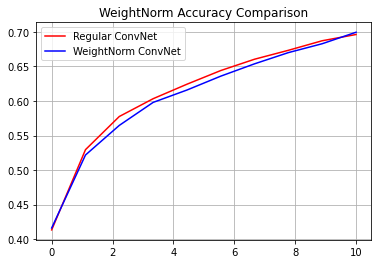

In [11]:
reg_accuracy = reg_history.history['accuracy']
wn_accuracy = wn_history.history['accuracy']

plt.plot(np.linspace(0, epochs,  epochs), reg_accuracy,
             color='red', label='Regular ConvNet')

plt.plot(np.linspace(0, epochs, epochs), wn_accuracy,
         color='blue', label='WeightNorm ConvNet')

plt.title('WeightNorm Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()